In [10]:
from processing import *

import os, re
import sys

from AtomicImageSimulator.main import *
# Add the parent directory to sys.path

import numpy as np

import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle
import atomai as aoi
np.random.seed(0)
from processing import *
import torch
torch.set_default_device("cuda")


In [11]:
directory = "to_share_HP_defects/"

ind_to_val, image_list, mask_list, label_list = xdatcar_processor(directory, n_sims=25)

{0: '5', 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}


{0: '5', 1: '25', 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '

Text(0.5, 1.0, 'Mask_S_XDATCAR_df_S_23_1XDATCAR_df_S_23_1')

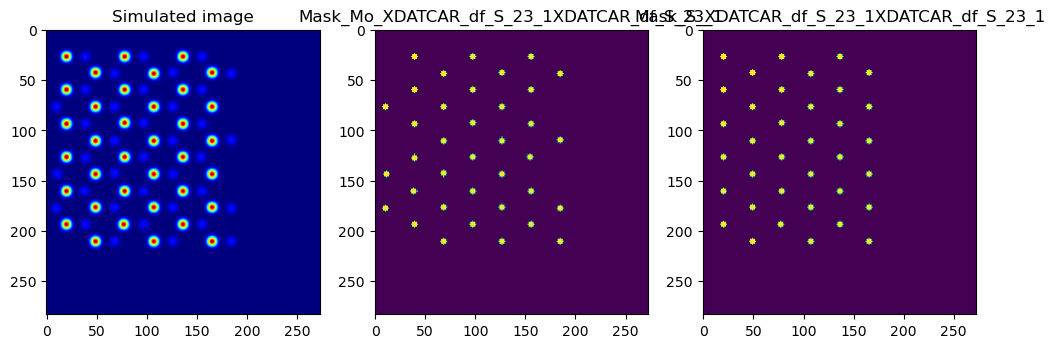

In [12]:
#plot image from the lists of image-mask pairs
temp_id = 4
_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(image_list[temp_id][1], cmap = 'jet')
ax2.imshow(mask_list[temp_id][1][:,:,0])
ax3.imshow(mask_list[temp_id][1][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + label_list[temp_id])
ax3.set_title("Mask_S_" + label_list[temp_id])

In [13]:
#crop out the empty spaces
cropped_image_list = []
cropped_mask_list = []

for i in range(0,len(image_list)):
  local_cropped_imglist = []
  local_cropped_masklist = []
  for j in range(0,len(image_list[i])):
    local_cropped_imglist.append(image_list[i][j][:208,0:208])
    local_cropped_masklist.append(mask_list[i][j][:208,0:208])

  cropped_image_list.append(local_cropped_imglist)
  cropped_mask_list.append(local_cropped_masklist)

print("Number of tasks : ",len(cropped_image_list))
np.shape(cropped_image_list[0])

Number of tasks :  25


(443, 208, 208)

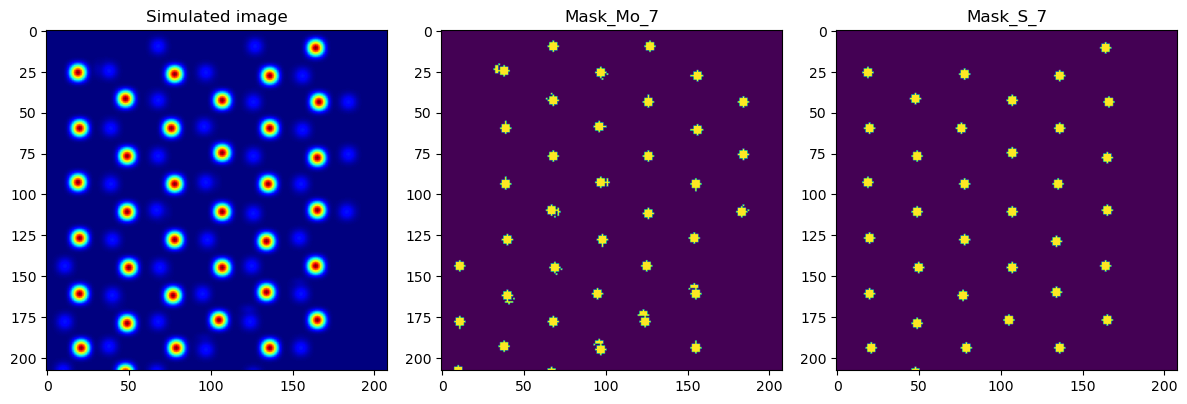

In [14]:
temp_id = 11

_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))

ax1.imshow(cropped_image_list[temp_id][10], cmap = 'jet')
ax2.imshow(cropped_mask_list[temp_id][10][:,:,0])
ax3.imshow(cropped_mask_list[temp_id][10][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + ind_to_val[temp_id])
ax3.set_title("Mask_S_" + ind_to_val[temp_id])
# _.suptitle(f"Initial Configuration of Task {ind_to_val[temp_id]}, Iteration 0")
plt.tight_layout()
plt.show()

In [15]:
dt = aoi.transforms.datatransform(1, # number of classes
                                  #gauss_noise=[1000, 2000], # scaled values
                                  #poisson_noise=[30, 45],
                                  blur=False,
                                  contrast=False,
                                  zoom=False,
                                  #resize=[2, 1], # downsize all the images by a factor of 2
                                  seed=1)
def augmented_simulations(cropped_image_list,cropped_mask_list):
    X_train, y_train = dt.run(np.array(cropped_image_list), np.array(cropped_mask_list)[..., None])
    return X_train, y_train

In [16]:
image_mask = {val:(None,None) for val in range(25)}

for val in range(25):
    image_mask[val] = augmented_simulations(cropped_image_list[val],cropped_mask_list[val])

Text(0.5, 1.0, 'Mask_S_XDATCAR_df_S_23_1XDATCAR_df_S_23_1')

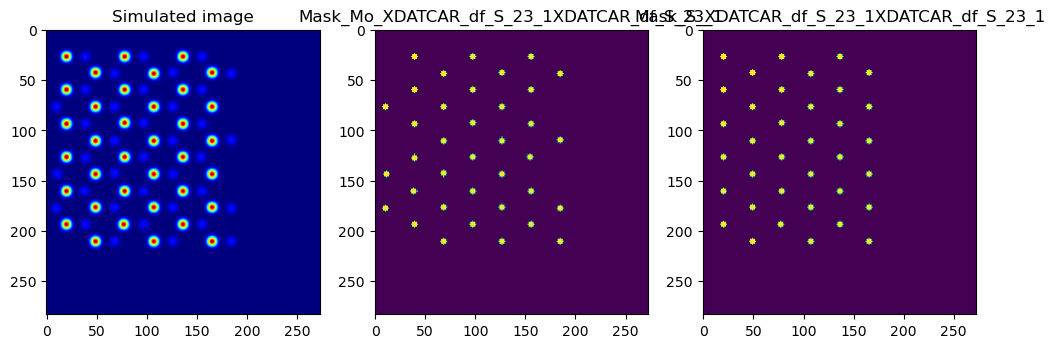

In [26]:
#plot image from the lists of image-mask pairs
temp_id = 4
_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(image_list[temp_id][1], cmap = 'jet')
ax2.imshow(mask_list[temp_id][1][:,:,0])
ax3.imshow(mask_list[temp_id][1][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + label_list[temp_id])
ax3.set_title("Mask_S_" + label_list[temp_id])

In [27]:
image_nonaug = {val:(None,None) for val in range(25)}

for val in range(25):
    s1, s2, s3 = np.array(cropped_image_list[val]).shape
    s1_, s2_, s3_, s4_ = np.array(cropped_mask_list[val]).shape
    image_nonaug[val] = np.reshape(cropped_image_list[val],(s1,1,s2,s3)), np.reshape(cropped_mask_list[val],(s1_,s2_,s3_,s4_,1))


In [28]:
val = 0
energy_to_ind = {val:None for val in range(25)}
new_energy_ind = {val:None for val in range(25)}
directory =  f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/"
for filename in os.listdir(directory):
  if "." in filename:
    continue
  task = ind_to_val[val]
  file_name = directory + filename + "/"
  print(val)
  # filepath = f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/df_{task}/"
  xdatcar_filepath = f"XDATCAR_df_S_{filename.split('_')[1]}"
  oszicar_filepath = f"OSZICAR_df_S_{filename.split('_')[1]}"
  energy_to_ind[val] = oszicar_generation(file_name,xdatcar_filepath,oszicar_filepath,filename.split("_")[1])
  last_iter = energy_to_ind[val]["Iteration"].values[-1]
  last_idx = len(energy_to_ind[val]["Iteration"])

  xdatcar_filepath = f"XDATCAR_df_S_{filename.split('_')[1]}_1"
  oszicar_filepath = f"OSZICAR_df_S_{filename.split('_')[1]}_1"
  new_energy_ind[val] = oszicar_generation(file_name,xdatcar_filepath,oszicar_filepath,filename.split("_")[1])
  new_energy_ind[val]["Iteration"] = new_energy_ind[val]["Iteration"]+last_iter #oszicar_generation(file_name,xdatcar_filepath,oszicar_filepath,filename.split("_")[1])
  energy_to_ind[val] = pd.concat([energy_to_ind[val],new_energy_ind[val]])
  #energy_to_ind[val] = pd.concat([energy_to_ind[val],oszicar_generation_additional(file_name,xdatcar_filepath,oszicar_filepath,filename.split("_")[1],last_iter)])
  energy_to_ind[val]["target_total_energy_per_atom"] = energy_to_ind[val]["target_total_energy_per_atom"] - energy_to_ind[val]["target_total_energy_per_atom"].mean()
  #energy_to_ind[val]["Iteration"][last_idx:] = energy_to_ind[val]["Iteration"][last_idx:] + last_iter
  val += 1

0
Total number of atoms: 103
Last trajectory Number: 2280.0
Total number of atoms: 103
Last trajectory Number: 2150.0
1
Total number of atoms: 83
Last trajectory Number: 2420.0
Total number of atoms: 83
Last trajectory Number: 2460.0
2
Total number of atoms: 88
Last trajectory Number: 2480.0
Total number of atoms: 88
Last trajectory Number: 2590.0
3
Total number of atoms: 94
Last trajectory Number: 2380.0
Total number of atoms: 94
Last trajectory Number: 2340.0
4
Total number of atoms: 85
Last trajectory Number: 2400.0
Total number of atoms: 85
Last trajectory Number: 2580.0
5
Total number of atoms: 89
Last trajectory Number: 2460.0


Total number of atoms: 89
Last trajectory Number: 2440.0
6
Total number of atoms: 102
Last trajectory Number: 2150.0
Total number of atoms: 102
Last trajectory Number: 2030.0
7
Total number of atoms: 93
Last trajectory Number: 2210.0
Total number of atoms: 93
Last trajectory Number: 2430.0
8
Total number of atoms: 86
Last trajectory Number: 2520.0
Total number of atoms: 86
Last trajectory Number: 2580.0
9
Total number of atoms: 95
Last trajectory Number: 2580.0
Total number of atoms: 95
Last trajectory Number: 2370.0
10
Total number of atoms: 98
Last trajectory Number: 2310.0
Total number of atoms: 98
Last trajectory Number: 430.0
11
Total number of atoms: 101
Last trajectory Number: 2230.0
Total number of atoms: 101
Last trajectory Number: 2230.0
12
Total number of atoms: 100
Last trajectory Number: 2220.0
Total number of atoms: 100
Last trajectory Number: 2240.0
13
Total number of atoms: 96
Last trajectory Number: 2490.0
Total number of atoms: 96
Last trajectory Number: 2340.0
14
Tot

Text(0.5, 1.0, 'Energy per atom vs Iteration for 7 Sulphur defects')

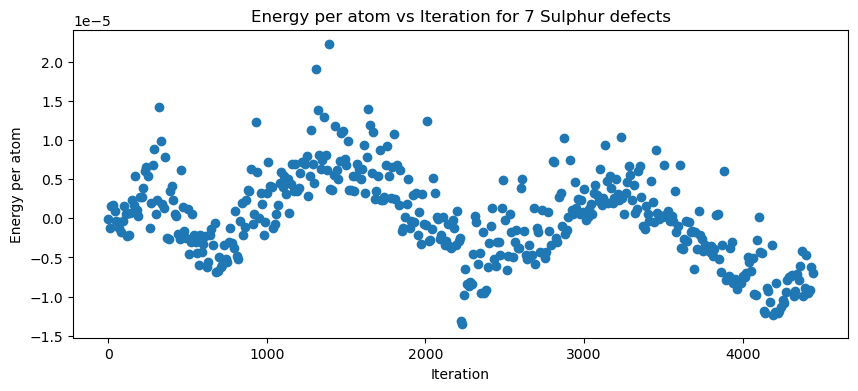

In [29]:
plt.figure(figsize=(10,4))
plt.scatter(energy_to_ind[11]["Iteration"],energy_to_ind[11]["target_total_energy_per_atom"])
plt.xlabel("Iteration")
plt.ylabel("Energy per atom")
plt.title("Energy per atom vs Iteration for 7 Sulphur defects")

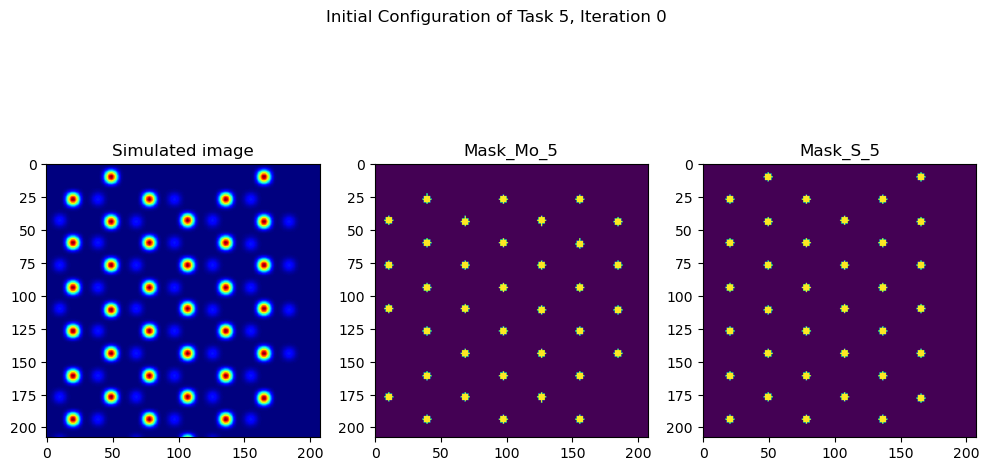

In [30]:
temp_id = 0

_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))

ax1.imshow(cropped_image_list[temp_id][0], cmap = 'jet')
ax2.imshow(cropped_mask_list[temp_id][0][:,:,0])
ax3.imshow(cropped_mask_list[temp_id][0][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + ind_to_val[temp_id])
ax3.set_title("Mask_S_" + ind_to_val[temp_id])
_.suptitle(f"Initial Configuration of Task {ind_to_val[temp_id]}, Iteration 0")

plt.show()

(1040, 1040)


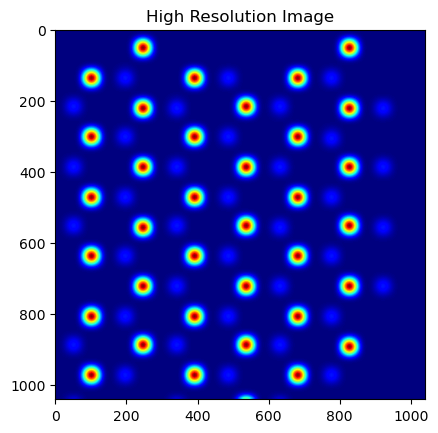

In [31]:
from skimage.transform import resize

image = cropped_image_list[temp_id][0]

# Increase the resolution of the image
high_res_image = resize(image, (image.shape[0] * 5, image.shape[1] * 5), anti_aliasing=True)
print(high_res_image.shape)
plt.imshow(high_res_image, cmap='jet')
plt.title("High Resolution Image")
plt.show()

Full Training

In [32]:
from PIL import Image

def latent_plotting(embed, step, X, y, show=False):
    
    points = []
    label_idcs = []
    
    path = "./ScatterPlots"
    if not os.path.exists(path): os.mkdir(path)
    
    print("SHAPE : ",X.shape, y.shape)
    img = [val for val in X]
    label = [val for val in y.detach().cpu().numpy()]
    
    # We only need to encode the validation images
    proj = embed
    print(proj.shape)
   
    points.extend(np.array(proj))
    label_idcs.extend(label)
    
    del img, label

    points = np.array(points)
    
    # Creating a scatter plot
    fig, ax = plt.subplots(figsize=(10, 10) if not show else (8, 8))
    scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0, 
                         c = label_idcs,
                         cmap='tab10', alpha=0.9, zorder=2)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_title(f"Latent Space for Task {step}")
    if show: 
        ax.grid(True, color="lightgray", alpha=1.0, zorder=0)
        plt.show()
    else: 
        # Do not show but only save the plot in training
        plt.savefig(f"{path}/Step_{step:03d}.png", bbox_inches="tight")
        plt.close() # don't forget to close the plot, or it is always in memory

# convert image sequence to a gif file
def save_gif():
  
  frames = []
  imgs = sorted(os.listdir("ScatterPlots/"))
  
  for im in imgs:
      new_frame = Image.open("ScatterPlots/" + im)
      frames.append(new_frame)
  
  frames[0].save("latentspace.gif", format="GIF",
                 append_images=frames[1:],
                 save_all=True,
                 duration=200, loop=0)

In [33]:
def color_gradient_difference_plot_modified(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
 
    # Scatter plot for training data
    scatter_train = ax1.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=60, cmap='viridis', edgecolor='k', alpha=0.75, marker='D')
    cbar_train = plt.colorbar(scatter_train, ax=ax1)
    cbar_train.set_label('Training Error (meV)', fontsize=14, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=14, width=2)

    ax1.set_xlabel("Computed energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax1.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax1.set_title("Training Prediction Error", fontsize=18, fontweight='bold')
    ax1.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax1.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=14, width=2)

    # Scatter plot for prediction data
    scatter_pred = ax2.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=60, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax2)
    cbar_pred.set_label('Testing Error (meV)', fontsize=14, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=14, width=2)

    ax2.set_xlabel("Computed energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax2.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax2.set_title("Testing Prediction Error", fontsize=18, fontweight='bold')
    ax2.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax2.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.tick_params(axis='both', which='major', labelsize=14, width=2)

    plt.suptitle(f"Energy Difference Gradient for Task {task}", fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/gradient_plot/Gradient_plot_Task{task}_{feature_extractor}_{pois}_aug{augmentation}.png")
    plt.clf()
def color_gradient_difference_plot_combined(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for training data
    scatter_train = ax.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=60, cmap='viridis', edgecolor='k', alpha=0.75, marker='D', label='Training Data')
    cbar_train = plt.colorbar(scatter_train, ax=ax)
    cbar_train.set_label('Training Error (meV)', fontsize=14, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=14, width=2)

    # Scatter plot for testing data
    scatter_pred = ax.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=60, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^', label='Testing Data')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax)
    cbar_pred.set_label('Testing Error (meV)', fontsize=14, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=14, width=2)

    # Set labels, title, and formatting
    ax.set_xlabel("Simulated energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_title(f"Energy Difference Gradient for Task {task}", fontsize=18, fontweight='bold')
    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)
    # Restrict y-axis to a limit of 0.1
    #ax.set_ylim([-0.04*1e-3, -0.03*1e-3])

    # Add a legend
    ax.legend(fontsize=14)

    plt.tight_layout()
    plt.show()
    plt.clf()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

def color_gradient_difference_plot_combined_with_insets(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    print(max(abs(training_pred)))
    print(mean(training_pred))
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create figure and main axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Scatter plot for training data on the main plot
    scatter_train = ax.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=40, cmap='viridis', edgecolor='k', alpha=0.6, marker='D', label='Training Data')
    cbar_train = plt.colorbar(scatter_train, ax=ax)
    cbar_train.set_label('Training Error (meV)', fontsize=8, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=8, width=2)

    # Fit line for training data on the main plot
    coeffs_train = np.polyfit(np.array(training_ground_truth).reshape(-1,), np.array(training_pred).reshape(-1,), 1)
    fit_line_train = np.polyval(coeffs_train, np.array(training_ground_truth).reshape(-1,))
    
    # Scatter plot for testing data on the main plot
    scatter_pred = ax.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=40, cmap='coolwarm', edgecolor='k', alpha=0.6, marker='^', label='Testing Data')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax)
    cbar_pred.set_label('Testing Error (meV)', fontsize=8, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=8, width=2)

    # Fit line for testing data on the main plot
    coeffs_test = np.polyfit(np.array(energy_ground_truth).reshape(-1,), np.array(predictions).reshape(-1,), 1)
    fit_line_test = np.polyval(coeffs_test, np.array(energy_ground_truth).reshape(-1,))
    

    # Set labels, title, and formatting
    ax.set_xlabel("Simulated energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_title(f"Energy Difference Gradient for Task {task}", fontsize=14, fontweight='bold')
    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=8, width=2)
    #ax.set_ylim([-0.04*1e-3, 0.03*1e-3])
    #ax.set_ylim([-0.039*1e-3, -0.038*1e-3])

    # Add a legend
    ax.legend(fontsize=10, bbox_to_anchor=(0.75, 1.08), ncol=2)

    # Inset plot for training data
    ax_inset_train = inset_axes(ax, width="40%", height="30%", loc=1, bbox_to_anchor=(0,-0.02,1,1), bbox_transform=ax.transAxes)  # loc=1 corresponds to upper right
    ax_inset_train.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=30, cmap='viridis', edgecolor='k', alpha=0.75, marker='D')
    ax_inset_train.plot(training_ground_truth, fit_line_train, color='darkmagenta',  linestyle= "-.", label='Training Fit')
    ax_inset_train.set_title("Training Data", fontsize=10)
    ax_inset_train.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_train.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_train.grid(True, linestyle='--', alpha=0.7)
    ax_inset_train.tick_params(axis='both', which='major', labelsize=7, width=1)
    ax_inset_train.legend(fontsize=5)
    #ax_inset_train.set_ylim([-0.04*1e-3, 0.03*1e-3])

    # Inset plot for testing data
    ax_inset_test = inset_axes(ax, width="40%", height="30%", loc=4, bbox_to_anchor=(0,0.02,1,1), bbox_transform=ax.transAxes)  # loc=4 corresponds to lower right
    ax_inset_test.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=30, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^')
    ax_inset_test.plot(energy_ground_truth, fit_line_test, color='tomato', linestyle="-.", label='Testing Fit')
    ax_inset_test.set_title("Testing Data", fontsize=10)
    ax_inset_test.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_test.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_test.grid(True, linestyle='--', alpha=0.7)
    ax_inset_test.tick_params(axis='both', which='major', labelsize=7, width=1)
    ax_inset_test.legend(fontsize=5)
    

    plt.tight_layout()
    plt.show()
    plt.clf()

# Example call (assuming you have the required data and function dependencies):
# color_gradient_difference_plot_combined_with_insets(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

def plot_3d_energy_difference(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Compute the differences
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for training data
    scatter_train = ax.scatter(training_ground_truth, training_pred, difference_training,
                               c=difference_training, cmap='viridis', edgecolor='k', alpha=0.75, marker='D', label='Training Data')

    # Scatter plot for prediction data
    scatter_pred = ax.scatter(energy_ground_truth, predictions, difference_predictions,
                              c=difference_predictions, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^', label='Testing Data')

    # Adding color bar
    cbar = plt.colorbar(scatter_train, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('Energy Difference (meV)', fontsize=14, fontweight='bold')
    cbar.ax.tick_params(labelsize=14, width=2)

    # Set labels
    ax.set_xlabel("Computed Energy Difference per Atom (meV)", fontsize=10, fontweight='bold')
    ax.set_ylabel("Predicted Energy Difference per Atom (meV)", fontsize=10, fontweight='bold')
    ax.set_zlabel("Energy Difference (meV)", fontsize=10, fontweight='bold')

    ax.set_title(f"3D Energy Difference for Task {task}", fontsize=18, fontweight='bold')

    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.zaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))

    ax.tick_params(axis='both', which='major', labelsize=8, width=2)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adding legend
    ax.legend(loc='upper right', fontsize=12)
    
    plt.show()



def mod_plot_training_loss(training_loss, task, scaler_flag, feature_extractor, training_cycles, lr, augmentation):
    plt.figure(figsize=(12, 8))

    # Plot the training loss with enhancements
    plt.plot(training_loss, color='darkblue', linestyle='-', marker='o', markersize=5, linewidth=2, label='Training Loss')

    # Add a title with larger, bold font
    plt.title(f"Training Loss - Task {task}", fontsize=24, fontweight='bold', color='darkblue')

    # Label x and y axes with larger, bold font
    plt.xlabel("Training Cycles", fontsize=18, fontweight='bold')
    plt.ylabel("Loss Optimization - MSE+MLL", fontsize=18, fontweight='bold')

    # Set x-axis ticks to show every training cycle, if appropriate
    plt.xticks(fontsize=14, fontweight='bold')

    # Set y-axis ticks with consistent styling
    plt.yticks(fontsize=14, fontweight='bold')

    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    plt.legend(fontsize=16, loc='best', frameon=True, shadow=True, fancybox=True)

    # Add a horizontal line at y=0 for reference
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Reference Line')

    # Optionally save the plot
    #plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/training_loss/Training_loss_Task{task}_Norm{scaler_flag}_{feature_extractor}_aug{augmentation}_training{training_cycles}_lr{lr}_.png")

    plt.clf()

import numpy as np
def single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,**kwargs):
    datadim = kwargs.get("datadim", 43264)
    embedim = 2
    torch.manual_seed(2)
    np.random.seed(2)
    training_cycles = kwargs.get("training_cycles", 150)
    lr = kwargs.get("lr", 1e-2)
    scaler_flag = kwargs.get("scaler",False)
    results = {int(ind_to_val[task]):[] for task in train_tasks}
    feature_extractor = kwargs.get("reptile","default_FE")
    augmentation = kwargs.get("augmentation",True)
    print(feature_extractor)
    model_sample = torch.nn.Sequential(
                                torch.nn.Linear(datadim,2048),
                                torch.nn.ReLU(),
                                # torch.nn.Linear(10240,2048),
                                # torch.nn.ReLU(),
                                torch.nn.Linear(2048,1024),
                                torch.nn.ReLU(),
                                torch.nn.Linear(1024, 256),
                                torch.nn.ReLU(),
                                *(list(fcFeatureExtractor(256,embedim).children())),)

    model_mod = kwargs.get("model_mod",model_sample)
    

    for task in train_tasks:
        clear_gpu_cache()
        print(f"Training Task {ind_to_val[task]}")
        # if task!= 7:
        #     continue
        (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
            image_mask[task], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.15, shuffle=False, random_state=2)
        # X_train, y_train = image_mask[0][0], energy_to_ind[0]["target_energy"]
       
        X_train = np.squeeze(X_train,axis=1)
        X_test = np.squeeze(X_test,axis=1)

        s1,s2,s3 = X_train.shape
        X_train = X_train.reshape(-1,s2*s3)
        X_test = X_test.reshape(-1,s2*s3)


        y_train = np.array(y_train).reshape(1,-1)
        y_test = np.array(y_test).reshape(1,-1) 

        if scaler_flag:
            X_train = scaler_fun.fit_transform(X_train)
            X_test = scaler_fun.fit_transform(X_test)
        
        X , y = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
        y = y.reshape(1,-1)    

        dklgp = dklgpreg.dklGPR(datadim,embedim,hidden_dim=[1000,500,50],feature_extract=copy.deepcopy(model_mod),precision="single")#aoi.models.dklGPR(data_dim, embedim=2, precision="double")
        dklgp.fit(X, y, training_cycles=training_cycles, lr=lr)
        embedding = dklgp.feature_extract(X.cuda()).detach().cpu().numpy()

        training_loss = list(dklgp.train_loss)        
        #latent_plotting(embedding, task, X, y, show=False)
        plot_image_in_latent_space(image_mask, energy_to_ind[task]["target_total_energy_per_atom"], image_index=task)
        
        with torch.no_grad():
            train_mean, train_var = dklgp.predict(X)

            mean, var = dklgp.predict(X_test)
        
        #torch.save(dklgp,f"results/single_tasks/model/Task{ind_to_val[task]}_Norm{scaler_flag}_{feature_extractor}_training{training_cycles}_lr{lr}_model.pt")
        clear_gpu_cache()
        
        # Reconstruction Graph
        #reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr,augmentation)
        reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr)
        # Gradient Plotting

        #color_gradient_difference_plot(y_test.reshape(-1,1),mean.reshape(-1,1),ind_to_val[task],feature_extractor,scaler_flag,augmentation)
        #distribution_plotting(y_test.reshape(-1,1),mean.reshape(-1,1),ind_to_val[task],feature_extractor,scaler_flag)
        # color_gradient_difference_plot_combined(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        
        # color_gradient_difference_plot_combined_with_insets(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        
        #plot_3d_energy_difference(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        #Training Loss plotting
        # mod_plot_training_loss(training_loss,ind_to_val[task],scaler_flag,feature_extractor,training_cycles,lr,augmentation)
        
        results[int(ind_to_val[task])] = [iterations_train,iterations_test,train_mean,mean,y_train,y_test,feature_extractor,training_loss,scaler_flag,ind_to_val,title,training_cycles,lr]
        
    return results

In [34]:
#crop out the empty spaces
cropped_image_list = []
cropped_mask_list = []

for i in range(0,len(image_list)):
  local_cropped_imglist = []
  local_cropped_masklist = []
  for j in range(0,len(image_list[i])):
    local_cropped_imglist.append(image_list[i][j][:208,0:208])
    local_cropped_masklist.append(mask_list[i][j][:208,0:208])

  cropped_image_list.append(local_cropped_imglist)
  cropped_mask_list.append(local_cropped_masklist)

print("Number of tasks : ",len(cropped_image_list))
np.shape(cropped_image_list[0])

Number of tasks :  25


(443, 208, 208)

Increasing number of pixels

In [35]:
for task in range(len(cropped_image_list)):
    image = np.array(cropped_image_list[task])
    cropped_image_list[task] = resize(image, (image.shape[0], 1, image.shape[1] * 3, image.shape[1] * 3), anti_aliasing=True)
cropped_image_list[0].shape

(443, 1, 624, 624)

In [36]:
def reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr):
    plt.figure(figsize=(20,7))
    plt.scatter(np.array(iterations_train),train_mean,c='r',marker="+",label="Train prediction")
    plt.scatter(np.array(iterations_train),y_train.reshape(-1,1),c='b',marker="+",label="Train ground_truth")
    plt.scatter(np.array(iterations_test),mean.reshape(1,-1),c='r',label="prediction")
    plt.scatter(np.array(iterations_test),y_test.reshape(1,-1),c='b',label="ground_truth")
    plt.title(f"{title} from Task {task}",fontsize=20)
    plt.xlabel("Iterations")
    plt.ylabel("Target Energy")
    plt.legend(fontsize=10)
    #plt.savefig(f"results/single_tasks/reconstruction_graphs/Task{ind_to_val[task]}_Norm{scaler_flag}_{feature_extractor}_training{training_cycles}_lr{lr}_reconstruction.png")
    plt.show(block=True)
    plt.clf()

In [37]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def plot_image_in_latent_space(image_list, y, image_index=0):
    """
    Plots the specified image from the image_list in latent space using PCA.

    Parameters:
    - image_list: List of images to be plotted.
    - image_index: Index of the image to be plotted in latent space.
    """
    # Flatten the image
    print(image_list[image_index].shape, y.shape)
    image = image_list[image_index].reshape(-1, image_list[image_index].shape[2]* image_list[image_index].shape[3])
    print(image.shape)
    # Apply PCA to reduce dimensions to 2
    pca = PCA(n_components=2)
    latent_space = pca.fit_transform(image)

    # Plot the image in latent space
    plt.figure(figsize=(8, 6))
    plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.title(f"Latent Space Representation of Image {image_index}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()

# Example usage
# plot_image_in_latent_space(cropped_image_list, energy_to_ind[1]["target_total_energy_per_atom"], image_index=1)

In [38]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def plot_high_low_energy(image_list, y, y_pred):
    """
    Plots the specified image from the image_list in latent space using PCA.

    Parameters:
    - image_list: List of images to be plotted.
    - image_index: Index of the image to be plotted in latent space.
    """
    # Flatten the image
    print(image_list.shape, y.shape)
    image = image_list.reshape(-1, image_list.shape[1]* image_list.shape[2])
    print(image.shape)
    # Apply PCA to reduce dimensions to 2
    pca = PCA(n_components=2)
    latent_space = pca.fit_transform(image)

    # Plot the image in latent space
    plt.figure(figsize=(8, 6))
    plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y, cmap='viridis', alpha=0.6, label='Ground Truth')
    plt.title(f"Latent Space Representation of Image")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.legend()
    plt.show(block=True)
    plt.clf()

    plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, label='Prediction')
    plt.legend()
    plt.title(f"Latent Space Representation of Image")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()

# Example usage
# plot_image_in_latent_space(cropped_image_list, energy_to_ind[1]["target_total_energy_per_atom"], image_index=1)

default_FE


Training Task 1
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(196, 1, 208, 208) (196,)
(196, 43264)


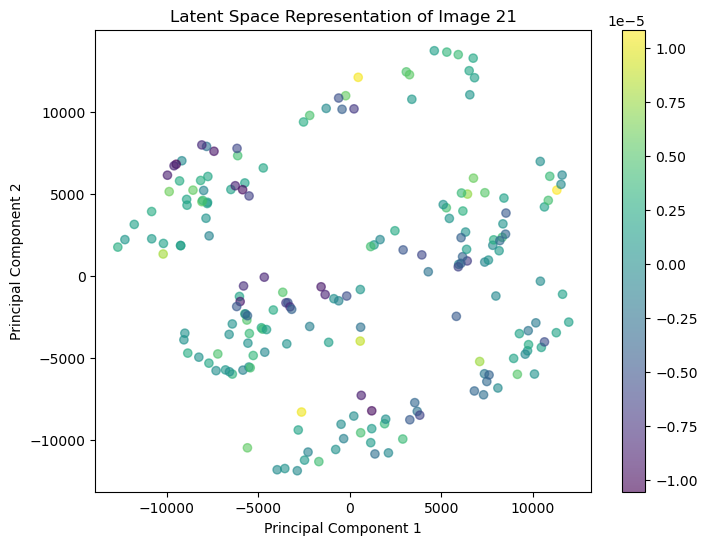

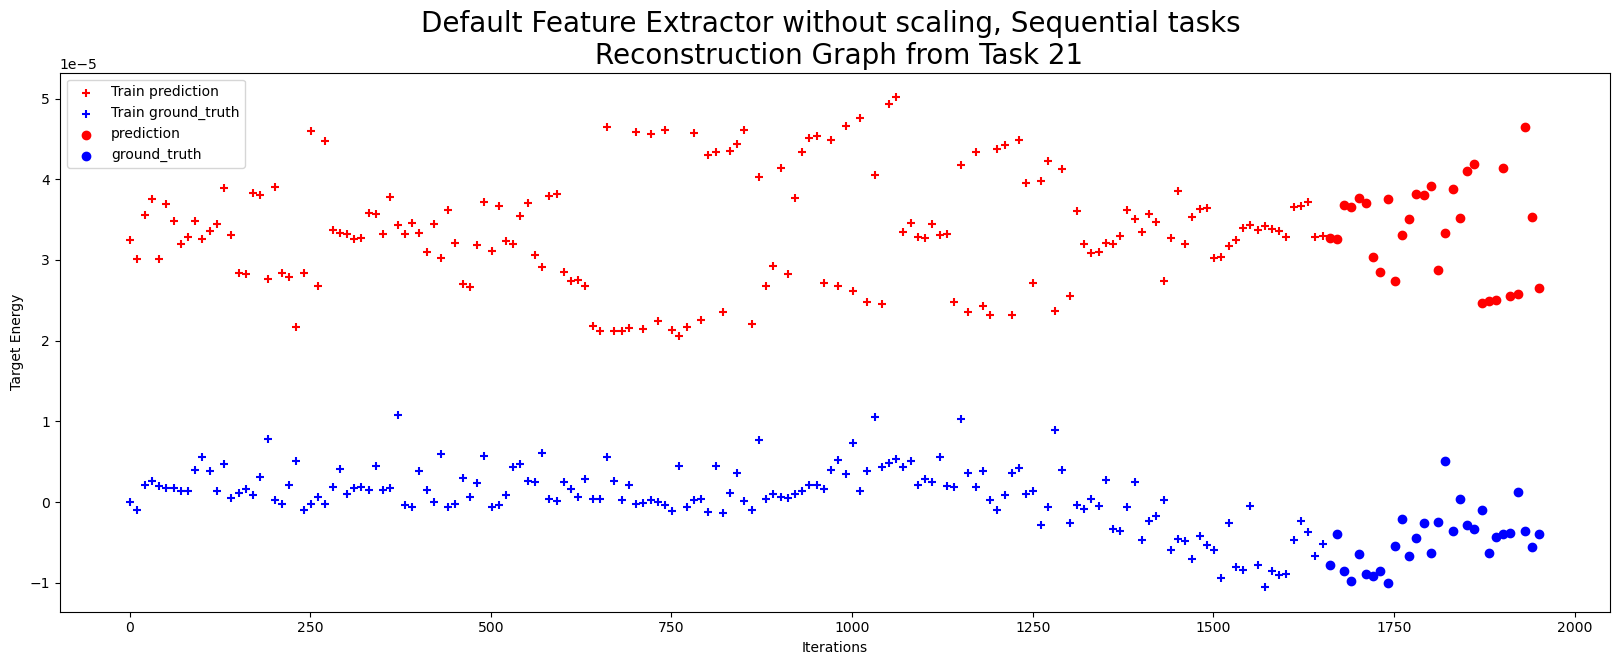

Training Task 2
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(202, 1, 208, 208) (202,)
(202, 43264)


<Figure size 640x480 with 0 Axes>

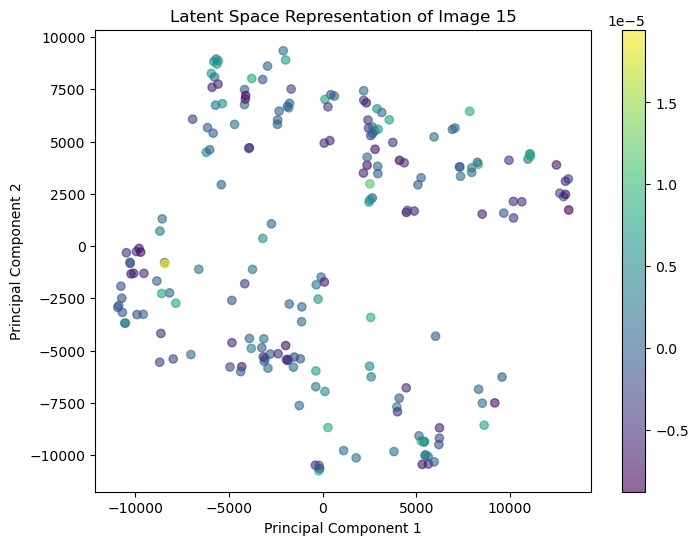

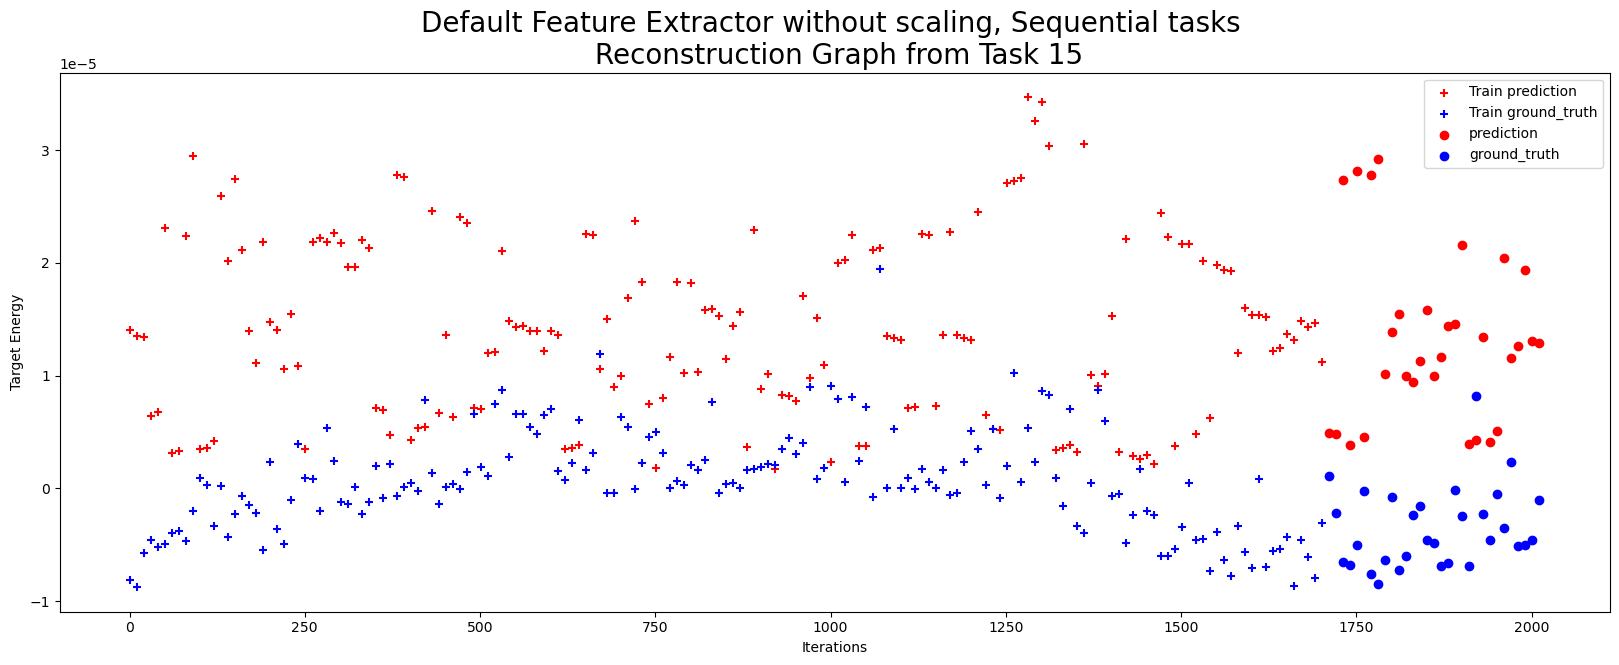

Training Task 3
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(204, 1, 208, 208) (204,)
(204, 43264)


<Figure size 640x480 with 0 Axes>

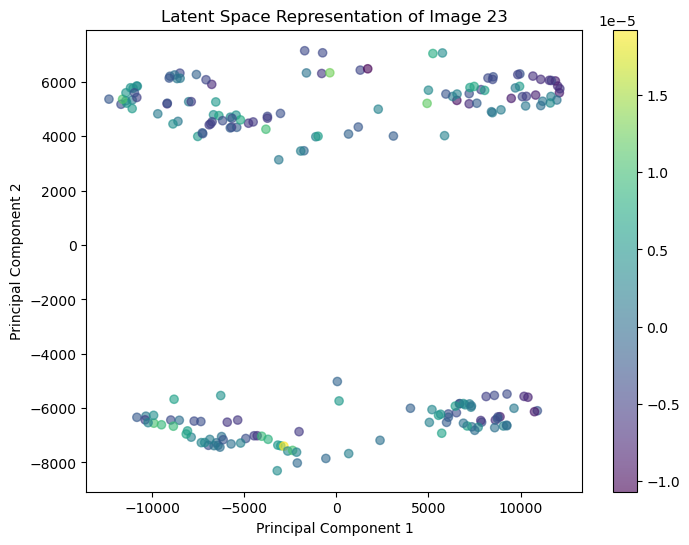

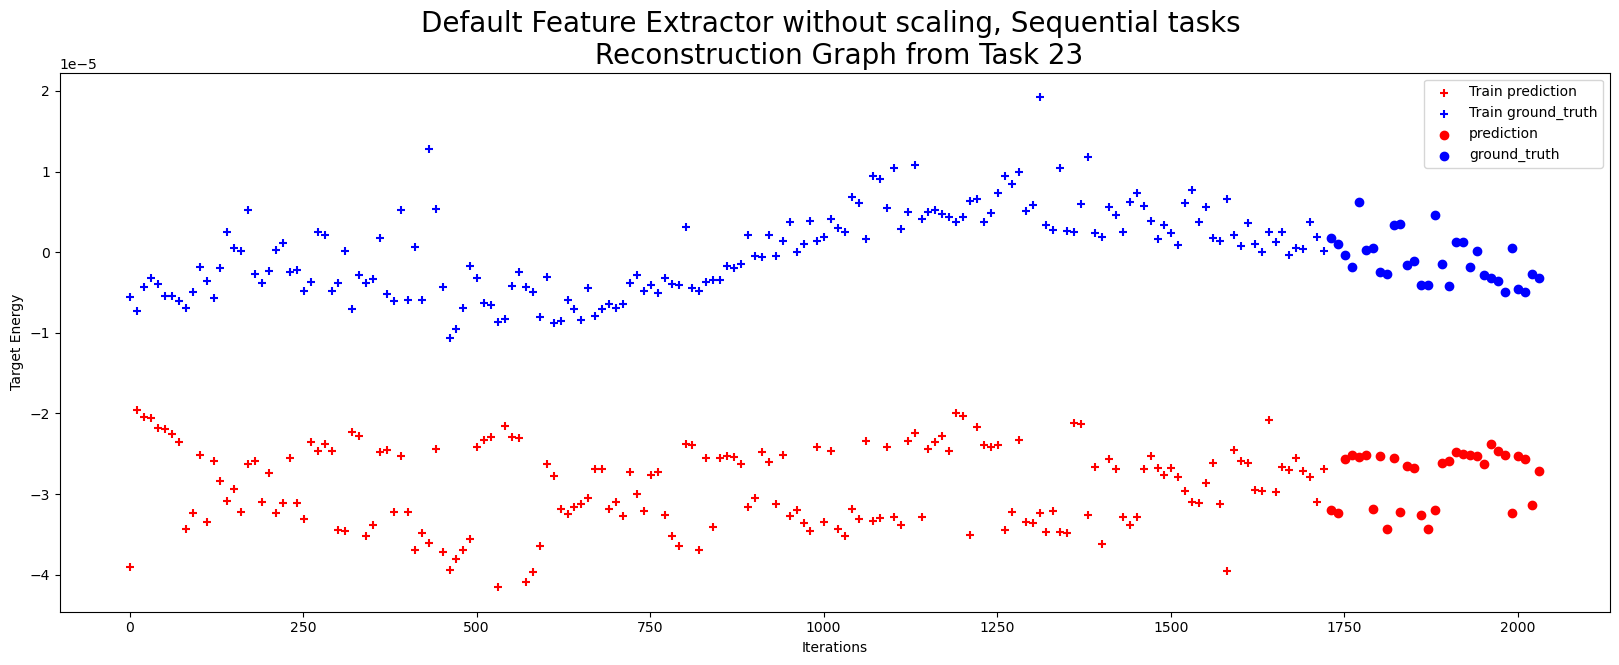

Training Task 4
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(199, 1, 208, 208) (199,)
(199, 43264)


<Figure size 640x480 with 0 Axes>

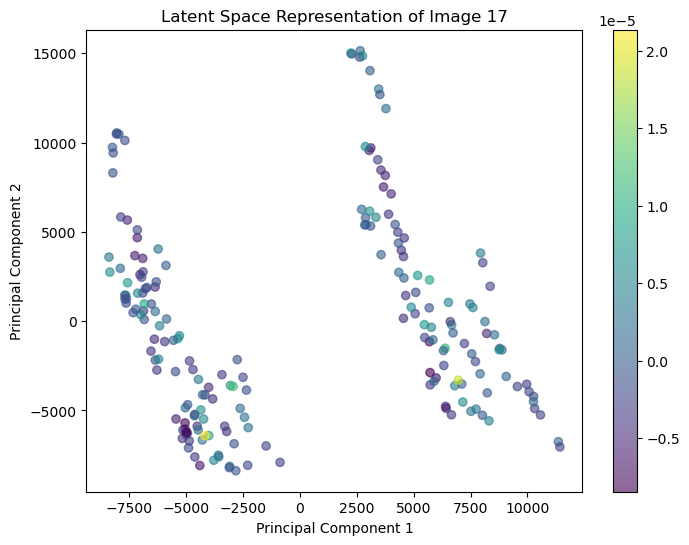

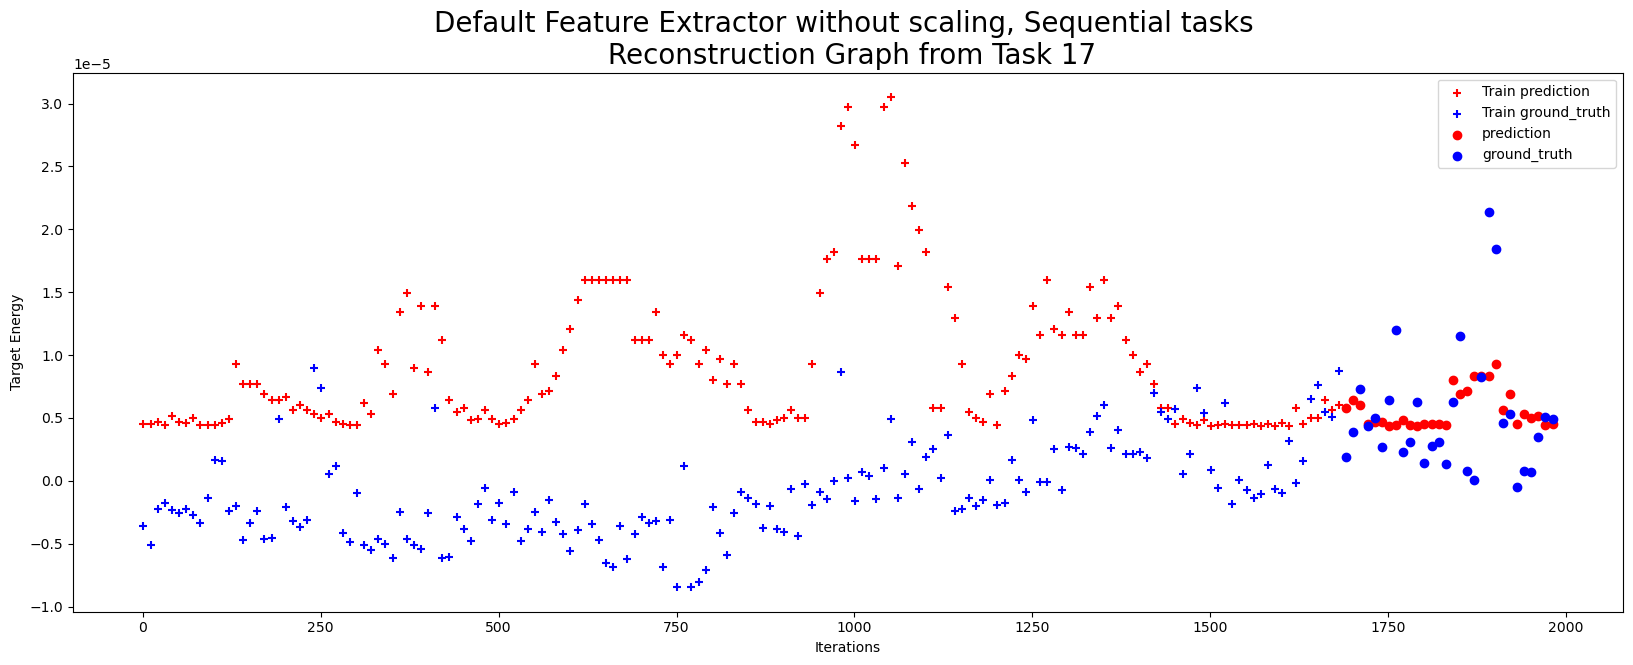

Training Task 5
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(228, 1, 208, 208) (228,)
(228, 43264)


<Figure size 640x480 with 0 Axes>

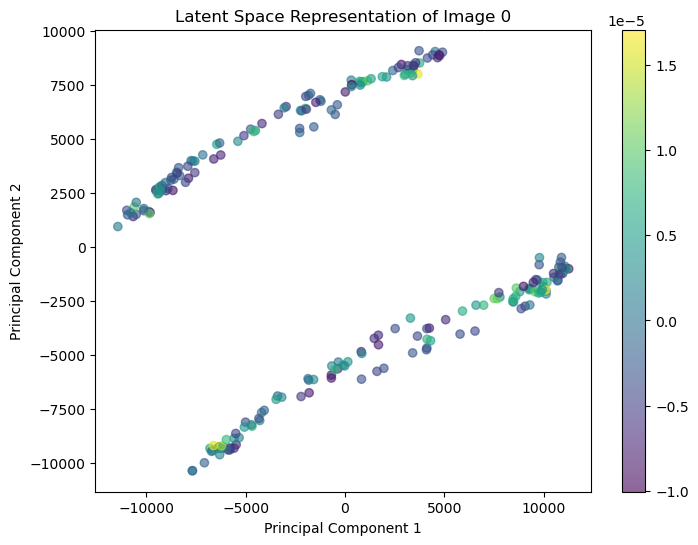

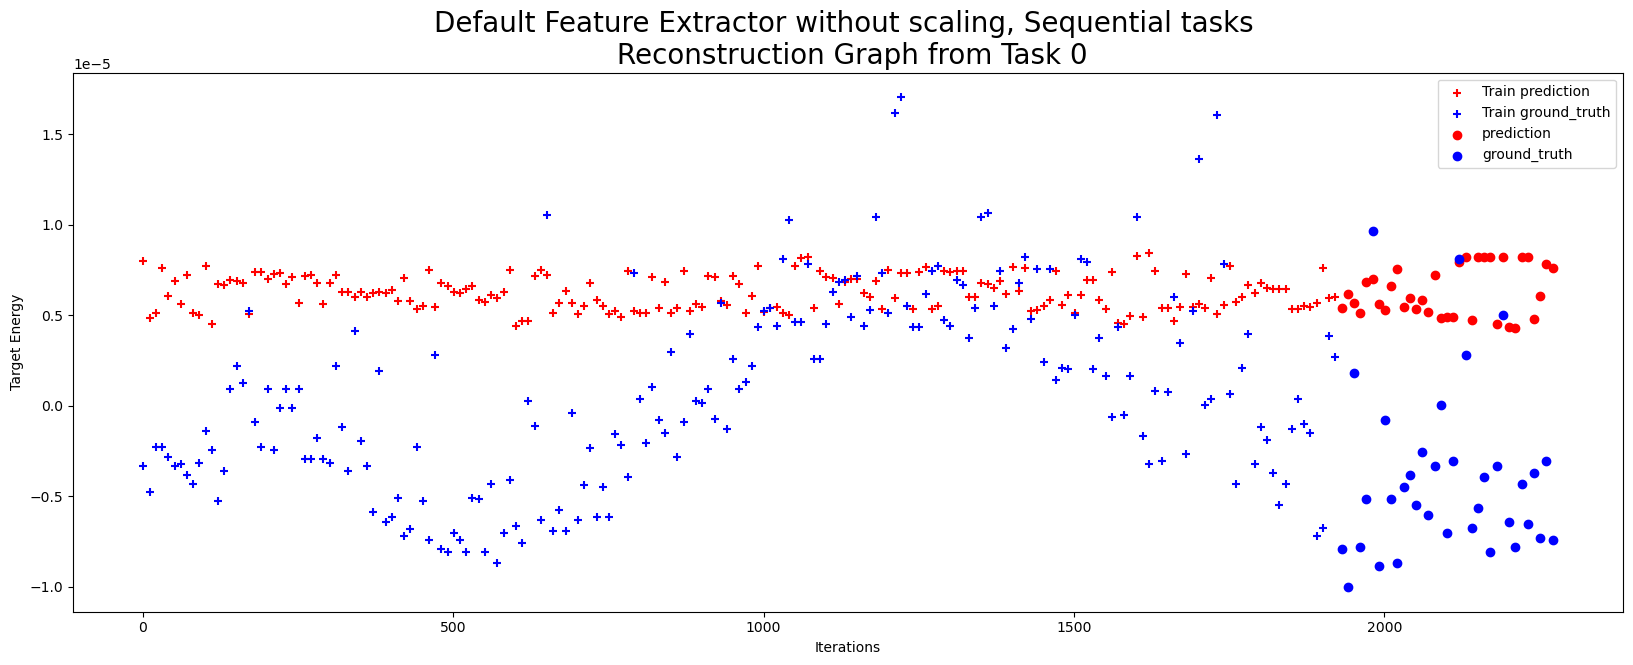

Training Task 6
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(215, 1, 208, 208) (215,)
(215, 43264)


<Figure size 640x480 with 0 Axes>

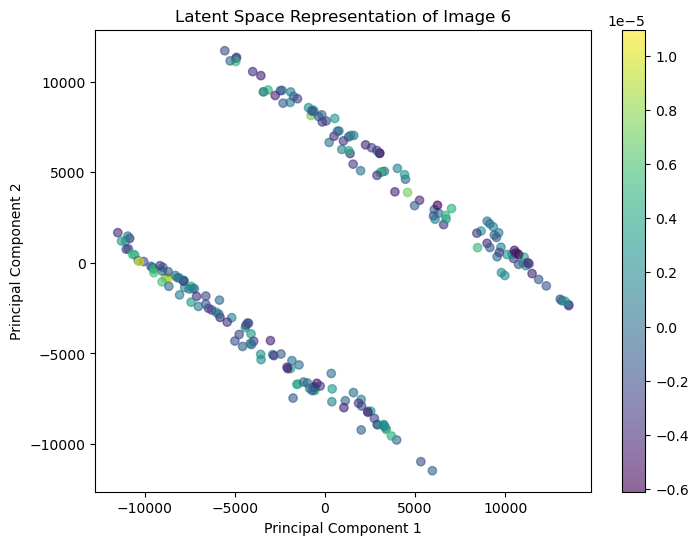

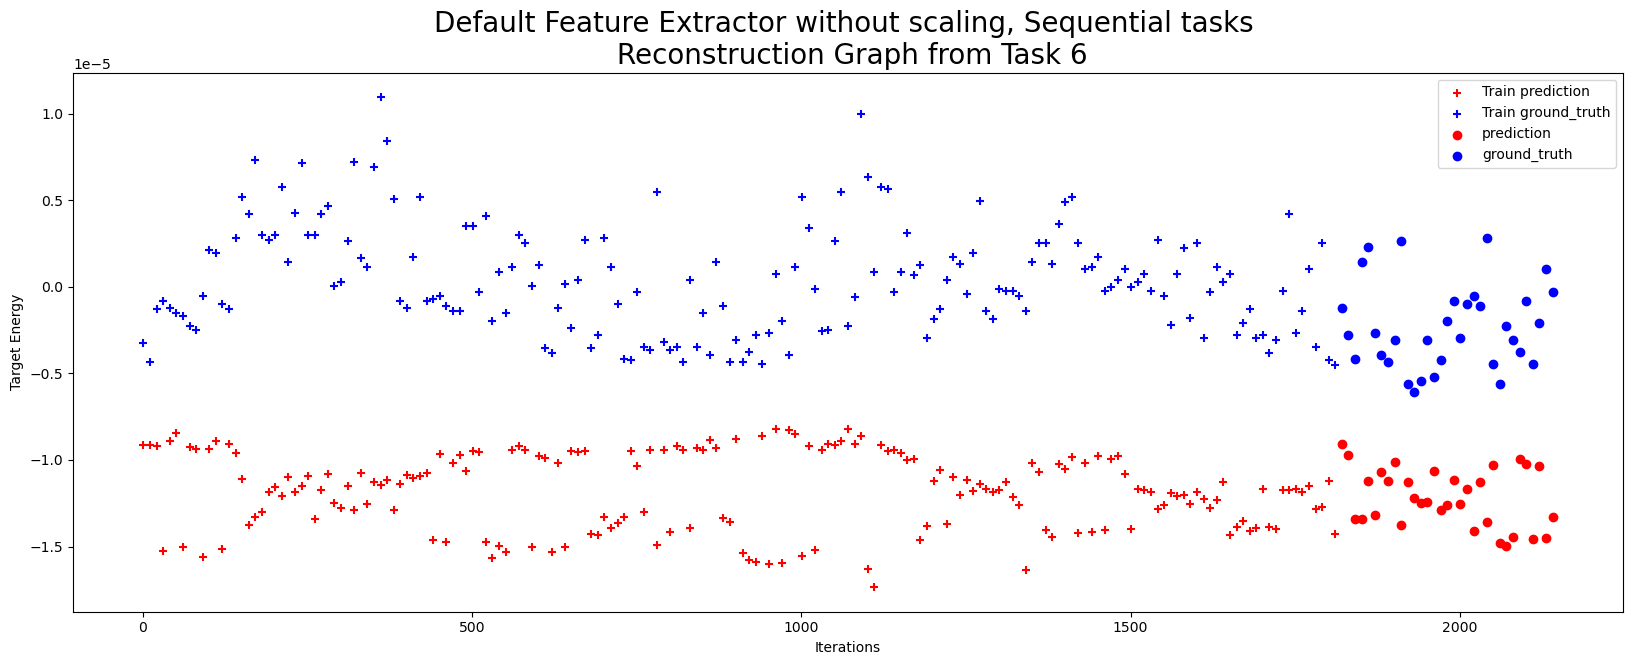

Training Task 7
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(223, 1, 208, 208) (223,)
(223, 43264)


<Figure size 640x480 with 0 Axes>

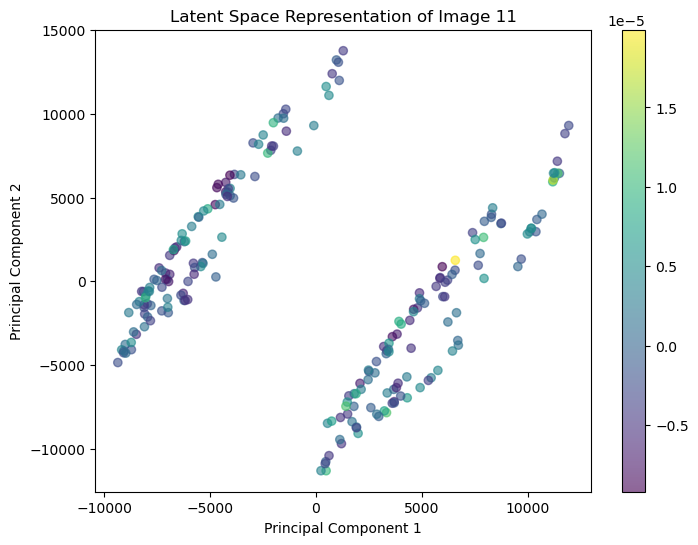

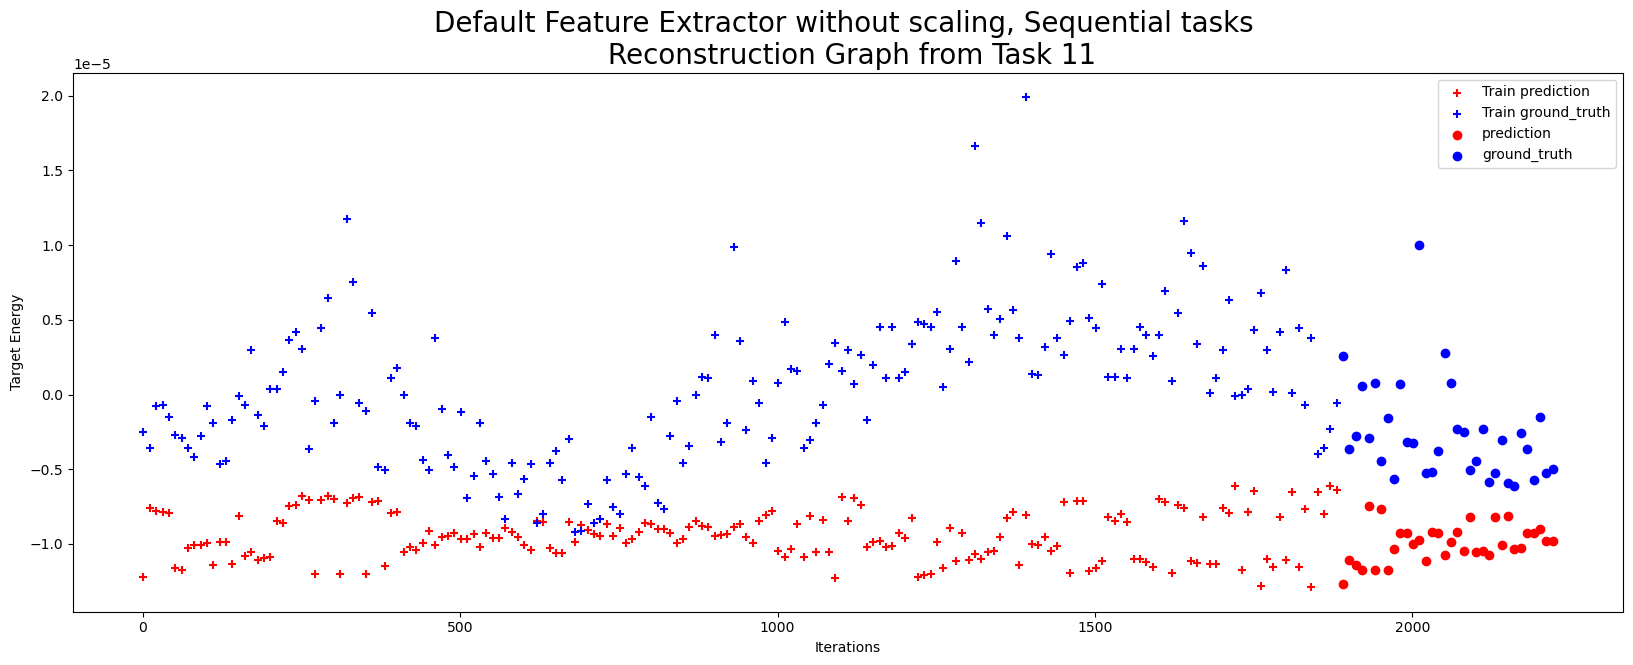

Training Task 8
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(222, 1, 208, 208) (222,)
(222, 43264)


<Figure size 640x480 with 0 Axes>

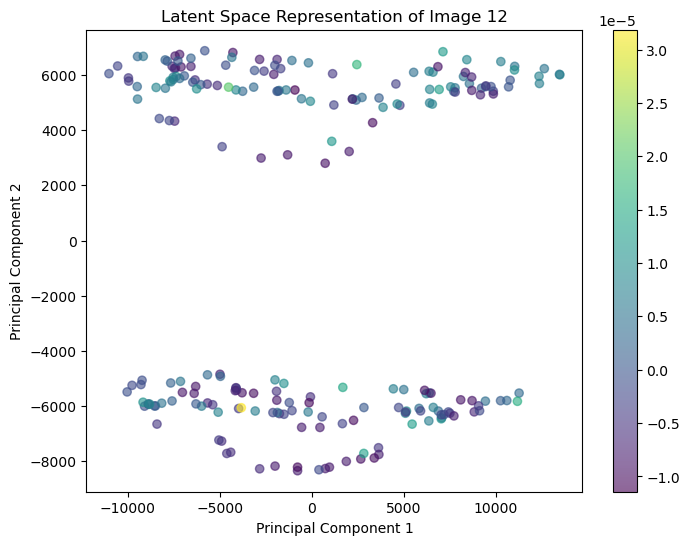

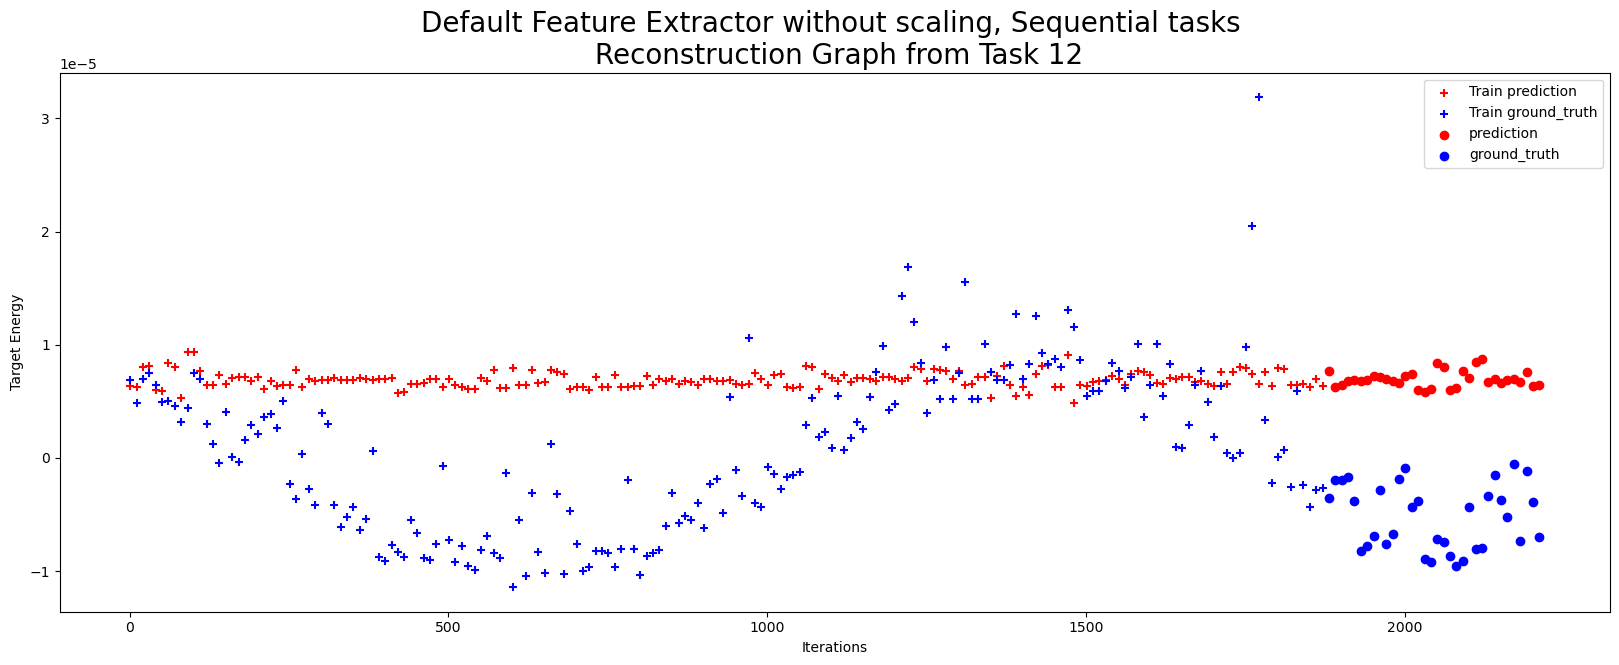

Training Task 9
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(227, 1, 208, 208) (227,)
(227, 43264)


<Figure size 640x480 with 0 Axes>

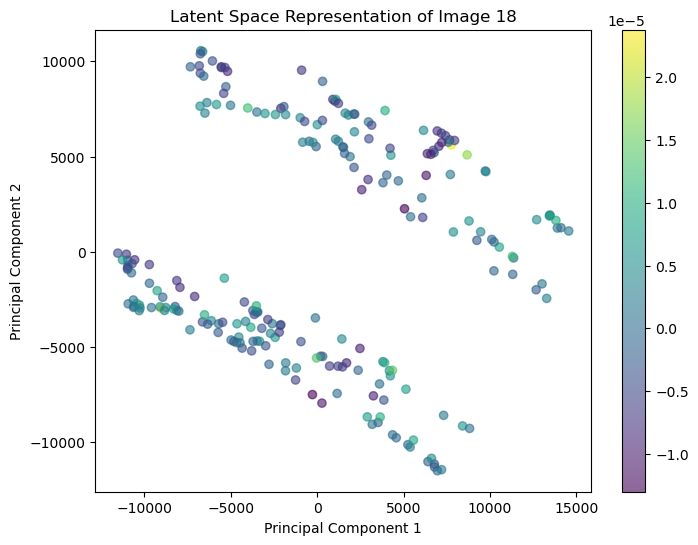

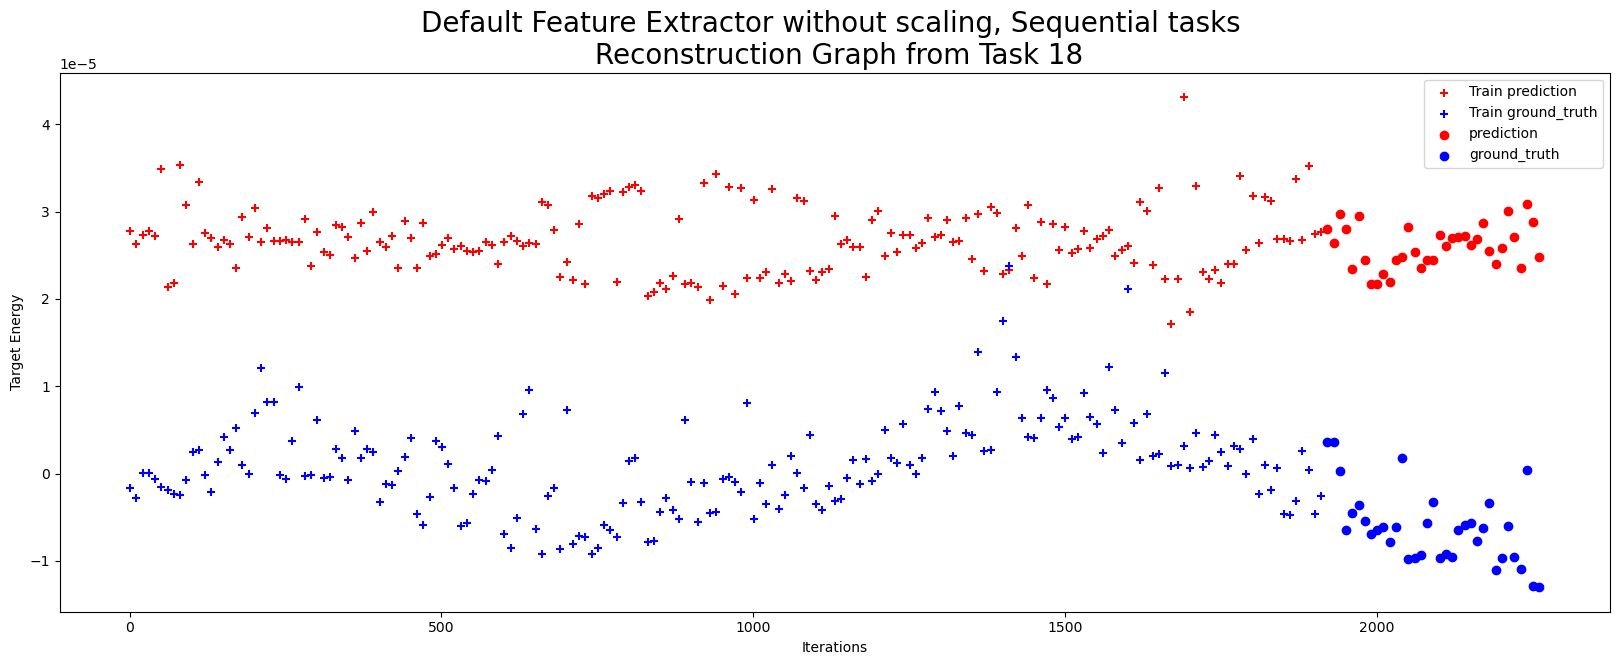

Training Task 10
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(231, 1, 208, 208) (231,)
(231, 43264)


<Figure size 640x480 with 0 Axes>

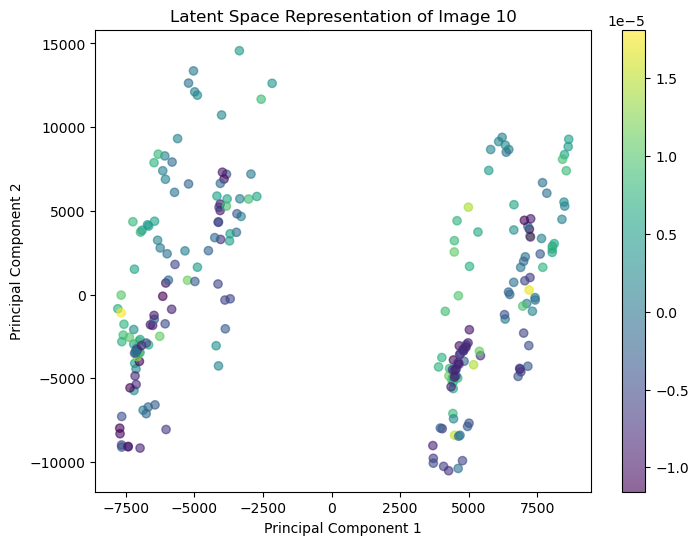

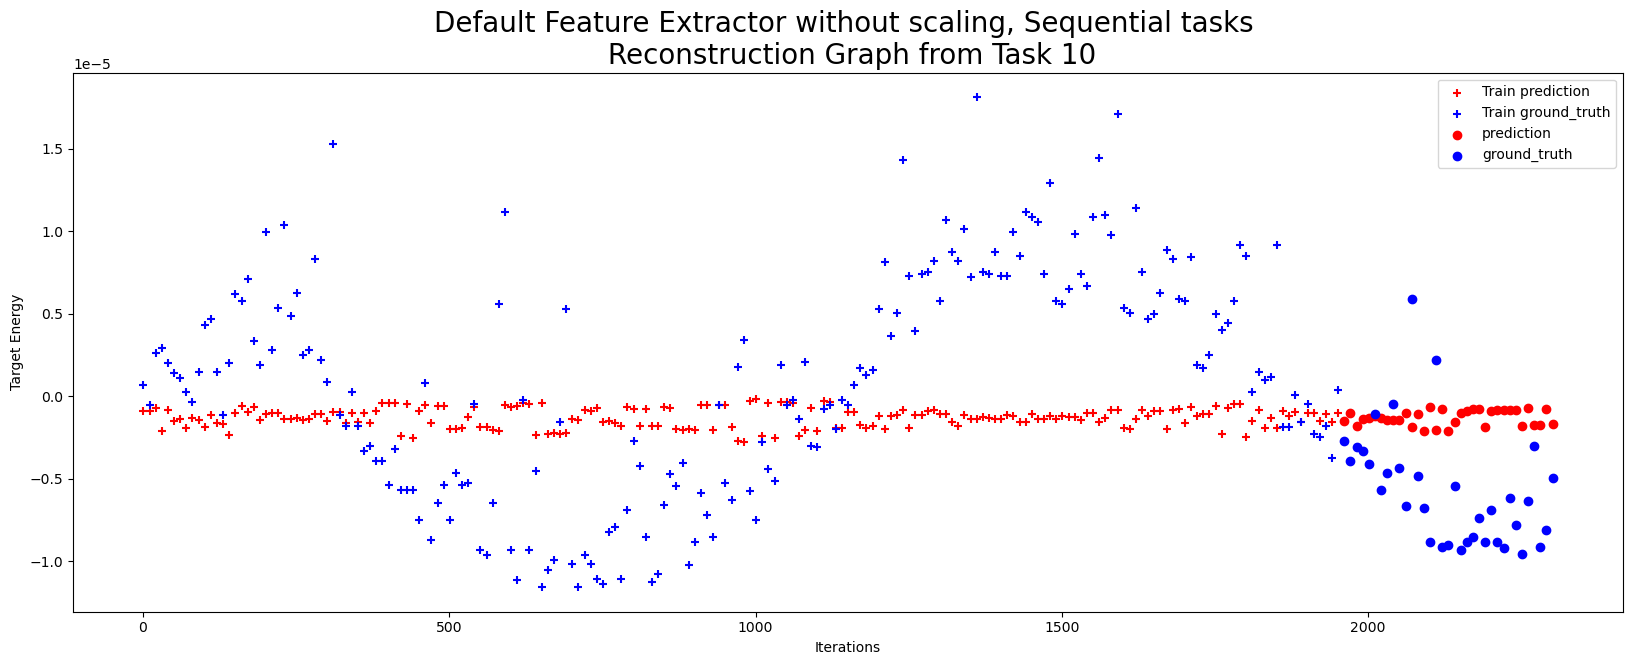

Training Task 11
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(227, 1, 208, 208) (227,)
(227, 43264)


<Figure size 640x480 with 0 Axes>

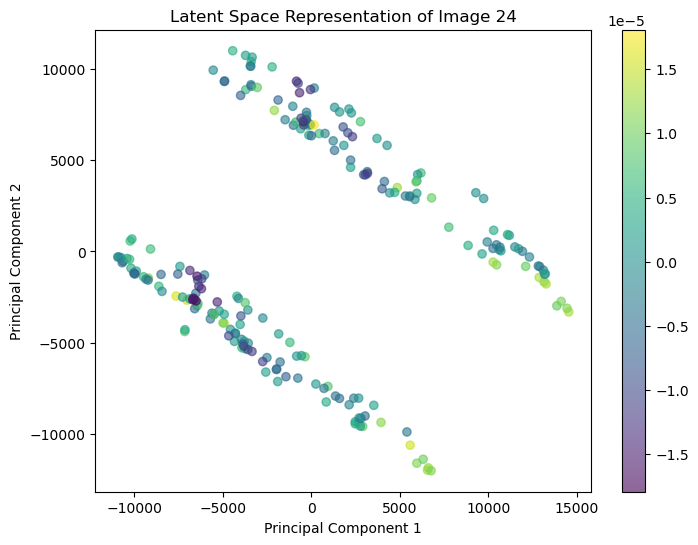

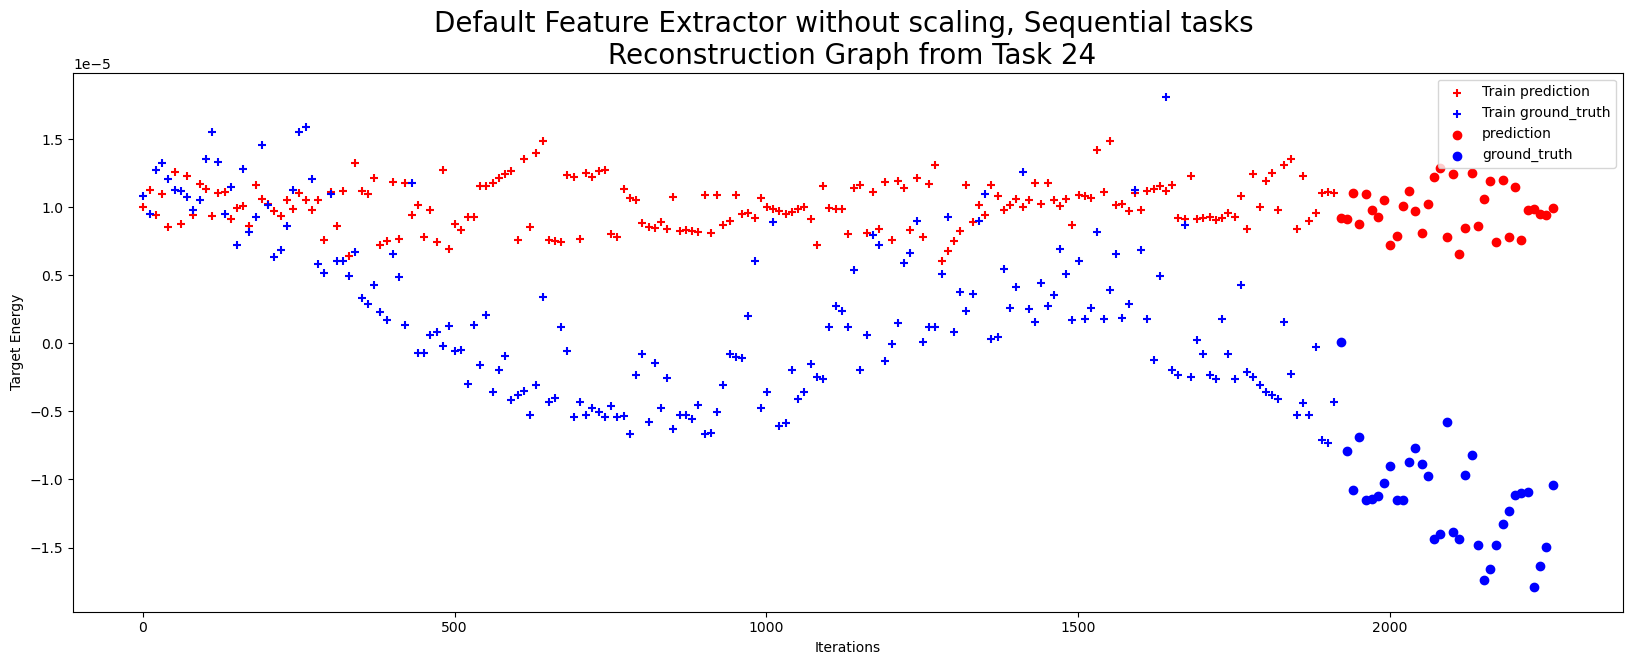

Training Task 12
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(249, 1, 208, 208) (249,)
(249, 43264)


<Figure size 640x480 with 0 Axes>

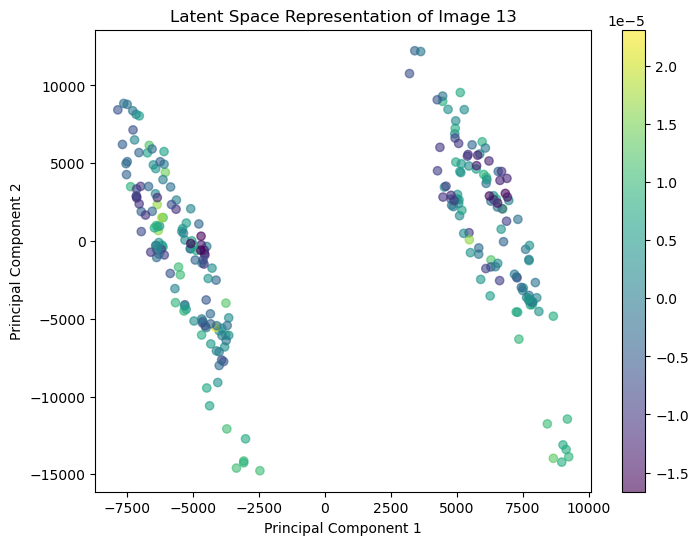

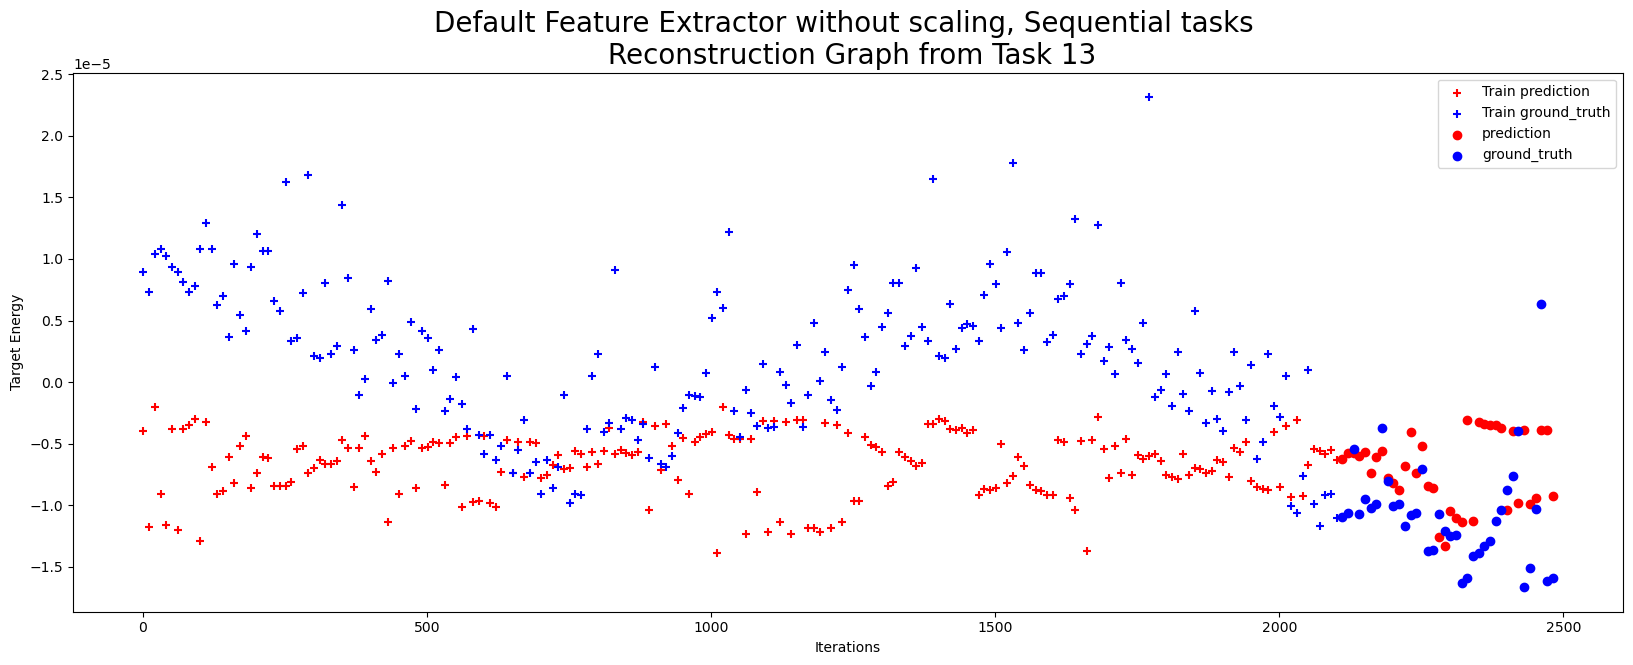

Training Task 13
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(258, 1, 208, 208) (258,)
(258, 43264)


<Figure size 640x480 with 0 Axes>

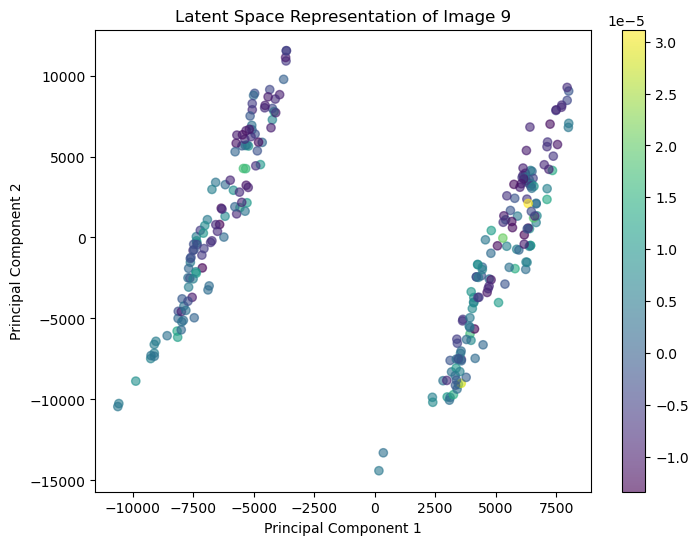

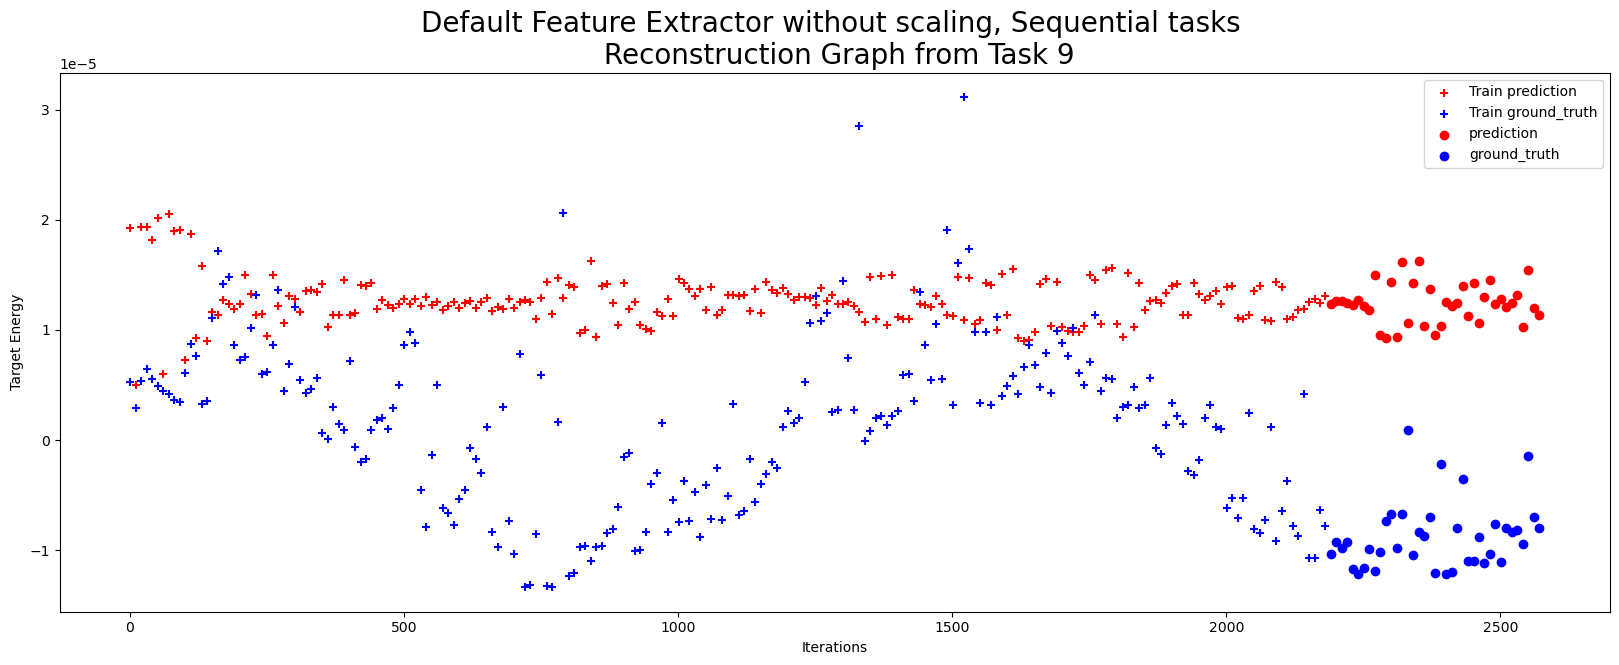

Training Task 14
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(238, 1, 208, 208) (238,)
(238, 43264)


<Figure size 640x480 with 0 Axes>

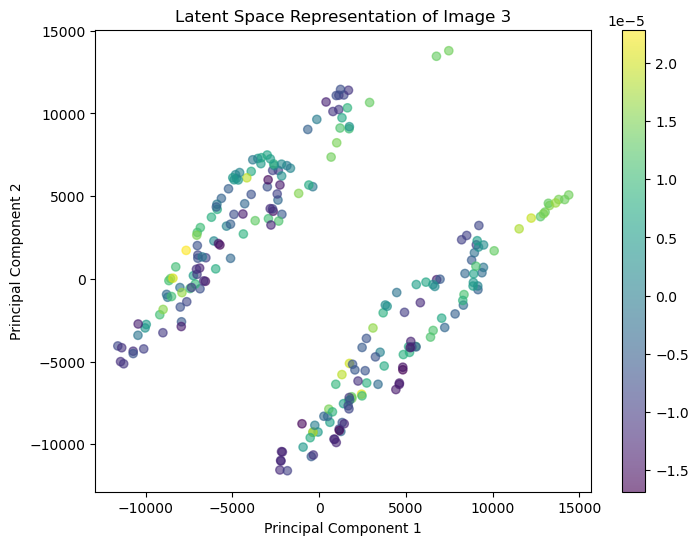

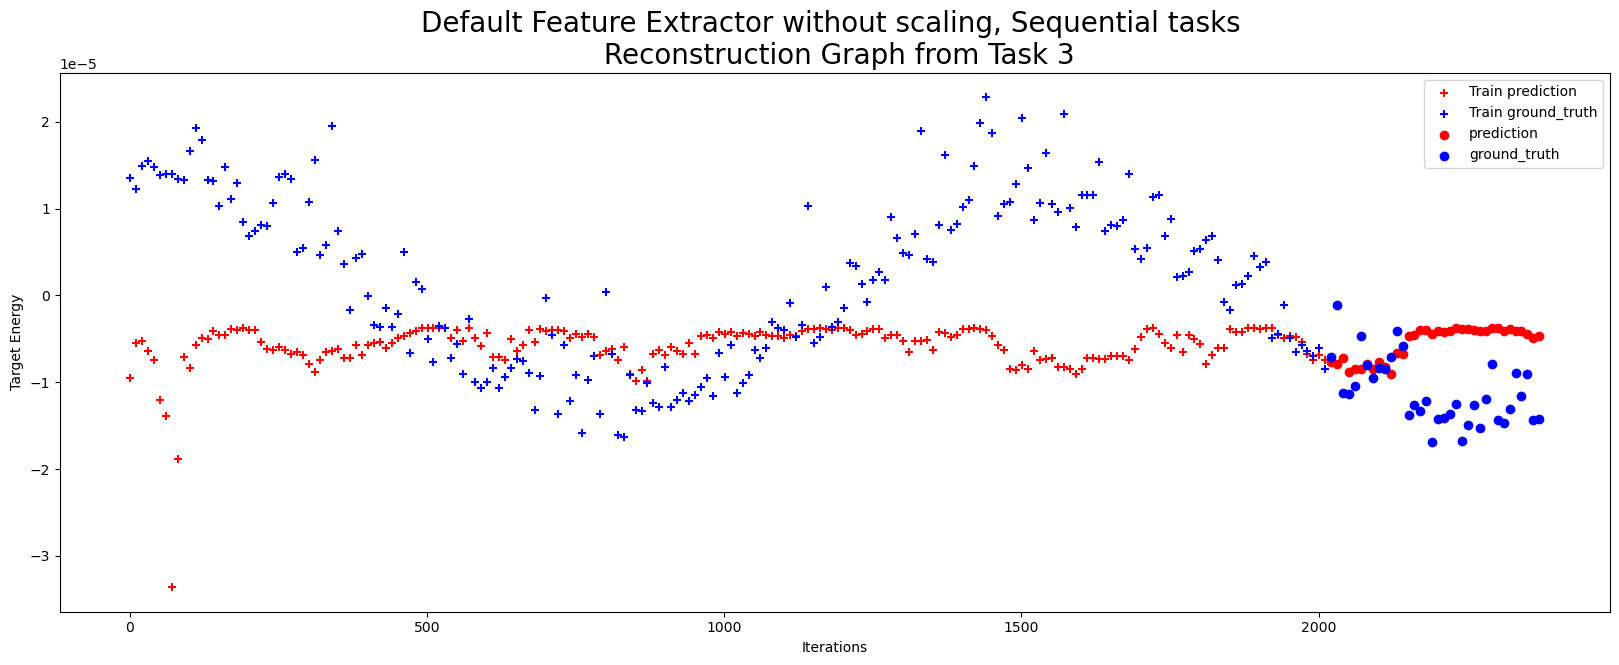

Training Task 15
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(221, 1, 208, 208) (221,)
(221, 43264)


<Figure size 640x480 with 0 Axes>

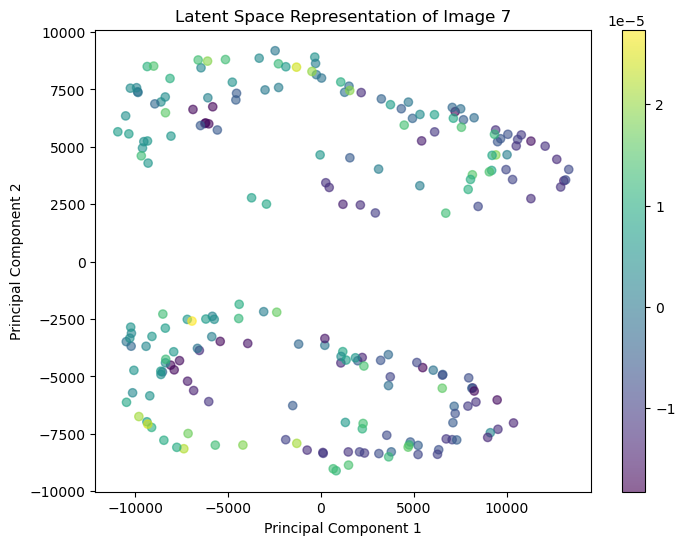

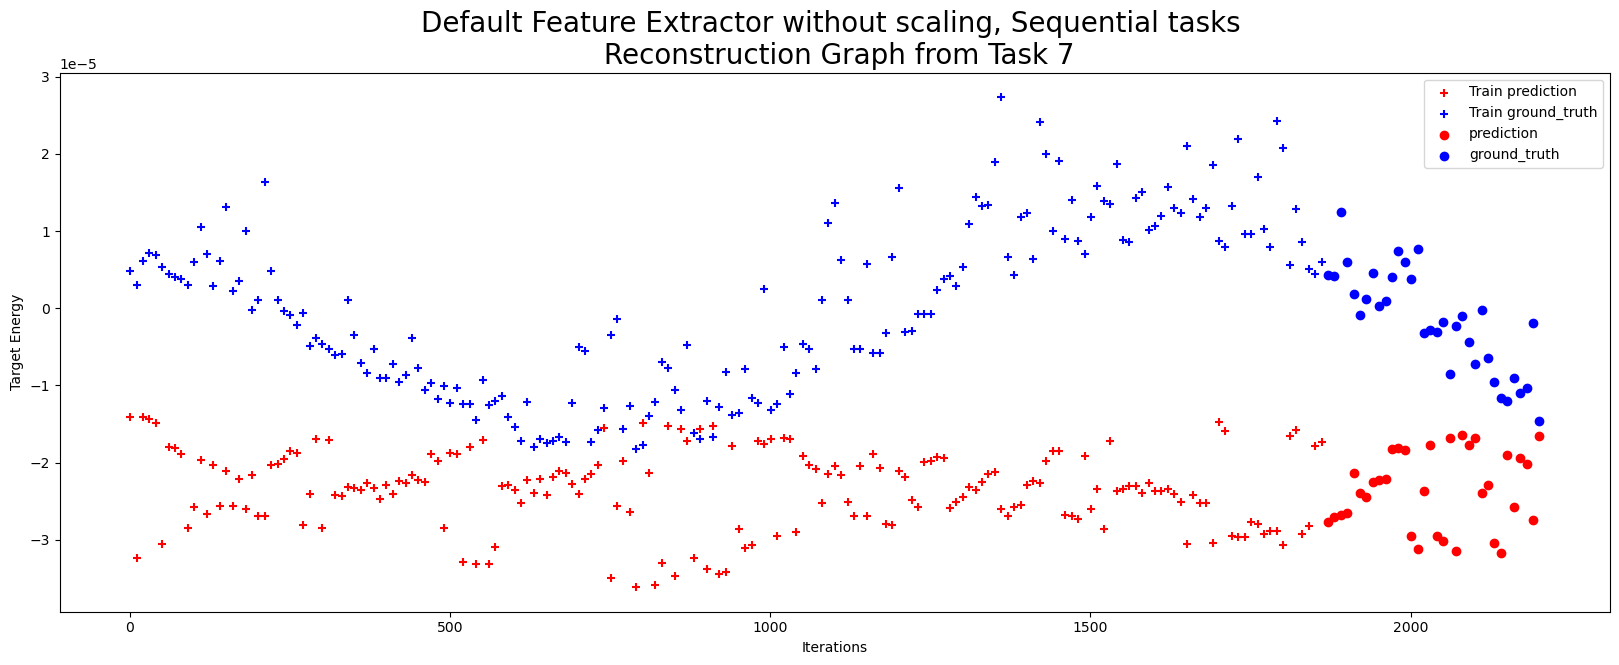

Training Task 16
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(241, 1, 208, 208) (241,)
(241, 43264)


<Figure size 640x480 with 0 Axes>

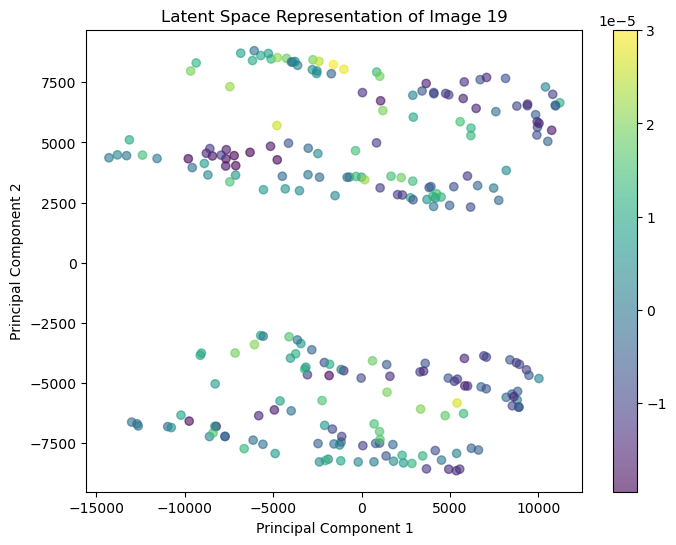

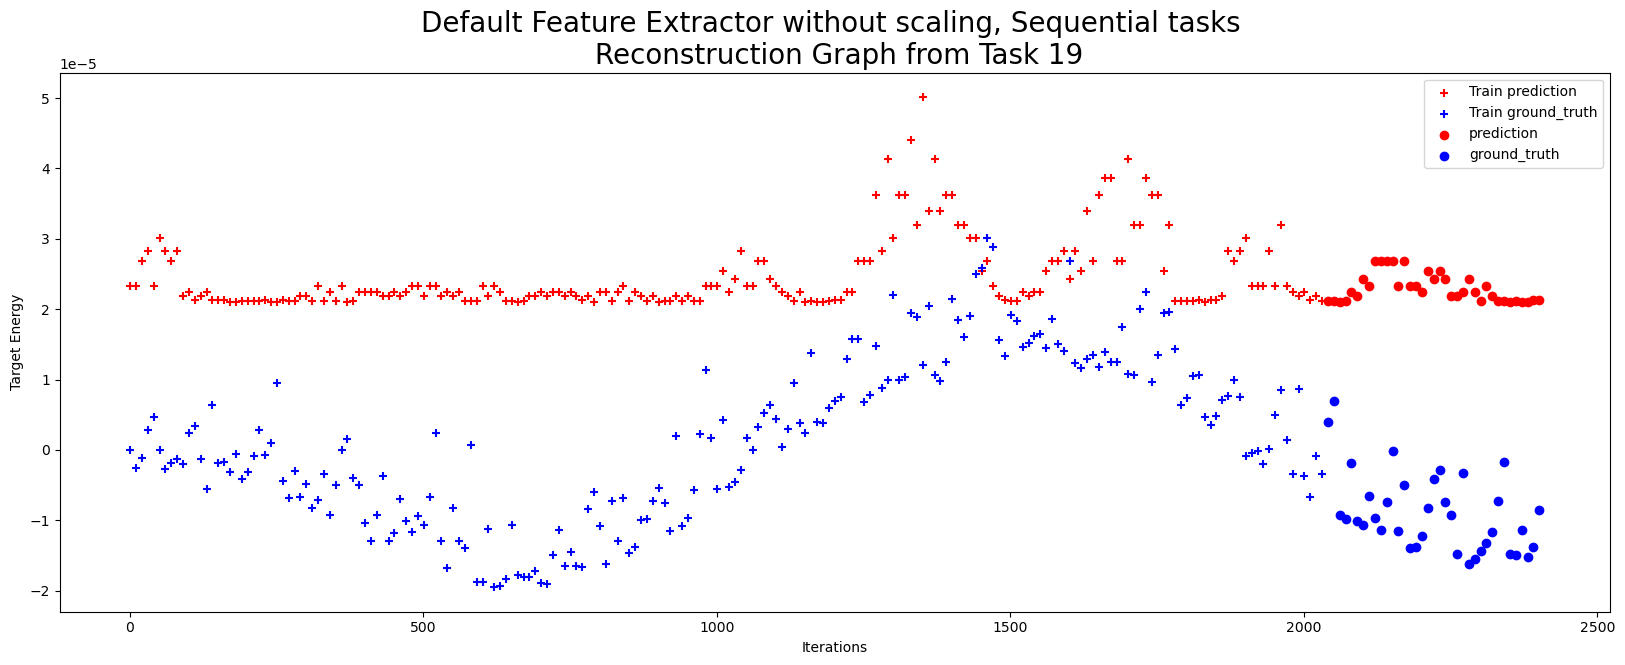

Training Task 17
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(244, 1, 208, 208) (244,)
(244, 43264)


<Figure size 640x480 with 0 Axes>

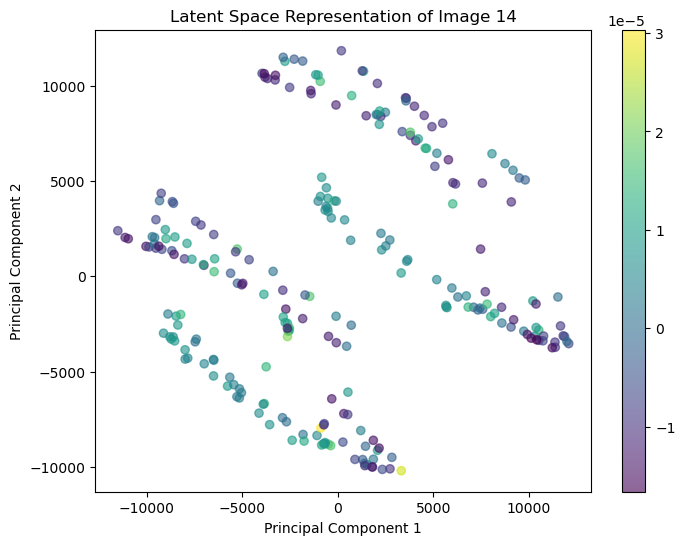

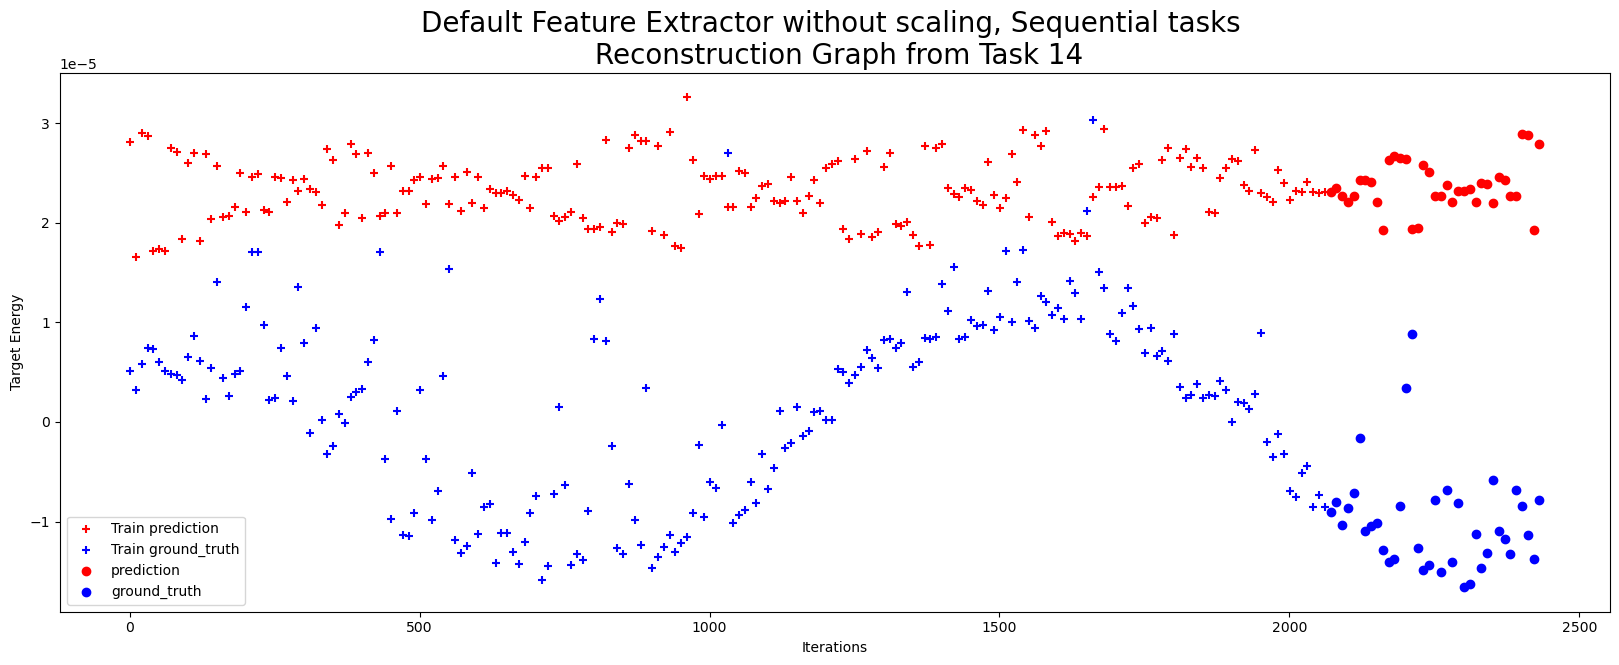

Training Task 18
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(246, 1, 208, 208) (246,)
(246, 43264)


<Figure size 640x480 with 0 Axes>

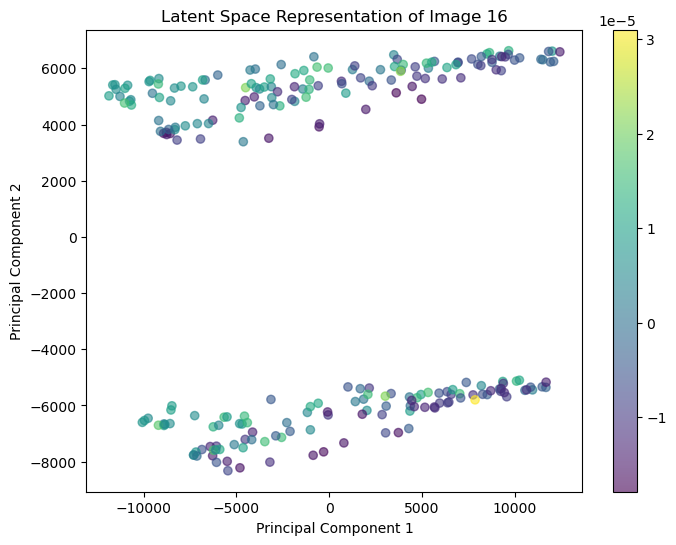

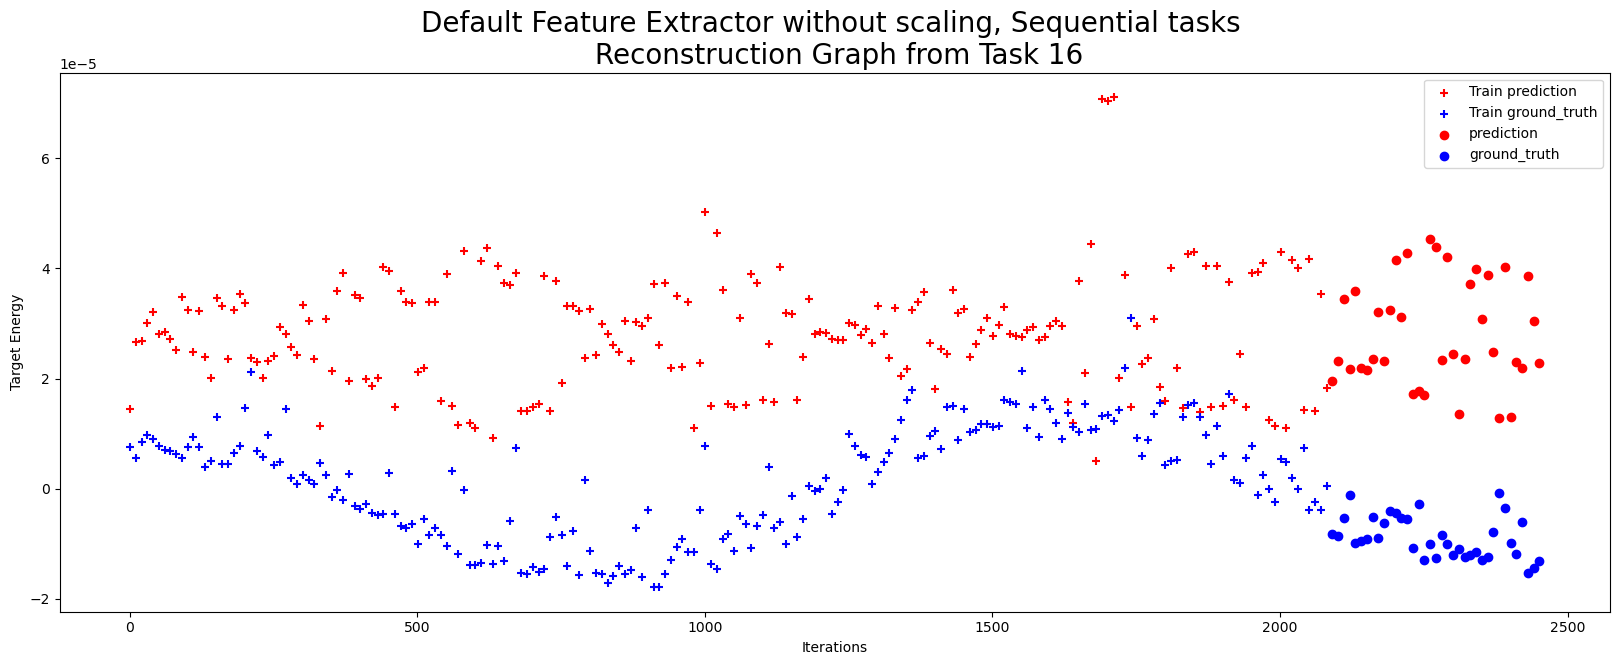

Training Task 19
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


(246, 1, 208, 208) (246,)
(246, 43264)


<Figure size 640x480 with 0 Axes>

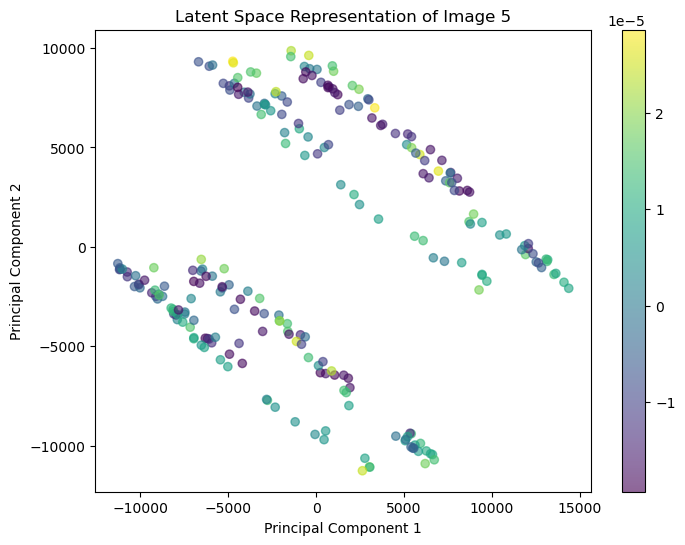

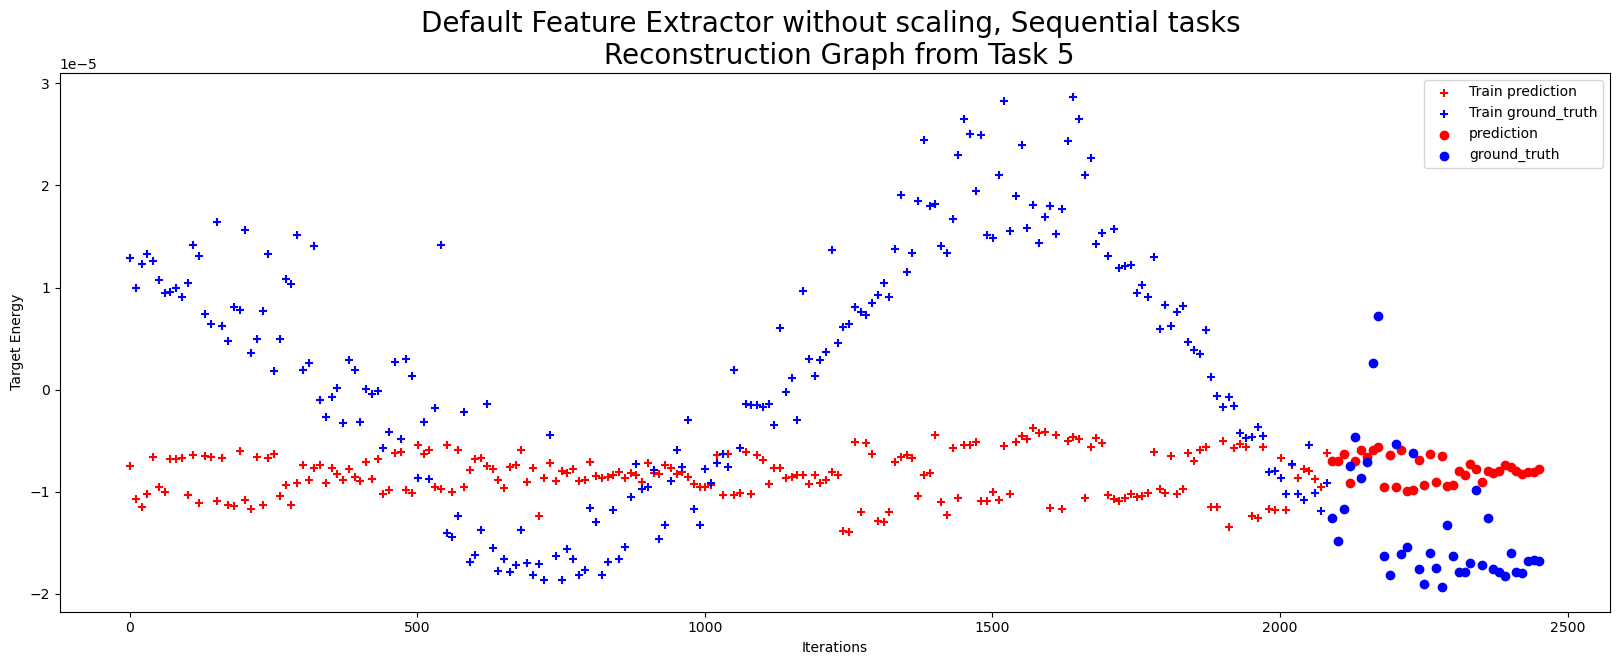

<Figure size 640x480 with 0 Axes>

In [54]:
datadim = 208*208#416 #43264

embedim = 2 
training_cycles = 100
n_tasks = 25
lr = 1e-1
augmentation = True
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)

'''
scaler = False


train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

clear_gpu_cache()
results = single_model_training_and_validation(train_tasks,ind_to_val,cropped_image_list,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,augmentation=augmentation)
#np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_noScaling.npy",results)
#save_gif()

Without resizing

In [39]:
#crop out the empty spaces
cropped_image_list = []
cropped_mask_list = []

for i in range(0,len(image_list)):
  local_cropped_imglist = []
  local_cropped_masklist = []
  for j in range(0,len(image_list[i])):
    local_cropped_imglist.append(image_list[i][j][:208,0:208])
    local_cropped_masklist.append(mask_list[i][j][:208,0:208])

  cropped_image_list.append(local_cropped_imglist)
  cropped_mask_list.append(local_cropped_masklist)

print("Number of tasks : ",len(cropped_image_list))
np.shape(cropped_image_list[0])

Number of tasks :  25


(443, 208, 208)

In [40]:
for task in range(len(cropped_image_list)):
    cropped_image_list[task] = np.array(cropped_image_list[task]).reshape(-1,1,208,208)

Traditional NN

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

def show_images(original, reconstructed, cols = 10):
    fig, axes = plt.subplots(2, cols, figsize=(15, 3))
    for i in range(cols):
        axes[0, i].imshow(original[i].squeeze(), cmap='gray' , label = "Original")
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].squeeze(), cmap='viridis', label = "Reconstructed")
        axes[1, i].axis('off')
    plt.legend()
    plt.show()

# Define the Autoencoder model
class AutoencoderWithRegression(nn.Module):
    def __init__(self):
        super(AutoencoderWithRegression, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),  # 1x28x28 -> 64x14x14
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # 64x14x14 -> 128x7x7
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # 128x7x7 -> 256x4x4
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 64, kernel_size=3, stride=2, padding=1),  # 128x7x7 -> 256x4x4
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 16, kernel_size=3, stride=2, padding=1),  # 128x7x7 -> 256x4x4
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )
        # # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 64, kernel_size=4, stride=2, padding=1),  # 256x4x4 -> 128x8x8
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 256, kernel_size=3, stride=2, padding=1),  # 256x4x4 -> 128x8x8
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1),  # 256x4x4 -> 128x8x8
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1),  # 128x8x8 -> 64x16x16
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2, padding=1),  # 64x16x16 -> 1x32x32
            nn.Sigmoid()  # Use sigmoid for pixel values in [0, 1]
        )
        
        # Regression layer
        self.regressor = nn.Sequential(
            # nn.Linear(173056, 10240),
            # nn.ReLU(),
            # nn.Linear(10240, 784),
            # nn.ReLU(),
            nn.Linear(784,512),
            nn.ReLU(),
            nn.Linear(512, 128),  # Assuming the encoder output is [batch_size, 256, 4, 4]
            nn.ReLU(),
            nn.Linear(128, 1)  # Regression output
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        # Flatten the encoded output for the regression layer
        flattened = encoded.view(encoded.size(0), -1)
        print(flattened.shape)
        regression_output = self.regressor(flattened)
        return decoded, regression_output

# Instantiate the model
autoencoder_with_regression = AutoencoderWithRegression()


In [42]:
def color_gradient_difference_plot_modified(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
 
    # Scatter plot for training data
    scatter_train = ax1.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=60, cmap='viridis', edgecolor='k', alpha=0.75, marker='D')
    cbar_train = plt.colorbar(scatter_train, ax=ax1)
    cbar_train.set_label('Training Error (meV)', fontsize=14, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=14, width=2)

    ax1.set_xlabel("Computed energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax1.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax1.set_title("Training Prediction Error", fontsize=18, fontweight='bold')
    ax1.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax1.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=14, width=2)

    # Scatter plot for prediction data
    scatter_pred = ax2.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=60, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax2)
    cbar_pred.set_label('Testing Error (meV)', fontsize=14, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=14, width=2)

    ax2.set_xlabel("Computed energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax2.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax2.set_title("Testing Prediction Error", fontsize=18, fontweight='bold')
    ax2.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax2.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.tick_params(axis='both', which='major', labelsize=14, width=2)

    plt.suptitle(f"Energy Difference Gradient for Task {task}", fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/gradient_plot/Gradient_plot_Task{task}_{feature_extractor}_{pois}_aug{augmentation}.png")
    plt.clf()
def color_gradient_difference_plot_combined(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot for training data
    scatter_train = ax.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=60, cmap='viridis', edgecolor='k', alpha=0.75, marker='D', label='Training Data')
    cbar_train = plt.colorbar(scatter_train, ax=ax)
    cbar_train.set_label('Training Error (meV)', fontsize=14, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=14, width=2)

    # Scatter plot for testing data
    scatter_pred = ax.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=60, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^', label='Testing Data')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax)
    cbar_pred.set_label('Testing Error (meV)', fontsize=14, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=14, width=2)

    # Set labels, title, and formatting
    ax.set_xlabel("Simulated energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_title(f"Energy Difference Gradient for Task {task}", fontsize=18, fontweight='bold')
    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)
    # Restrict y-axis to a limit of 0.1
    #ax.set_ylim([-0.04*1e-3, -0.03*1e-3])

    # Add a legend
    ax.legend(fontsize=14)

    plt.tight_layout()
    plt.show()
    plt.clf()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

def color_gradient_difference_plot_combined_with_insets(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Calculate the difference
    print(max(abs(training_pred)))
    print(mean(training_pred))
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    
    pred_data = np.concatenate((training_pred, predictions), axis=0).reshape(-1, 1)
    ground_truth_data = np.concatenate((training_ground_truth, energy_ground_truth), axis=0)

    difference = pred_data - ground_truth_data
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create figure and main axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Scatter plot for training data on the main plot
    scatter_train = ax.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=40, cmap='viridis', edgecolor='k', alpha=0.6, marker='D', label='Training Data')
    cbar_train = plt.colorbar(scatter_train, ax=ax)
    cbar_train.set_label('Training Error (meV)', fontsize=8, fontweight='bold')
    cbar_train.ax.tick_params(labelsize=8, width=2)

    # Fit line for training data on the main plot
    coeffs_train = np.polyfit(np.array(training_ground_truth).reshape(-1,), np.array(training_pred).reshape(-1,), 1)
    fit_line_train = np.polyval(coeffs_train, np.array(training_ground_truth).reshape(-1,))
    
    # Scatter plot for testing data on the main plot
    scatter_pred = ax.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=40, cmap='coolwarm', edgecolor='k', alpha=0.6, marker='^', label='Testing Data')
    cbar_pred = plt.colorbar(scatter_pred, ax=ax)
    cbar_pred.set_label('Testing Error (meV)', fontsize=8, fontweight='bold')
    cbar_pred.ax.tick_params(labelsize=8, width=2)

    # Fit line for testing data on the main plot
    coeffs_test = np.polyfit(np.array(energy_ground_truth).reshape(-1,), np.array(predictions).reshape(-1,), 1)
    fit_line_test = np.polyval(coeffs_test, np.array(energy_ground_truth).reshape(-1,))
    

    # Set labels, title, and formatting
    ax.set_xlabel("Simulated energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Predicted energy difference per atom (meV)", fontsize=14, fontweight='bold')
    ax.set_title(f"Energy Difference Gradient for Task {task}", fontsize=14, fontweight='bold')
    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=8, width=2)
    #ax.set_ylim([-0.04*1e-3, 0.03*1e-3])
    #ax.set_ylim([-0.039*1e-3, -0.038*1e-3])

    # Add a legend
    ax.legend(fontsize=10, bbox_to_anchor=(0.75, 1.08), ncol=2)

    # Inset plot for training data
    ax_inset_train = inset_axes(ax, width="40%", height="30%", loc=1, bbox_to_anchor=(0,-0.02,1,1), bbox_transform=ax.transAxes)  # loc=1 corresponds to upper right
    ax_inset_train.scatter(training_ground_truth, training_pred, c=difference[:len(training_pred)]/1e-3, s=30, cmap='viridis', edgecolor='k', alpha=0.75, marker='D')
    ax_inset_train.plot(training_ground_truth, fit_line_train, color='darkmagenta',  linestyle= "-.", label='Training Fit')
    ax_inset_train.set_title("Training Data", fontsize=10)
    ax_inset_train.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_train.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_train.grid(True, linestyle='--', alpha=0.7)
    ax_inset_train.tick_params(axis='both', which='major', labelsize=7, width=1)
    ax_inset_train.legend(fontsize=5)
    #ax_inset_train.set_ylim([-0.04*1e-3, 0.03*1e-3])

    # Inset plot for testing data
    ax_inset_test = inset_axes(ax, width="40%", height="30%", loc=4, bbox_to_anchor=(0,0.02,1,1), bbox_transform=ax.transAxes)  # loc=4 corresponds to lower right
    ax_inset_test.scatter(energy_ground_truth, predictions, c=difference[len(training_pred):]/1e-3, s=30, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^')
    ax_inset_test.plot(energy_ground_truth, fit_line_test, color='tomato', linestyle="-.", label='Testing Fit')
    ax_inset_test.set_title("Testing Data", fontsize=10)
    ax_inset_test.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_test.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax_inset_test.grid(True, linestyle='--', alpha=0.7)
    ax_inset_test.tick_params(axis='both', which='major', labelsize=7, width=1)
    ax_inset_test.legend(fontsize=5)
    

    plt.tight_layout()
    plt.show()
    plt.clf()

# Example call (assuming you have the required data and function dependencies):
# color_gradient_difference_plot_combined_with_insets(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

def plot_3d_energy_difference(energy_ground_truth, predictions, training_pred, training_ground_truth, task, feature_extractor, scaler, augmentation):
    # Compute the differences
    mask = (training_pred >= -5*1e-5) & (training_pred <= 5*1e-5)
    training_pred = training_pred[mask]
    training_ground_truth = training_ground_truth[mask]
    difference_training = training_pred - training_ground_truth
    difference_predictions = predictions - energy_ground_truth

    # Create 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for training data
    scatter_train = ax.scatter(training_ground_truth, training_pred, difference_training,
                               c=difference_training, cmap='viridis', edgecolor='k', alpha=0.75, marker='D', label='Training Data')

    # Scatter plot for prediction data
    scatter_pred = ax.scatter(energy_ground_truth, predictions, difference_predictions,
                              c=difference_predictions, cmap='coolwarm', edgecolor='k', alpha=0.75, marker='^', label='Testing Data')

    # Adding color bar
    cbar = plt.colorbar(scatter_train, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('Energy Difference (meV)', fontsize=14, fontweight='bold')
    cbar.ax.tick_params(labelsize=14, width=2)

    # Set labels
    ax.set_xlabel("Computed Energy Difference per Atom (meV)", fontsize=10, fontweight='bold')
    ax.set_ylabel("Predicted Energy Difference per Atom (meV)", fontsize=10, fontweight='bold')
    ax.set_zlabel("Energy Difference (meV)", fontsize=10, fontweight='bold')

    ax.set_title(f"3D Energy Difference for Task {task}", fontsize=18, fontweight='bold')

    ax.xaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    ax.zaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))

    ax.tick_params(axis='both', which='major', labelsize=8, width=2)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adding legend
    ax.legend(loc='upper right', fontsize=12)
    
    plt.show()



def mod_plot_training_loss(training_loss, task, scaler_flag, feature_extractor, training_cycles, lr, augmentation):
    plt.figure(figsize=(12, 8))

    # Plot the training loss with enhancements
    plt.plot(training_loss, color='darkblue', linestyle='-', marker='o', markersize=5, linewidth=2, label='Training Loss')

    # Add a title with larger, bold font
    plt.title(f"Training Loss - Task {task}", fontsize=24, fontweight='bold', color='darkblue')

    # Label x and y axes with larger, bold font
    plt.xlabel("Training Cycles", fontsize=18, fontweight='bold')
    plt.ylabel("Loss Optimization - MSE+MLL", fontsize=18, fontweight='bold')

    # Set x-axis ticks to show every training cycle, if appropriate
    plt.xticks(fontsize=14, fontweight='bold')

    # Set y-axis ticks with consistent styling
    plt.yticks(fontsize=14, fontweight='bold')

    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend
    plt.legend(fontsize=16, loc='best', frameon=True, shadow=True, fancybox=True)

    # Add a horizontal line at y=0 for reference
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Reference Line')

    # Optionally save the plot
    #plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/training_loss/Training_loss_Task{task}_Norm{scaler_flag}_{feature_extractor}_aug{augmentation}_training{training_cycles}_lr{lr}_.png")

    plt.clf()



import numpy as np

def single_model_training_and_validation_mask(train_tasks, ind_to_val, image_mask, energy_to_ind, title, **kwargs):
    datadim = kwargs.get("datadim", 64)
    embedim = 2
    training_cycles = kwargs.get("training_cycles", 10)
    lr = kwargs.get("lr", 1e-2)
    scaler_flag = kwargs.get("scaler", False)
    results = {int(ind_to_val[task]): [] for task in train_tasks}
    feature_extractor = kwargs.get("reptile", "default_FE")
    augmentation = kwargs.get("augmentation", True)
    print(feature_extractor)
    
    
    for task in train_tasks:
        input_image = image_mask[task][0]
        print(f"Training Task {ind_to_val[task]}")
        (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
            input_image, energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.15, shuffle=False, random_state=2)
        
        print(X_train.shape)
        
        X_train = np.squeeze(X_train)
        X_test = np.squeeze(X_test)

        s1, s2, s3 = X_train.shape
        X_train = X_train.reshape(-1, s2, s3)
        X_test = X_test.reshape(-1, s2, s3)

        print(X_train.shape)
        num_channels = X_train.shape[-1]
        print(num_channels)
        # model_sample = LeNet(1, embedim)
        # model_mod = kwargs.get("model_mod", model_sample)

        y_train = np.array(y_train).reshape(1, -1)
        y_test = np.array(y_test).reshape(1, -1)

        if scaler_flag:
            X_train = scaler_fun.fit_transform(X_train)
            X_test = scaler_fun.fit_transform(X_test)
        
        X_train = X_train[:, np.newaxis, :, :]
        X_test = X_test[:, np.newaxis, :, :]
        
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        print(X_train_tensor.shape, y_train_tensor.shape)

        autoencoder_with_regression = AutoencoderWithRegression()
        criterion = nn.MSELoss()
        reg_criterion = nn.MSELoss()
        optimizer = optim.Adam(autoencoder_with_regression.parameters(), lr=1e-2)
        
        for epoch in range(training_cycles):
            
            optimizer.zero_grad()
            outputs, regression_output = autoencoder_with_regression(X_train_tensor)
            print("Outputs: ",outputs.shape)
            recons_loss = criterion(outputs, X_train_tensor)
            print(f'Epoch [{epoch+1}/{training_cycles}], Reconstruction Loss: {recons_loss.item():.4f}')
            reg_loss = reg_criterion(regression_output, y_train_tensor)
            print(f'Epoch [{epoch+1}/{training_cycles}], Regression Loss: {reg_loss.item():.4f}')
            loss = recons_loss + reg_loss
            loss.backward()
            #reg_loss.backward()
            #recons_loss.backward()
            optimizer.step()
            print(f'Epoch [{epoch+1}/{training_cycles}], Combined Loss: {loss.item():.4f}')
        
        #model_mod.eval()
        with torch.no_grad():
            #train_mean = model_mod(X_train_tensor).numpy()
            #mean = model_mod(X_test_tensor).numpy()
            reconstructed, regressed = autoencoder_with_regression(X_test_tensor)
            test_loss = criterion(regressed,y_test_tensor)
        print(f'Test Loss: {test_loss.item():.4f}')

        high_energy_x = X_train_tensor[torch.argmax(y_train_tensor)]
        low_energy_x = X_train_tensor[torch.argmin(y_train_tensor)]
 
        energy_x = torch.cat((high_energy_x, low_energy_x), dim=0)
        energy_y = torch.cat((y_train_tensor[:,torch.argmax(y_train_tensor)],y_train_tensor[:,torch.argmin(y_train_tensor)]),dim=0)
        print(torch.argmax(y_train_tensor), torch.argmin(y_train_tensor))
        reconstructed_x = torch.cat((outputs[torch.argmax(y_train_tensor)],outputs[torch.argmin(y_train_tensor)]),dim=0)
        pred_y = torch.cat((regression_output[torch.argmax(y_train_tensor)],regression_output[torch.argmin(y_train_tensor)]),dim=0)
        show_images_energy(energy_x,reconstructed_x.detach().cpu().numpy(),cols=2)

        plot_high_low_energy(energy_x.detach().cpu().numpy(), energy_y, pred_y.detach().cpu().numpy())
        show_images(X_test_tensor,reconstructed)
        
        clear_gpu_cache()
        #print("Pred: ", mean.shape, y_test.shape)
        
        reconstruction_graph_plot(iterations_train,regression_output.detach().cpu().numpy(),y_train_tensor.detach().cpu().numpy(),iterations_test,regressed.detach().cpu().numpy(),y_test_tensor.detach().cpu().numpy(),ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr)
        # mod_reconstruction_graph_plot(iterations_train, regression_output.detach().cpu().numpy(), y_train_tensor.detach().cpu().numpy(), iterations_test, regressed.detach().cpu().numpy(), y_test_tensor.detach().cpu().numpy(), ind_to_val, title, task, scaler_flag, feature_extractor, training_cycles, lr, augmentation)
        break
        #results[int(ind_to_val[task])] = [iterations_train, iterations_test, train_mean, mean, y_train, y_test, feature_extractor, scaler_flag, ind_to_val, title, training_cycles, lr]
    #return results

In [43]:
def show_images_energy(original, reconstructed,cols = 10):
    fig, axes = plt.subplots(2, cols)#, figsize=(15, 3))
    for i in range(cols):
        axes[0, i].imshow(original[i].squeeze(), cmap='gray' , label = "Original")
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].squeeze(), cmap='viridis', label = "Reconstructed")
        axes[1, i].axis('off')
    plt.legend()
    plt.show()


In [44]:
datadim = 64
embedim = 2 
training_cycles = 150
n_tasks = 25
lr = 1e-2
torch.set_default_device("cpu")
augmentation = False
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)

scaler = False
'''

train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation_mask(train_tasks,ind_to_val,image_mask,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,augmentation=augmentation)
# np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_noScaling.npy",results)

default_FE
Training Task 1
(338, 1, 208, 208)
(338, 208, 208)
208
torch.Size([338, 1, 208, 208]) torch.Size([1, 338])
torch.Size([338, 784])
Outputs:  torch.Size([338, 1, 208, 208])
Epoch [1/150], Reconstruction Loss: 0.3245
Epoch [1/150], Regression Loss: 0.0096


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: Using a target size (torch.Size([1, 338])) that is different to the input size (torch.Size([338, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return func(*args, **kwargs)


Epoch [1/150], Combined Loss: 0.3341
torch.Size([338, 784])
Outputs:  torch.Size([338, 1, 208, 208])
Epoch [2/150], Reconstruction Loss: 0.2721
Epoch [2/150], Regression Loss: 48.8968
Epoch [2/150], Combined Loss: 49.1689
torch.Size([338, 784])
Outputs:  torch.Size([338, 1, 208, 208])
Epoch [3/150], Reconstruction Loss: 0.1962
Epoch [3/150], Regression Loss: 456.9208
Epoch [3/150], Combined Loss: 457.1170
torch.Size([338, 784])
Outputs:  torch.Size([338, 1, 208, 208])
Epoch [4/150], Reconstruction Loss: 0.1295
Epoch [4/150], Regression Loss: 0.0001


KeyboardInterrupt: 

Just for Auto-encoder decoder without regression

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),  # 1x28x28 -> 64x14x14
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # 64x14x14 -> 128x7x7
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # 128x7x7 -> 256x4x4
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 64, kernel_size=3, stride=2, padding=1),  # 128x7x7 -> 256x4x4
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 16, kernel_size=3, stride=2, padding=1),  # 128x7x7 -> 256x4x4
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 64, kernel_size=4, stride=2, padding=1),  # 256x4x4 -> 128x8x8
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 256, kernel_size=3, stride=2, padding=1),  # 256x4x4 -> 128x8x8
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1),  # 256x4x4 -> 128x8x8
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1),  # 128x8x8 -> 64x16x16
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2, padding=1),  # 64x16x16 -> 1x32x32
            nn.Sigmoid()  # Use sigmoid for pixel values in [0, 1]
        )
    def forward(self, x):
            x = self.encoder(x)
            x = self.decoder(x)
            return x

# Instantiate the model
autoencoder = Autoencoder()

def single_model_training_and_validation_mask(train_tasks, ind_to_val, image_mask, energy_to_ind, title, **kwargs):
    datadim = kwargs.get("datadim", 64)
    embedim = 2
    training_cycles = kwargs.get("training_cycles", 10)
    lr = kwargs.get("lr", 1e-2)
    scaler_flag = kwargs.get("scaler", False)
    results = {int(ind_to_val[task]): [] for task in train_tasks}
    feature_extractor = kwargs.get("reptile", "default_FE")
    augmentation = kwargs.get("augmentation", True)
    print(feature_extractor)
    
    
    for task in train_tasks:
        input_image = image_mask[task][0]
        print(f"Training Task {ind_to_val[task]}")
        (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
            input_image, energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.15, shuffle=True, random_state=2)
        
        print(X_train.shape)
        
        X_train = np.squeeze(X_train)
        X_test = np.squeeze(X_test)

        s1, s2, s3 = X_train.shape
        X_train = X_train.reshape(-1, s2, s3)
        X_test = X_test.reshape(-1, s2, s3)

        print(X_train.shape)
        num_channels = X_train.shape[-1]
        print(num_channels)
        # model_sample = LeNet(1, embedim)
        # model_mod = kwargs.get("model_mod", model_sample)

        y_train = np.array(y_train).reshape(1, -1)
        y_test = np.array(y_test).reshape(1, -1)

        if scaler_flag:
            X_train = scaler_fun.fit_transform(X_train)
            X_test = scaler_fun.fit_transform(X_test)
        
        X_train = X_train[:, np.newaxis, :, :]
        X_test = X_test[:, np.newaxis, :, :]
        
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        print(X_train_tensor.shape, y_train_tensor.shape)

        autoencoder = Autoencoder()
        criterion = nn.MSELoss()
        optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
        
        for epoch in range(training_cycles):
            
            optimizer.zero_grad()
            outputs = autoencoder(X_train_tensor)
            print("Outputs: ",outputs.shape)
            loss = criterion(outputs, X_train_tensor)
            loss.backward()
            optimizer.step()
            print(f'Epoch [{epoch+1}/{training_cycles}], Loss: {loss.item():.4f}')
        
        #model_mod.eval()
        with torch.no_grad():
            print("TEST SET SIZE: ",X_test_tensor.shape)
            #train_mean = model_mod(X_train_tensor).numpy()
            #mean = model_mod(X_test_tensor).numpy()
            reconstructed = autoencoder(X_test_tensor)

        show_images(X_test_tensor,reconstructed)
        
        clear_gpu_cache()
        #print("Pred: ", mean.shape, y_test.shape)
        #break
        #mod_reconstruction_graph_plot(iterations_train, train_mean, y_train, iterations_test, mean, y_test, ind_to_val, title, task, scaler_flag, feature_extractor, training_cycles, lr, augmentation)
        break
        #results[int(ind_to_val[task])] = [iterations_train, iterations_test, train_mean, mean, y_train, y_test, feature_extractor, scaler_flag, ind_to_val, title, training_cycles, lr]
    #return results
    return autoencoder

Edge Convoluted Images

(208, 208)


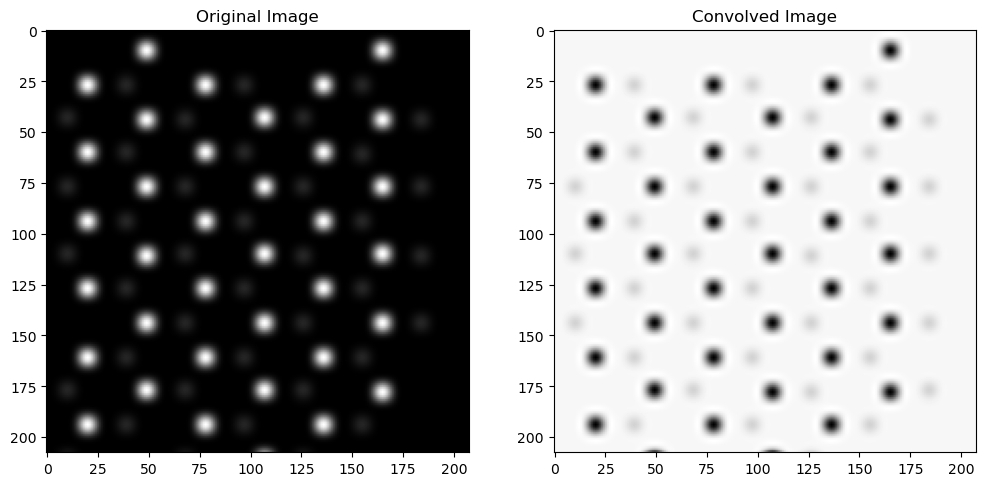

In [17]:
import numpy as np
from scipy.ndimage import convolve

import matplotlib.pyplot as plt

kernel = np.array([[1, 1, 1], [1, -9, 1], [1, 1, 1]])

# Select an image to apply the convolution (using the first image from cropped_image_list as an example)
image = cropped_image_list[0][0].reshape(208,208)
print(image.shape)

# Apply convolution
for task in range(len(cropped_image_list)):
    convoluted_images = []
    for images in cropped_image_list[task]:
        convoluted_images.append(convolve(images.reshape(208,208), kernel))
    convoluted_images = np.array(convoluted_images)

    cropped_image_list[task] = convoluted_images.reshape(-1,1,208,208)

convolved_image = convoluted_images[0]

# Visualize the original and convolved images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")

ax2.imshow(convolved_image, cmap='gray')
ax2.set_title("Convolved Image")

plt.show()

default_FE
Training Task 1
(166, 1, 208, 208)
dtype : torch.float32


/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


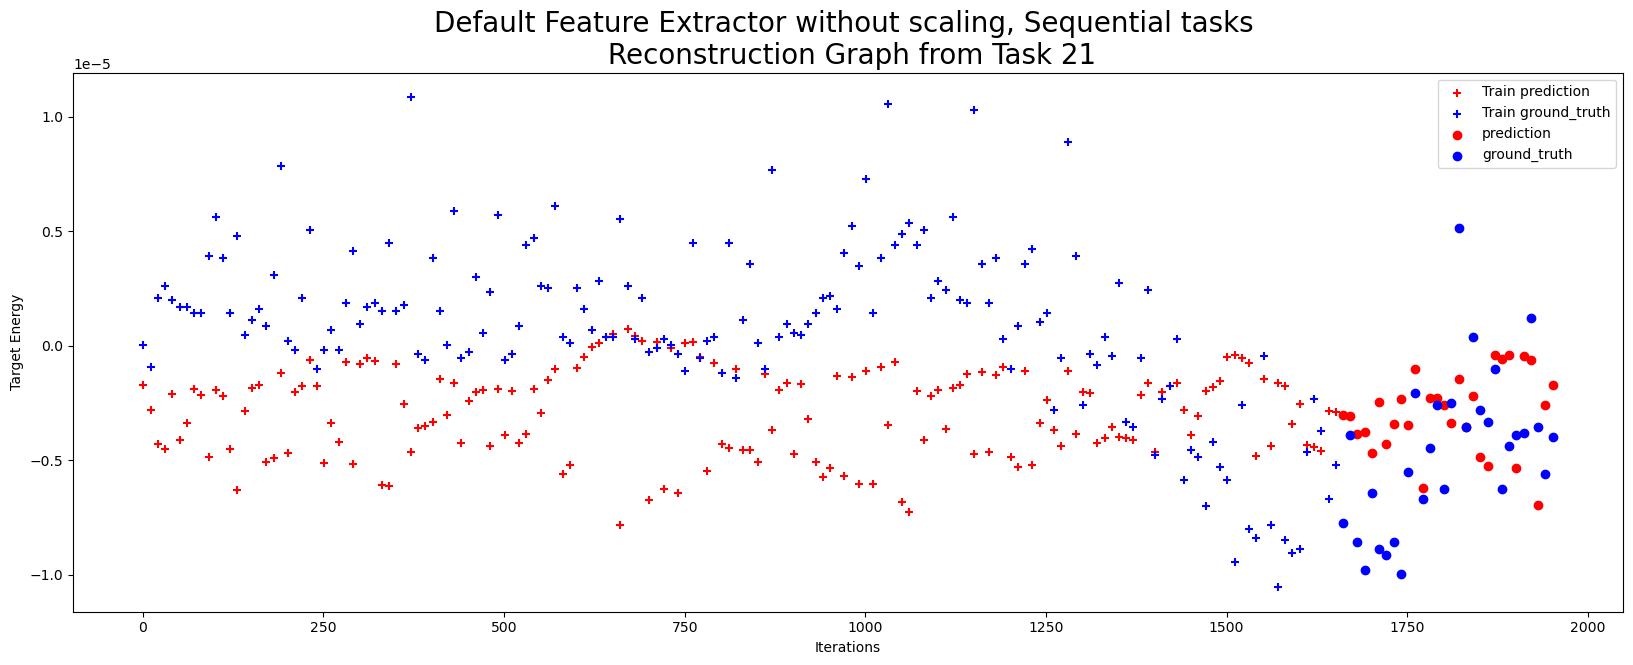

Training Task 2
(171, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

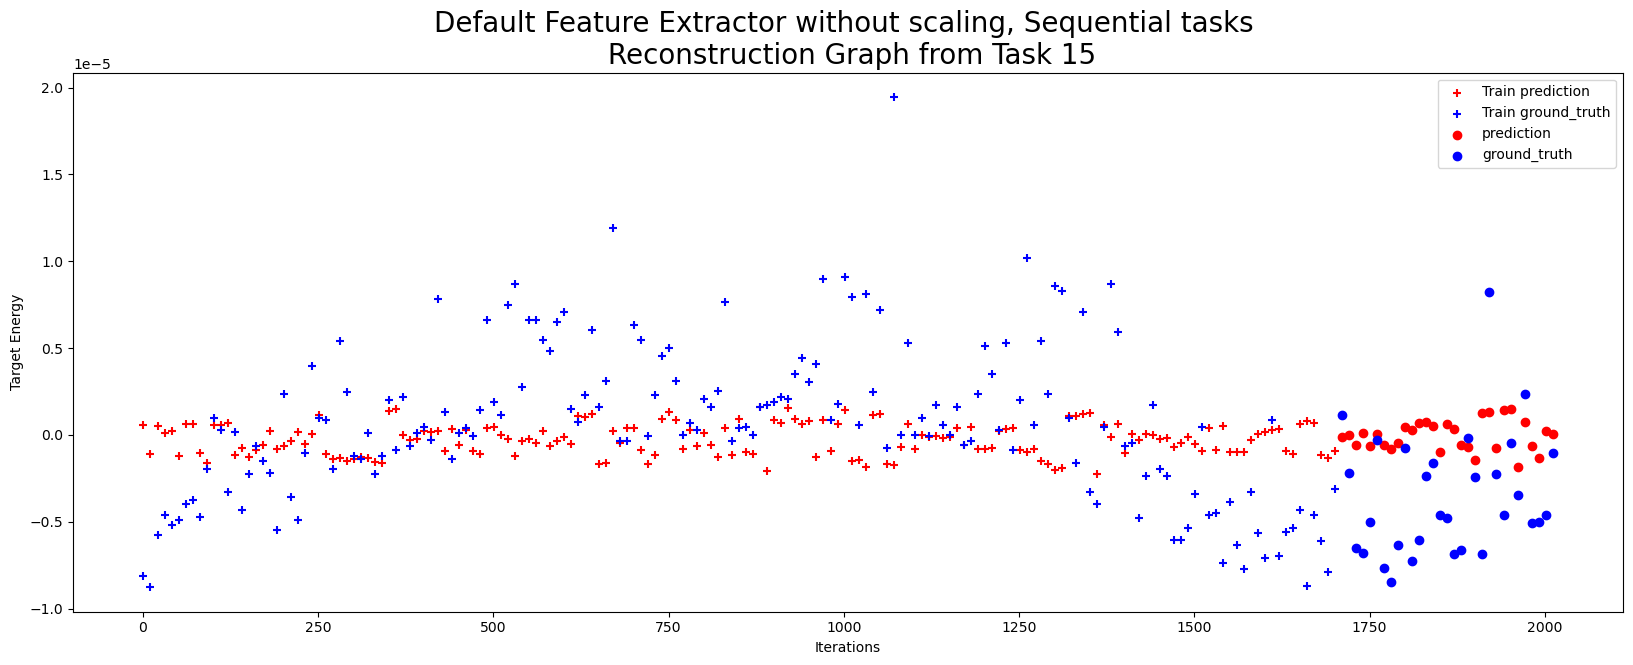

Training Task 3
(173, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

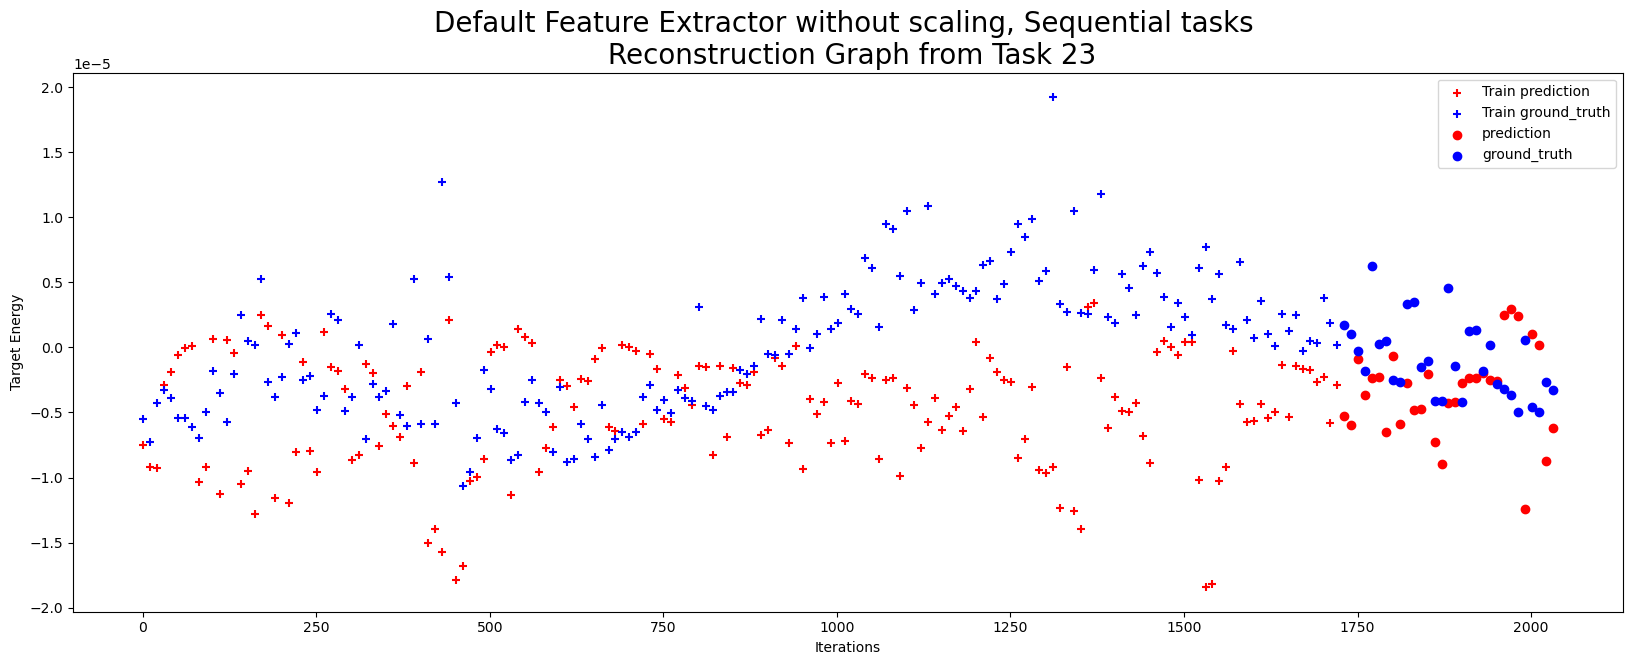

Training Task 4
(169, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

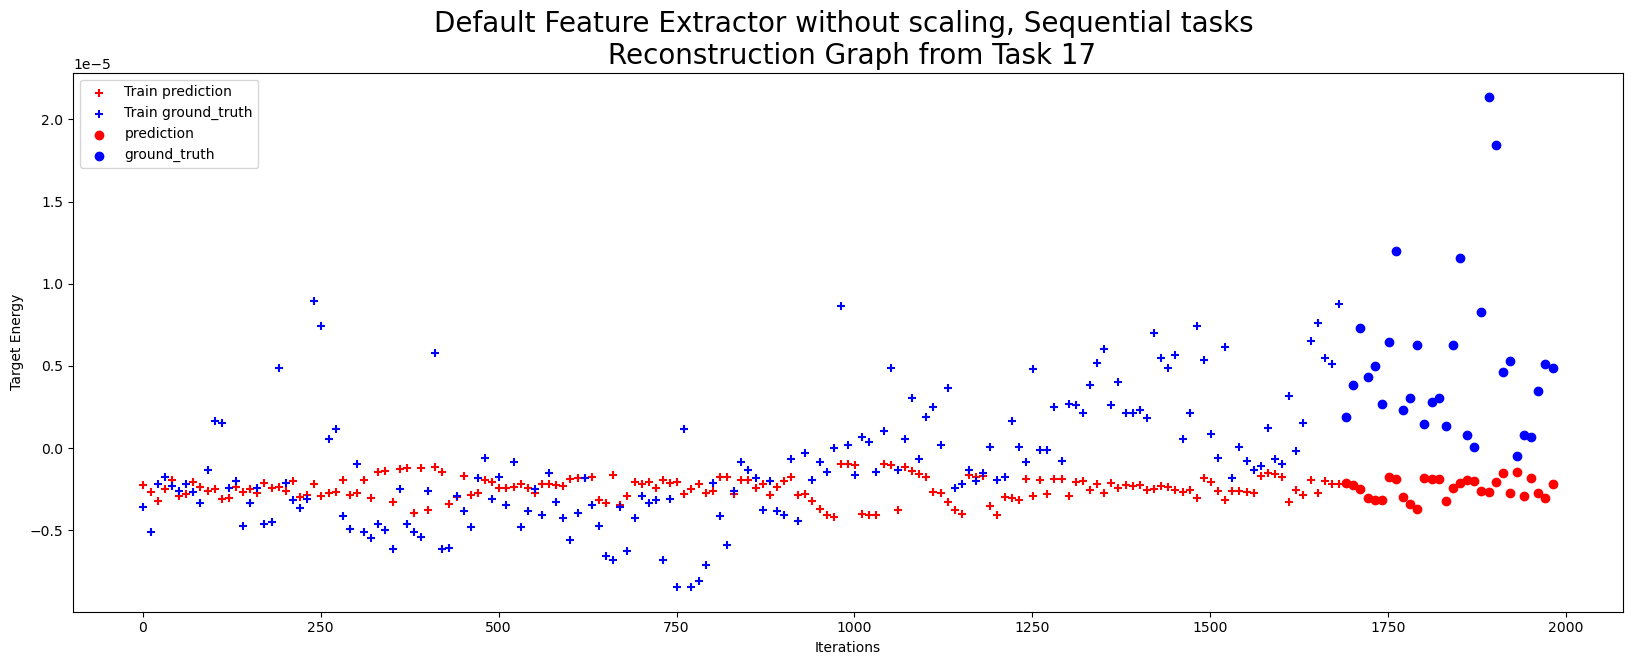

Training Task 5
(193, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

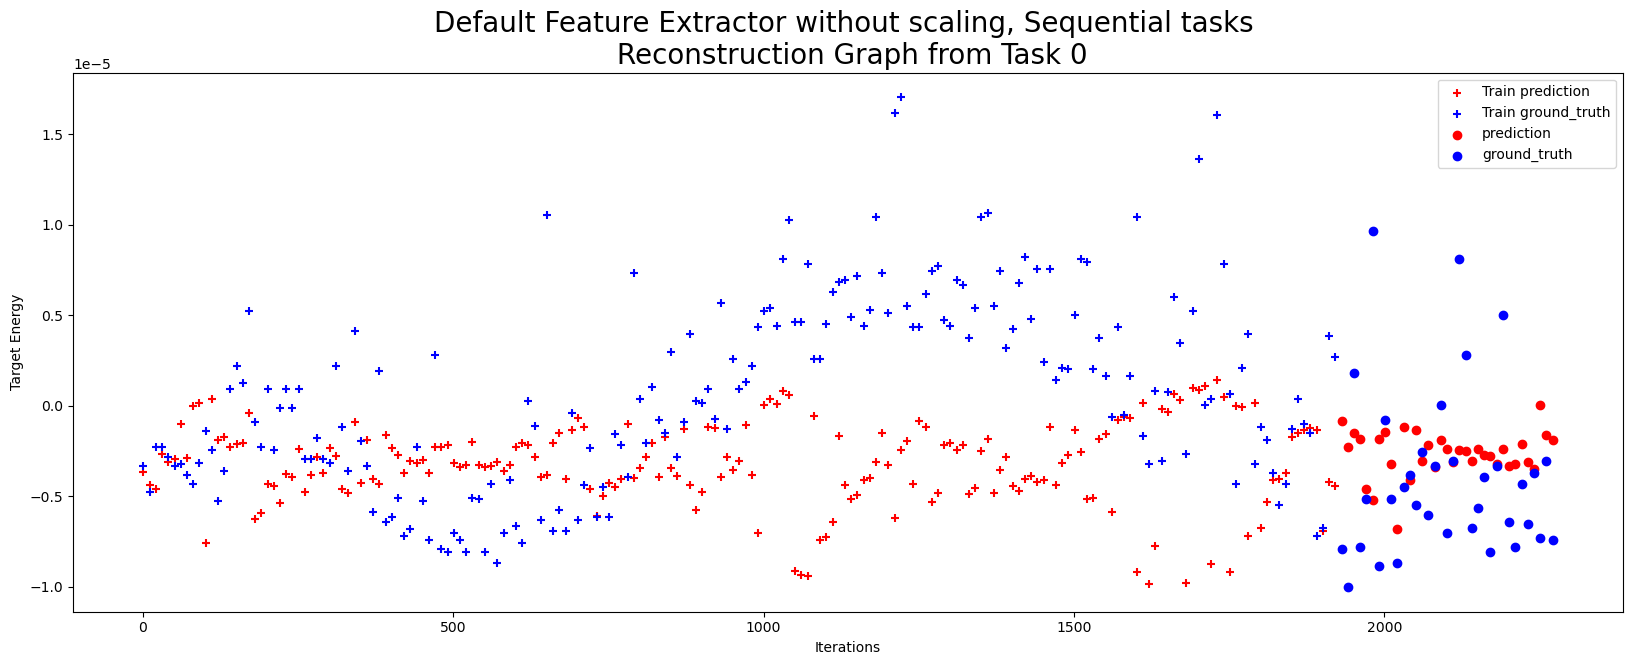

Training Task 6
(182, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

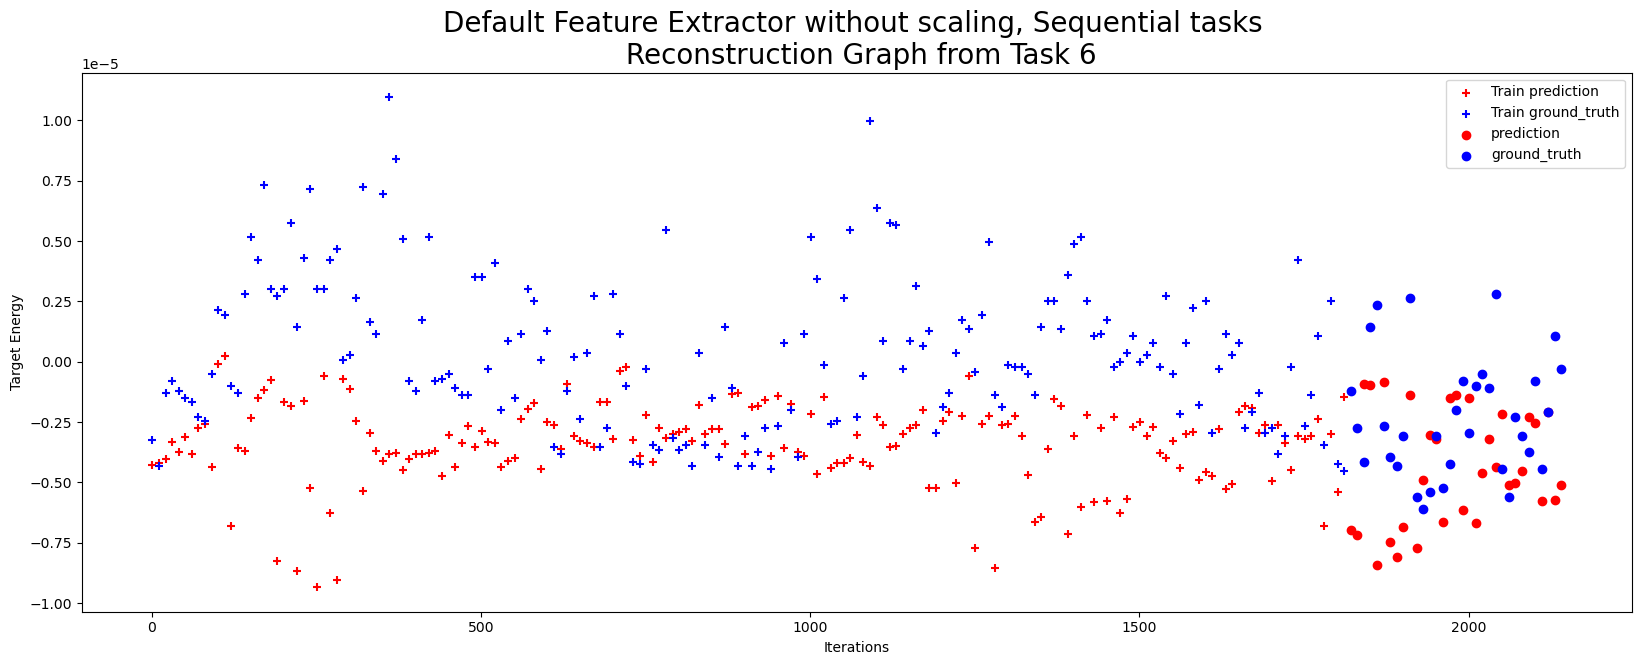

Training Task 7
(189, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

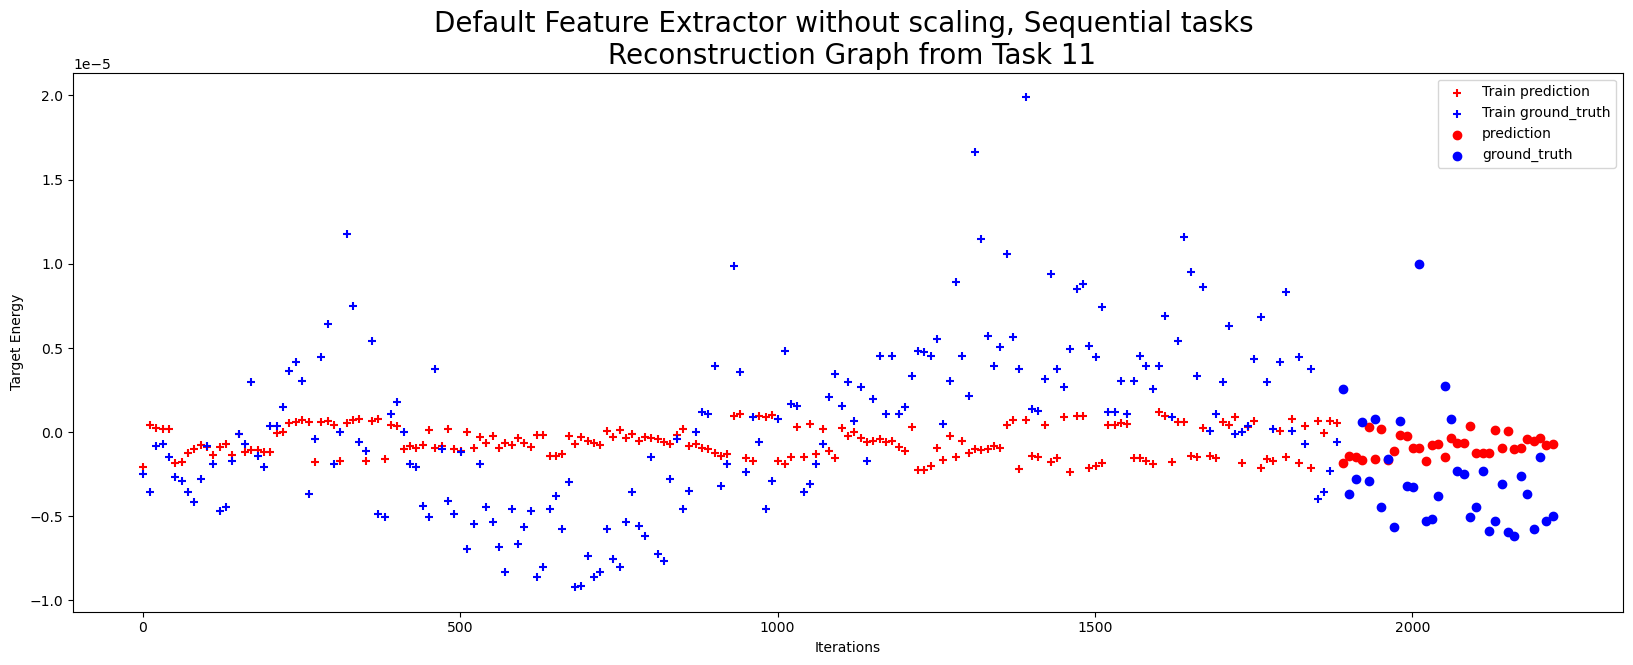

Training Task 8
(188, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

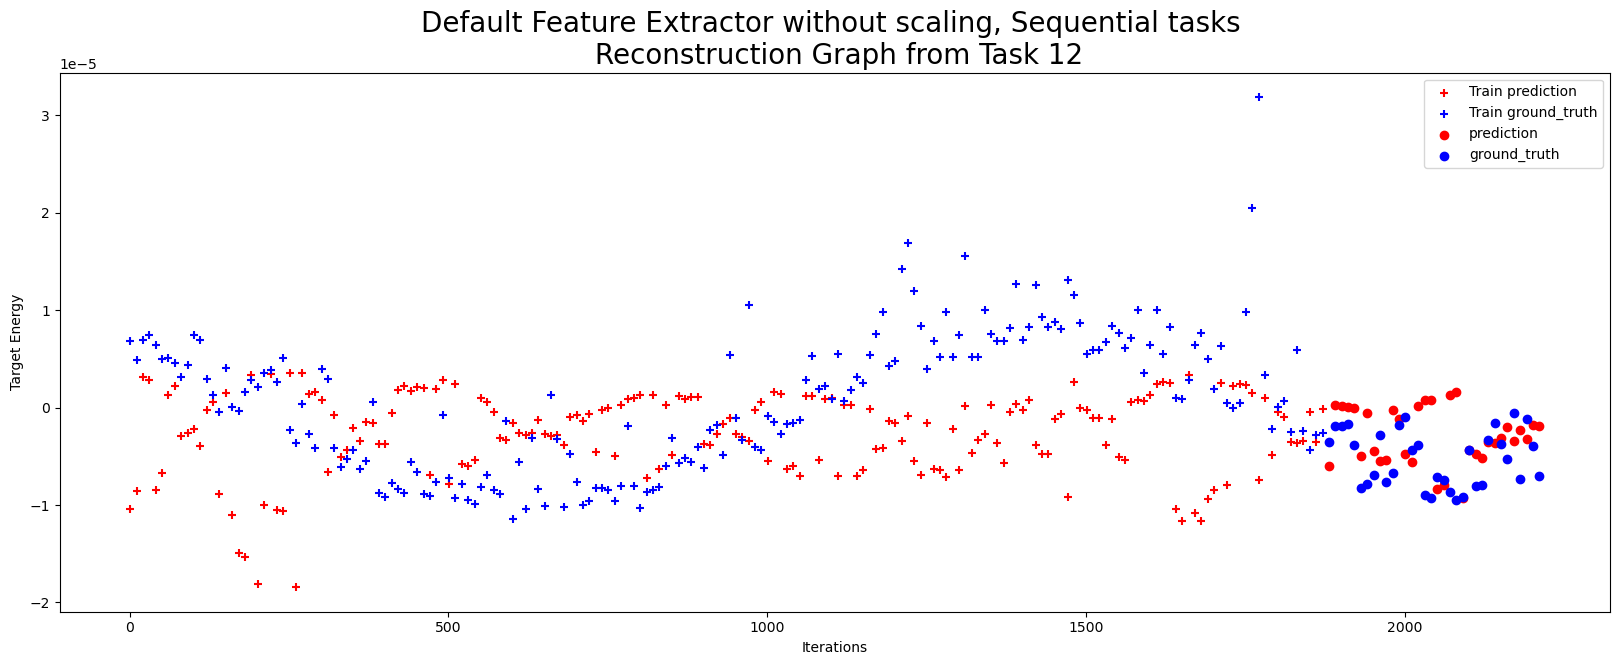

Training Task 9
(192, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

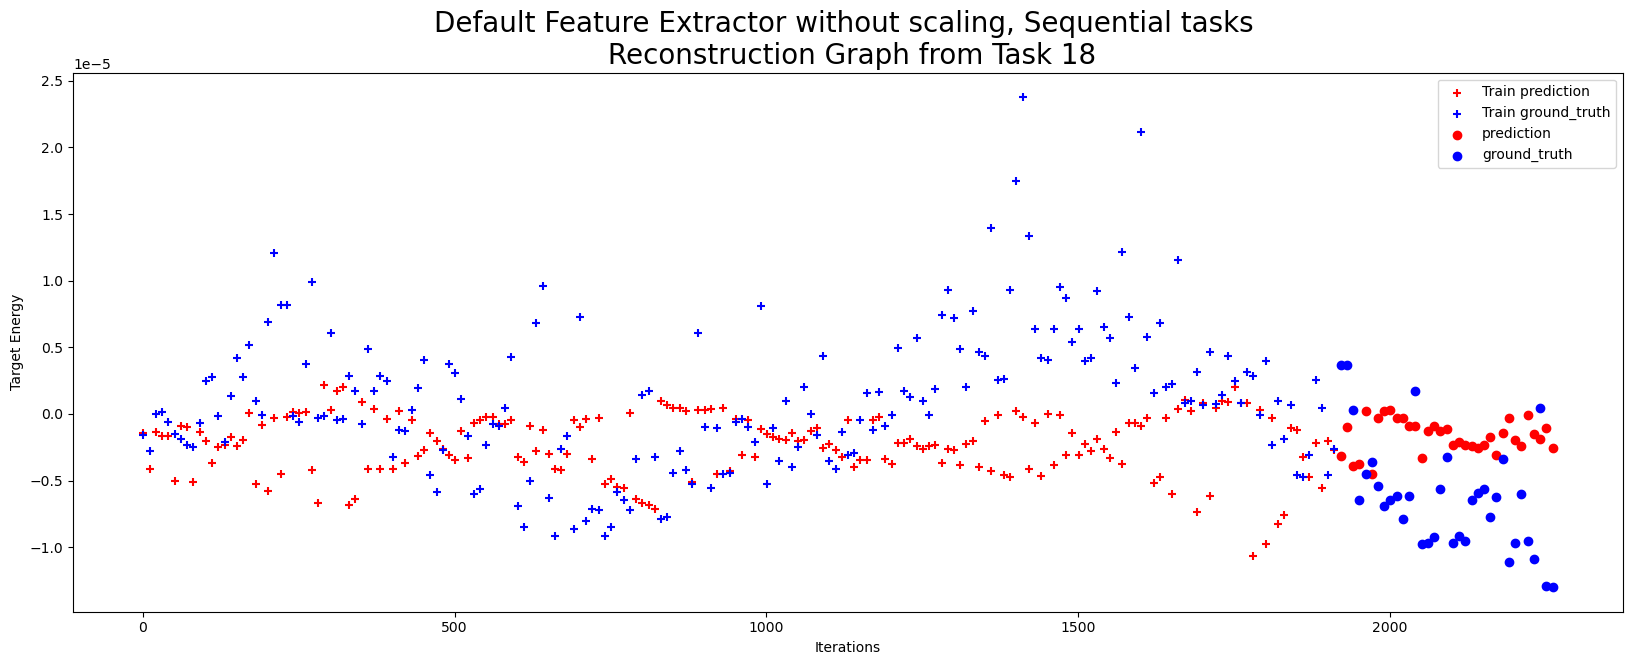

Training Task 10
(196, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

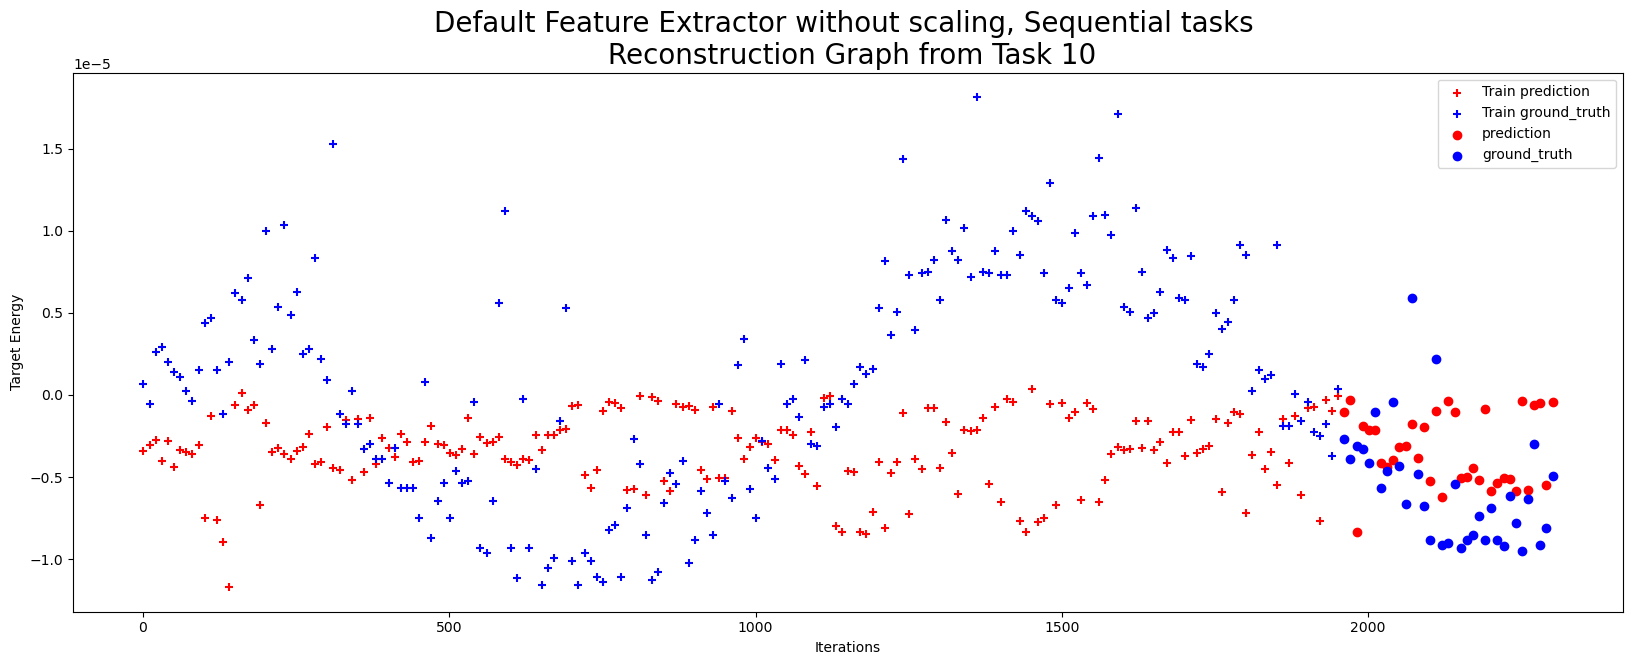

Training Task 11
(192, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

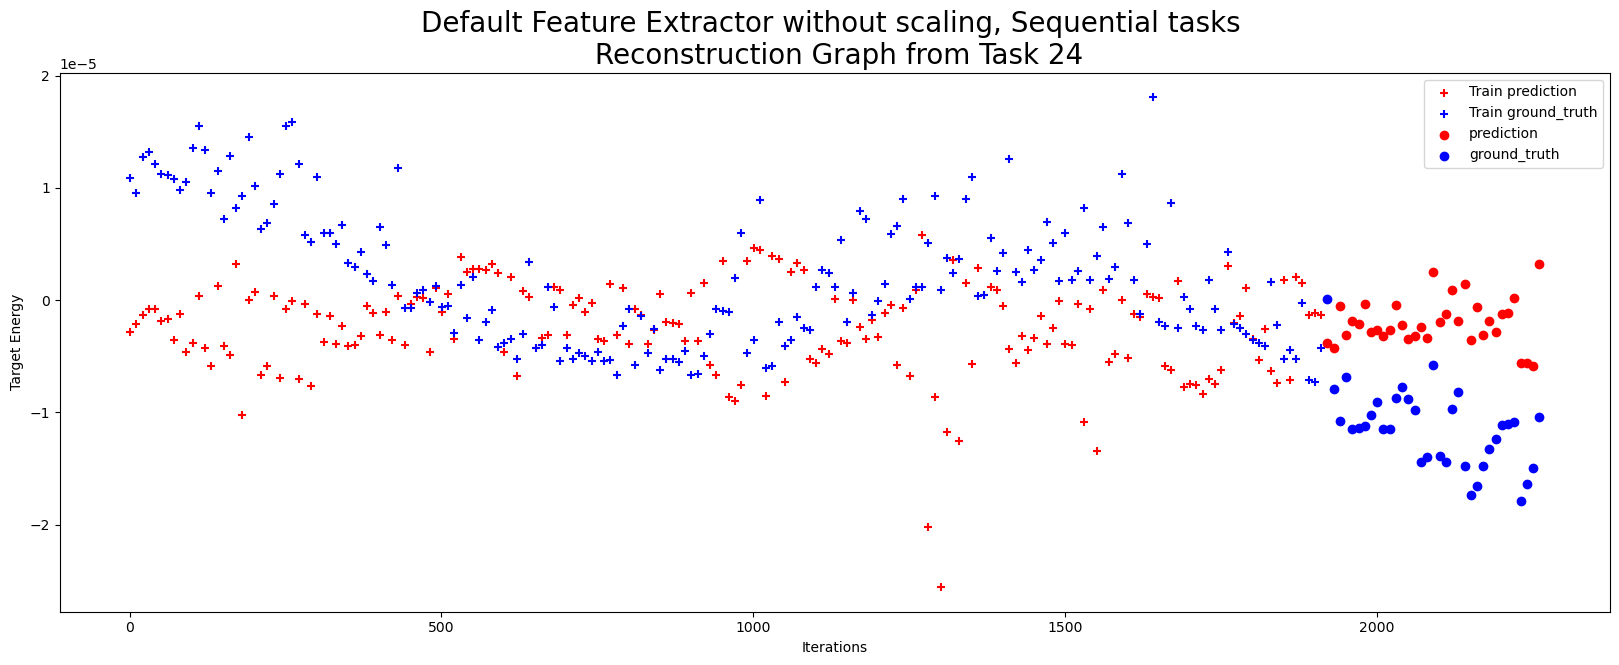

Training Task 12
(211, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

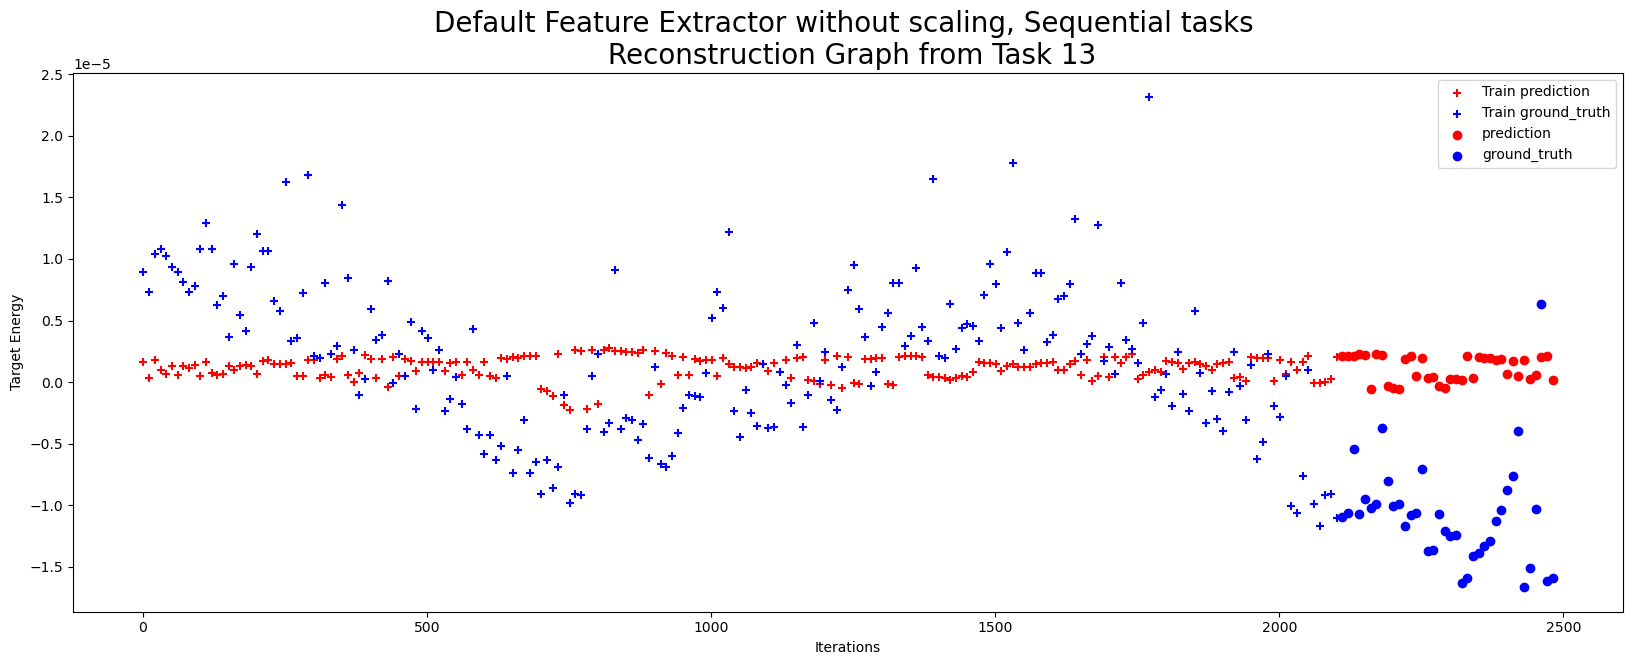

Training Task 13
(219, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

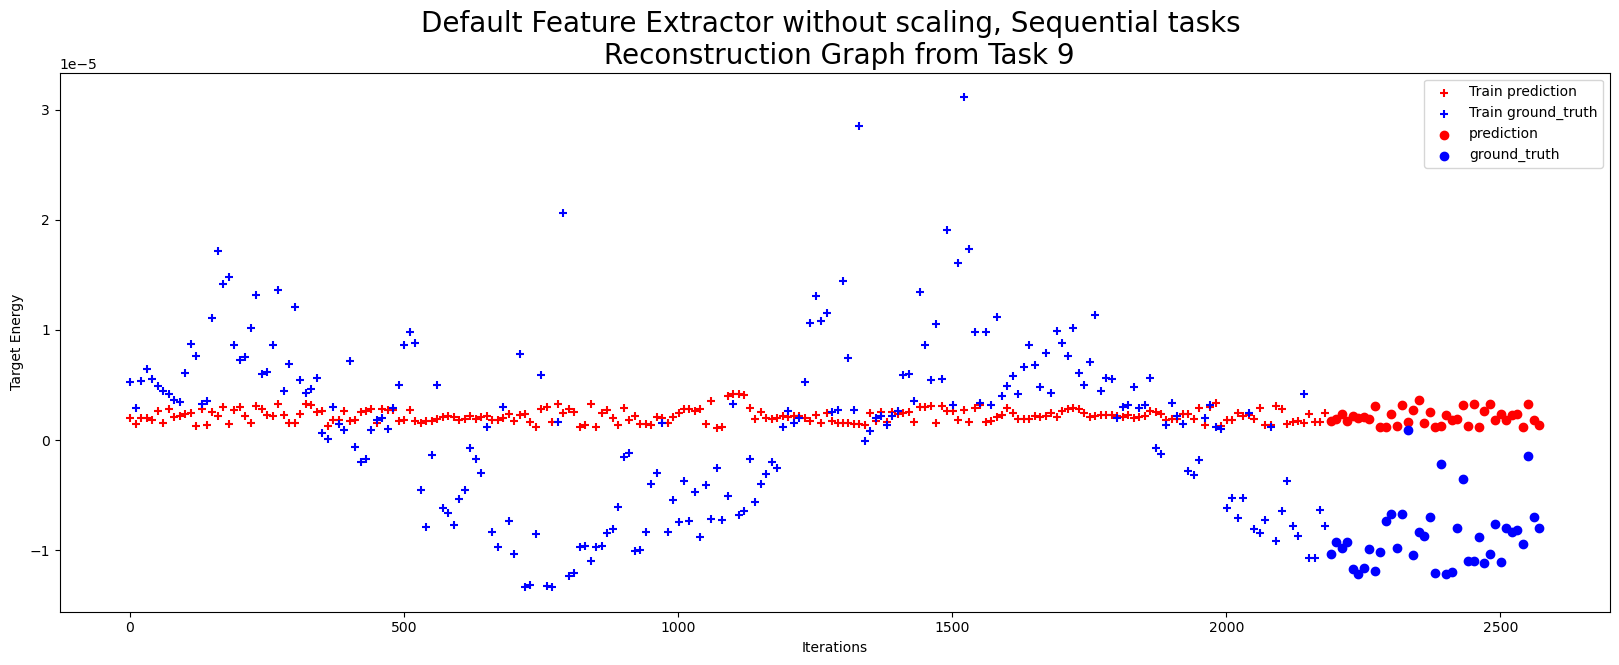

Training Task 14
(202, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

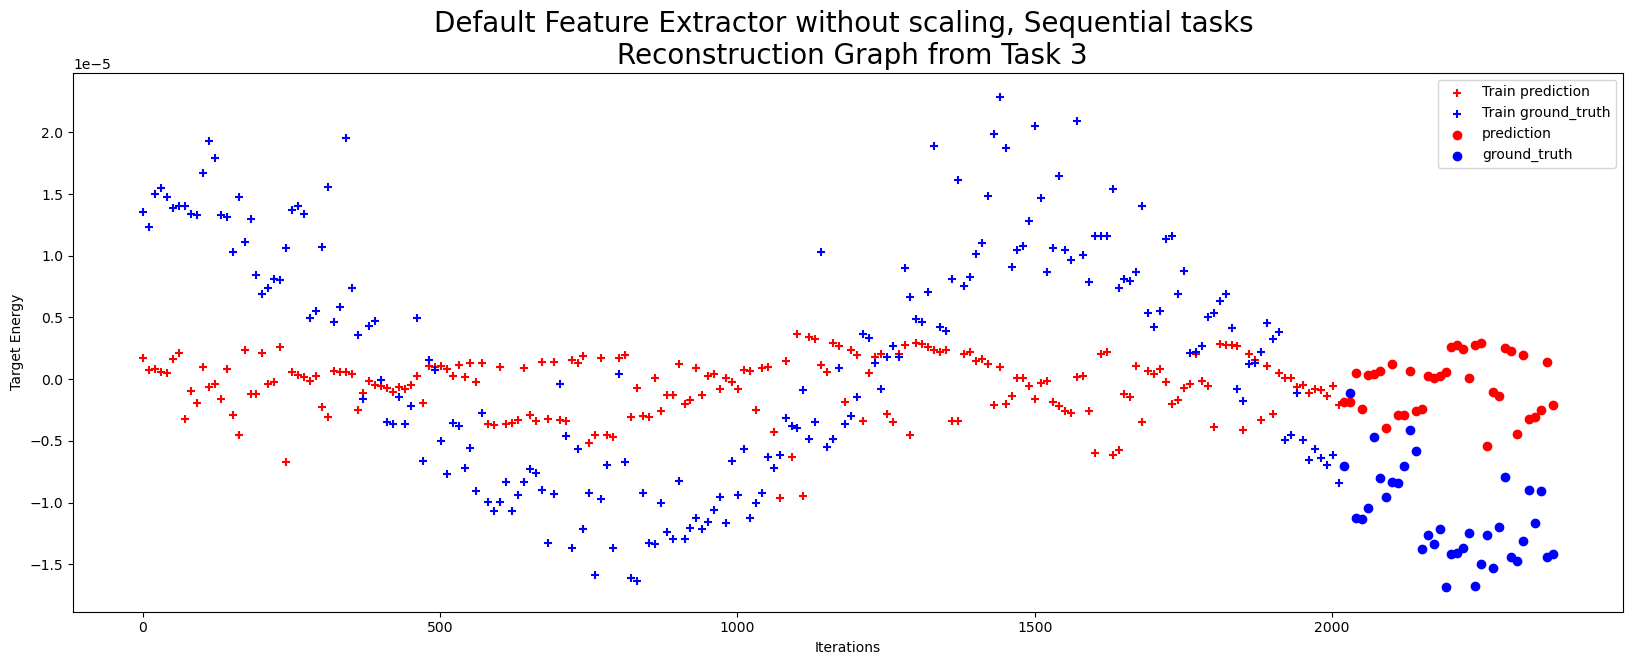

Training Task 15
(187, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

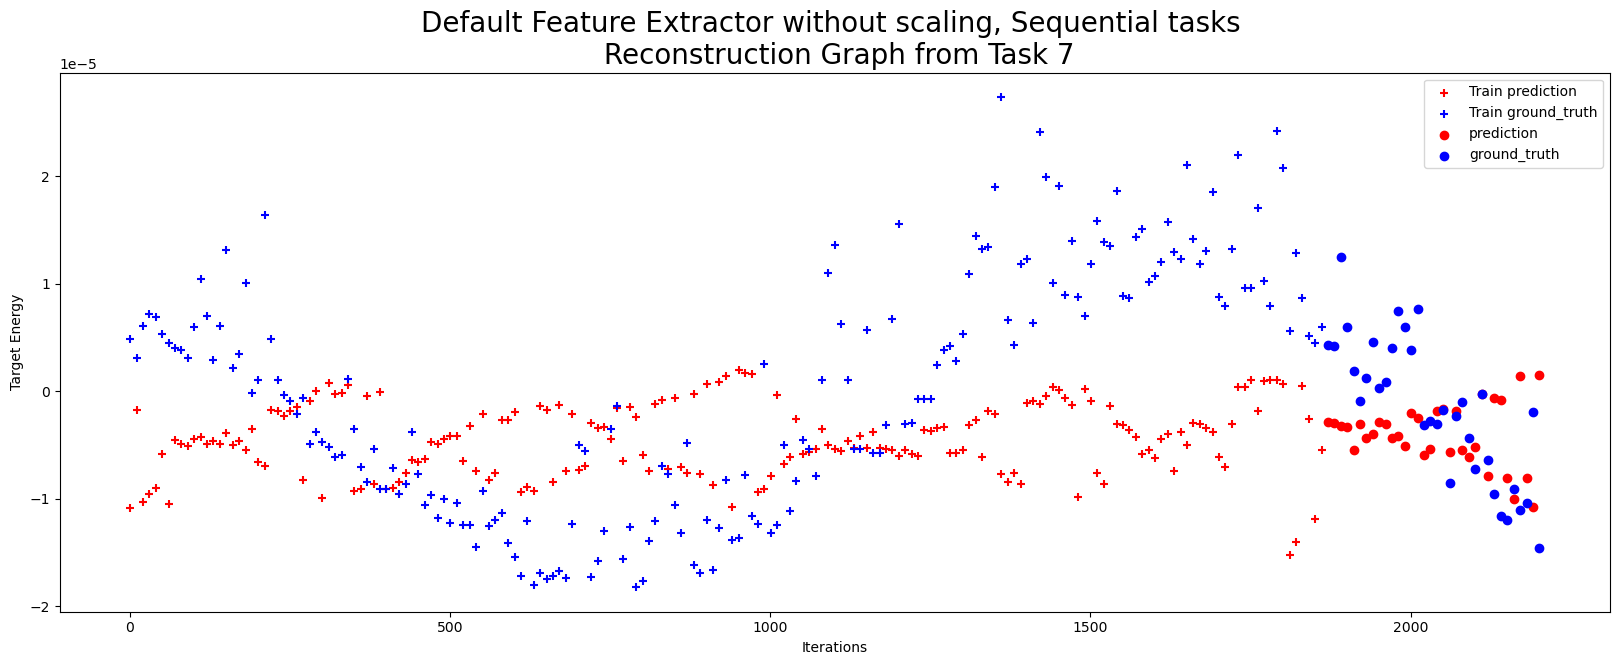

Training Task 16
(204, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

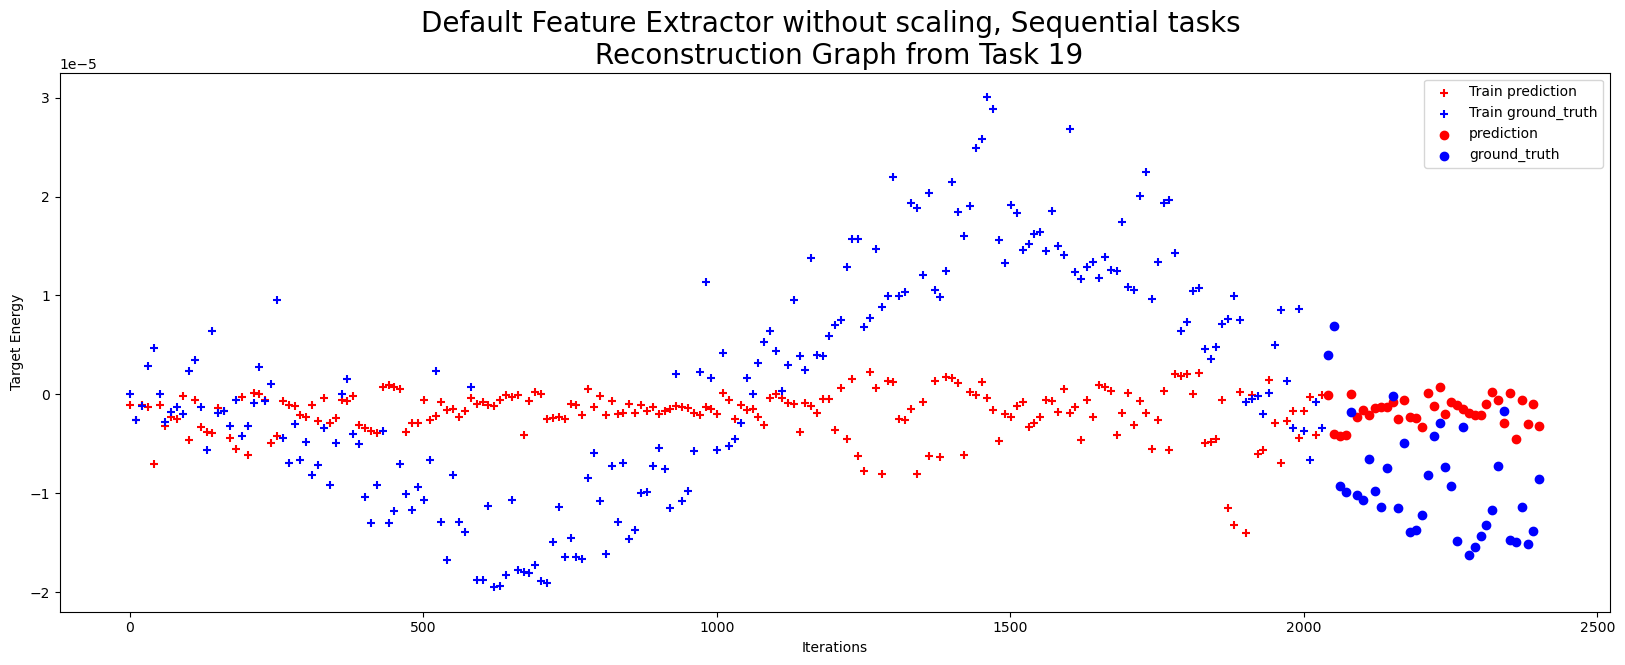

Training Task 17
(207, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

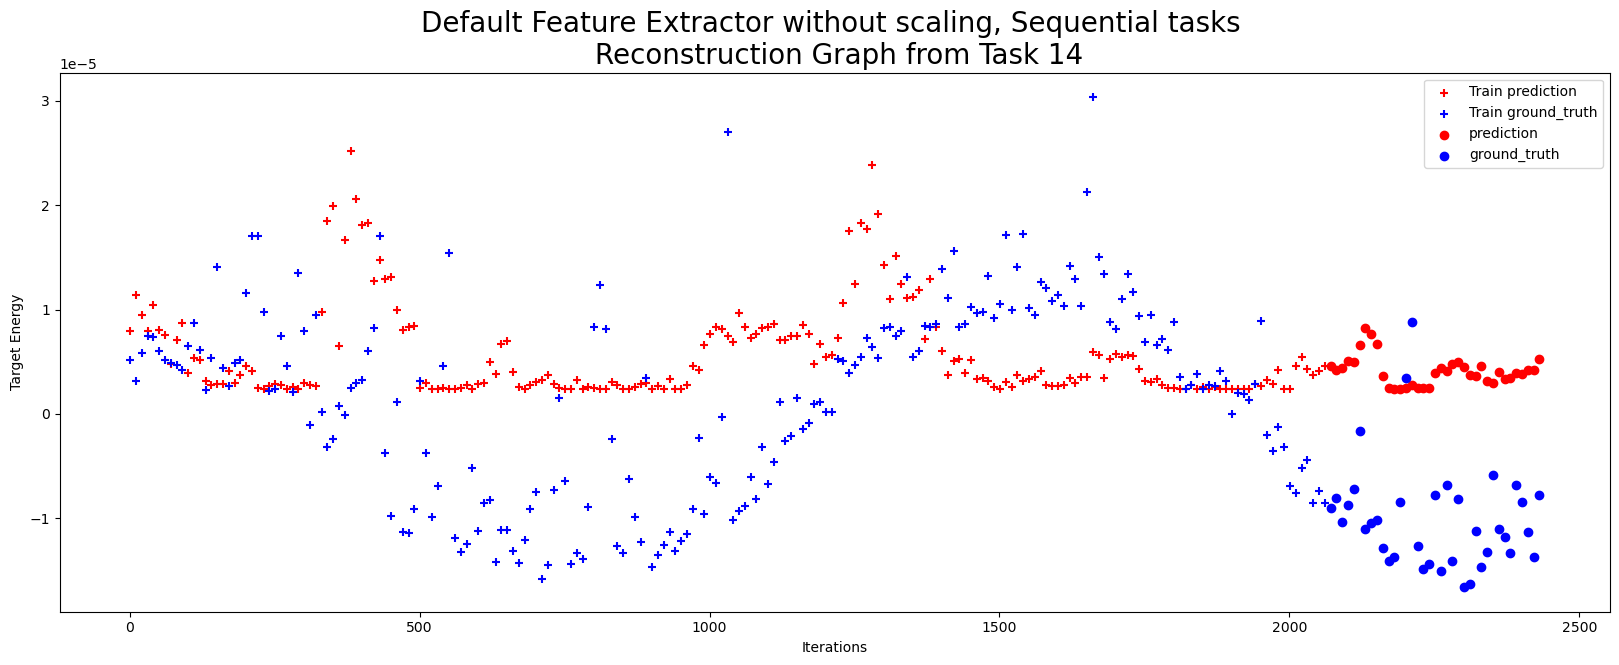

Training Task 18
(209, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

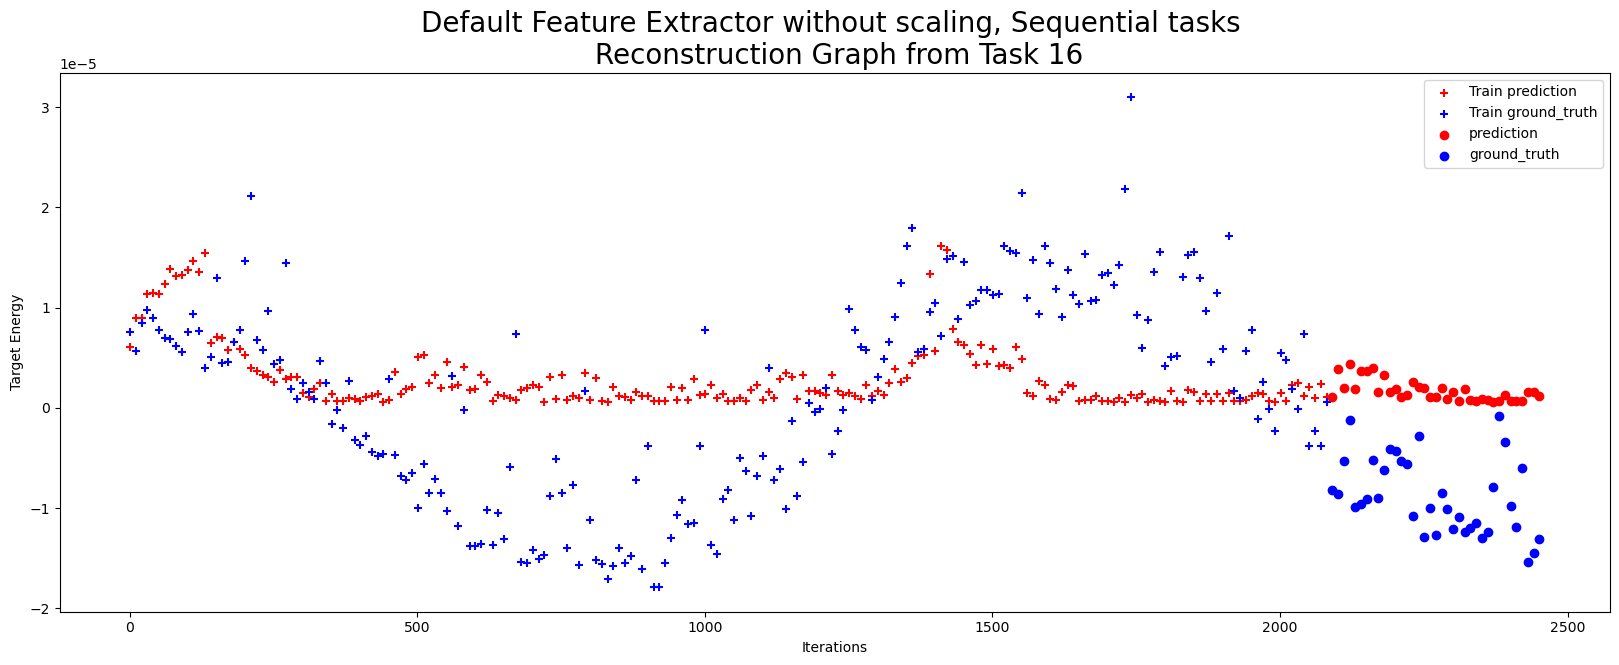

Training Task 19
(209, 1, 208, 208)
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/tmp/ipykernel_883065/3890656420.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x=points[:, 0], y=points[:, 1], s=2.0,


<Figure size 640x480 with 0 Axes>

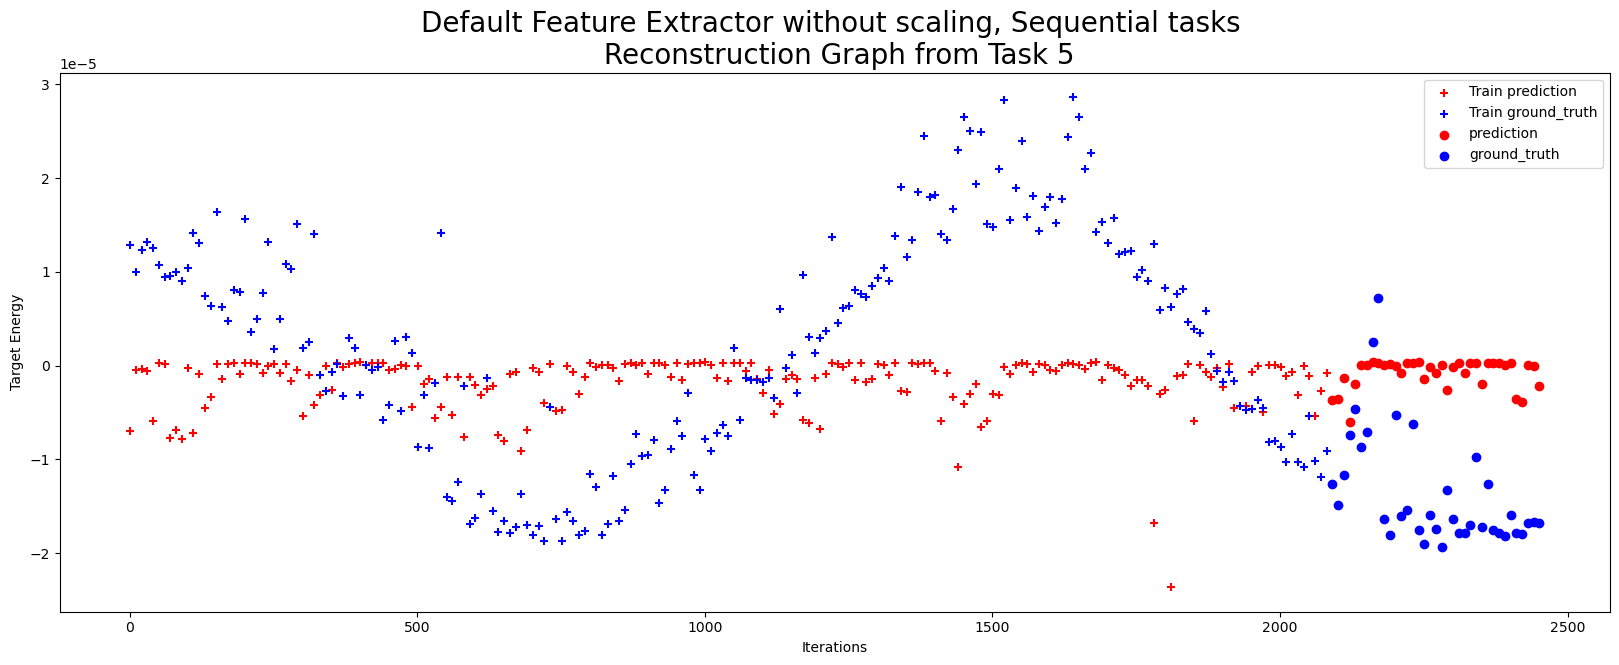

<Figure size 640x480 with 0 Axes>

In [70]:
datadim = 208*208 #43264
embedim = 2 
training_cycles = 200
n_tasks = 25
lr = 1e-2
augmentation = True
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)

'''
scaler = False


train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation(train_tasks,ind_to_val,cropped_image_list,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,augmentation=augmentation)
#np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_noScaling.npy",results)
save_gif()

CNN

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

class LeNet(nn.Module):
	def __init__(self, numChannels, classes):
		# call the parent constructor
		super(LeNet, self).__init__()
		# initialize first set of CONV => RELU => POOL layers
		self.conv1 = Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(50, 50))
		self.relu1 = ReLU()
		self.maxpool1 = MaxPool2d(kernel_size=(20, 20), stride=(2, 2))
		# initialize second set of CONV => RELU => POOL layers
		self.conv2 = Conv2d(in_channels=20, out_channels=10,
			kernel_size=(20, 20))
		self.relu2 = ReLU()
		self.maxpool2 = MaxPool2d(kernel_size=(10, 10), stride=(2, 2))
		# initialize first (and only) set of FC => RELU layers
		# self.fc = Linear(in_features=120050,out_features=4096),
		# self.relu = ReLU()
		# self.fcc = Linear(in_features=4096,out_features=800),
		# self.reluu = ReLU()
		self.fc1 = Linear(in_features=4410, out_features=2048)
		self.relu3 = ReLU()

		self.fc2 = Linear(in_features=2048, out_features=512)
		self.relu4 = ReLU()

		self.fc4 = Linear(in_features=512, out_features=256)
		self.relu5 = ReLU()
		# initialize our softmax classifier
		self.fc3 = Linear(in_features=256, out_features=128)
		self.relu6 = ReLU()
		self.fc5 = Linear(in_features=128, out_features=1)
		#self.logSoftmax = LogSoftmax(dim=1)
        #*(list(fcFeatureExtractor(256,embedim).children()))
	def forward(self, x):
		# pass the input through our first set of CONV => RELU =>
		# POOL layers
		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)
		# pass the output from the previous layer through the second
		# set of CONV => RELU => POOL layers
		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = flatten(x, 1)
		print("Shape: ",x.shape)
		# x = self.fc(x) 
		# x = self.relu(x)
		# x = self.fcc(x)
		# x = self.reluu(x)
		x = self.fc1(x)
		x = self.relu3(x)

		x = self.fc2(x)
		x = self.relu4(x)

		x = self.fc4(x)
		x = self.relu5(x)

		# x = self.fc2(x)
		# x = self.relu4(x)


		# pass the output to our softmax classifier to get our output
		# predictions
		x = self.fc3(x)
		x = self.relu6(x)
		
		output = self.fc5(x)
		# output = self.logSoftmax(x)
		# return the output predictions
		return output

embedim = 2

def decimal_formatter_mod(x, pos):
    """ Format ticks to 2 decimal places. """
    return f'{x/1e-3:.4f}'

def mod_reconstruction_graph_plot(
    iterations_train, train_mean, y_train,
    iterations_test, mean, y_test,
    ind_to_val, title, task,
    scaler_flag, feature_extractor,
    training_cycles, lr, augmentation
):
    plt.figure(figsize=(20, 10))

    plt.scatter(
        np.array(iterations_train), train_mean,
        c='darkred', marker='D', s=100, label="Train Prediction", edgecolor='k'
    )
    plt.scatter(
        np.array(iterations_train), y_train.reshape(-1, 1),
        c='darkblue', marker='^', s=100, label="Train Ground Truth", edgecolor='k'
    )
    plt.scatter(
        np.array(iterations_test), mean.reshape(1, -1),
        c='orange', marker='D', s=100, label="Prediction"
    )
    plt.scatter(
        np.array(iterations_test), y_test.reshape(1, -1),
        c='royalblue', marker='^', s=100, label="Ground Truth"
    )

    plt.xlabel("Iterations (fs)", fontsize=16, fontweight='bold')
    plt.ylabel("Target energy difference per atom (meV)", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14, loc='best', frameon=True, shadow=True, fancybox=True)
    plt.gca().set_facecolor('white')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(decimal_formatter_mod))
    plt.show()
    plt.clf()

class SimpleCNN(nn.Module):
    def __init__(self, input_dim, embedim):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * (input_dim // 8) * (input_dim // 8), 1024)
        self.fc2 = nn.Linear(1024, embedim)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def single_model_training_and_validation_mask(train_tasks, ind_to_val, image_mask, energy_to_ind, title, **kwargs):
    datadim = kwargs.get("datadim", 64)
    embedim = 2
    training_cycles = kwargs.get("training_cycles", 10)
    lr = kwargs.get("lr", 1e-2)
    scaler_flag = kwargs.get("scaler", False)
    results = {int(ind_to_val[task]): [] for task in train_tasks}
    feature_extractor = kwargs.get("reptile", "default_FE")
    augmentation = kwargs.get("augmentation", True)
    print(feature_extractor)
    
    
    for task in train_tasks:
        input_image = image_mask[task]
        print(f"Training Task {ind_to_val[task]}")
        (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
            input_image, energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.15, shuffle=False, random_state=2)
        
        print(X_train.shape)
        
        X_train = np.squeeze(X_train)
        X_test = np.squeeze(X_test)

        s1, s2, s3 = X_train.shape
        X_train = X_train.reshape(-1, s2, s3)
        X_test = X_test.reshape(-1, s2, s3)

       
        num_channels = X_train.shape[-1]
        
        model_sample = SimpleCNN(num_channels, 1)
        model_mod = kwargs.get("model_mod", model_sample)

        y_train = np.array(y_train).reshape(1, -1)
        y_test = np.array(y_test).reshape(1, -1)

        if scaler_flag:
            X_train = scaler_fun.fit_transform(X_train)
            X_test = scaler_fun.fit_transform(X_test)
        
        X_train = X_train[:, np.newaxis, :, :]
        X_test = X_test[:, np.newaxis, :, :]
        
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        
        optimizer = optim.Adam(model_mod.parameters(), lr=lr)
        criterion = nn.MSELoss()

        
        for epoch in range(training_cycles):
            model_mod.train()
            optimizer.zero_grad()
            outputs = model_mod(X_train_tensor)
            
            loss = criterion(outputs, y_train_tensor)
            print(f"Epoch [{epoch+1}/{training_cycles}], Loss: {loss.item():.4f}")
            loss.backward()
            optimizer.step()
        
        model_mod.eval()
        with torch.no_grad():
            train_mean = model_mod(X_train_tensor).numpy()
            mean = model_mod(X_test_tensor).numpy()
        
        clear_gpu_cache()
        print("Pred: ", mean.shape, y_test.shape)
        # Reconstruction Graph
        reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr)
        # mod_reconstruction_graph_plot(iterations_train, train_mean, y_train, iterations_test, mean, y_test, ind_to_val, title, task, scaler_flag, feature_extractor, training_cycles, lr, augmentation)
        # color_gradient_difference_plot_modified(y_test.reshape(-1,1), mean, train_mean, y_train.reshape(-1,1), task, feature_extractor, scaler_flag,augmentation)
        #Training Loss plotting
        # mod_plot_training_loss(training_loss,ind_to_val[task],scaler_flag,feature_extractor,training_cycles,lr,augmentation)
        results[int(ind_to_val[task])] = [iterations_train, iterations_test, train_mean, mean, y_train, y_test, feature_extractor, scaler_flag, ind_to_val, title, training_cycles, lr]
    return results


default_FE
Training Task 1
(166, 1, 208, 208)


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: Using a target size (torch.Size([1, 166])) that is different to the input size (torch.Size([166, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return func(*args, **kwargs)


Epoch [1/50], Loss: 8.8143
Epoch [2/50], Loss: 244095385600.0000
Epoch [3/50], Loss: 468436000.0000
Epoch [4/50], Loss: 7905245.5000
Epoch [5/50], Loss: 803480.4375
Epoch [6/50], Loss: 808.1899
Epoch [7/50], Loss: 130.9142
Epoch [8/50], Loss: 46.3450
Epoch [9/50], Loss: 9.5455
Epoch [10/50], Loss: 0.0280
Epoch [11/50], Loss: 4.2355
Epoch [12/50], Loss: 10.7168
Epoch [13/50], Loss: 12.8913
Epoch [14/50], Loss: 11.8668
Epoch [15/50], Loss: 9.7982
Epoch [16/50], Loss: 7.5455
Epoch [17/50], Loss: 5.7353
Epoch [18/50], Loss: 4.1678
Epoch [19/50], Loss: 3.0752
Epoch [20/50], Loss: 2.2530
Epoch [21/50], Loss: 1.5867
Epoch [22/50], Loss: 0.9524
Epoch [23/50], Loss: 0.4164
Epoch [24/50], Loss: 0.3447
Epoch [25/50], Loss: 0.2854
Epoch [26/50], Loss: 0.2138
Epoch [27/50], Loss: 0.1347
Epoch [28/50], Loss: 0.0722
Epoch [29/50], Loss: 0.0307
Epoch [30/50], Loss: 0.0081
Epoch [31/50], Loss: 0.0002
Epoch [32/50], Loss: 0.0000
Epoch [33/50], Loss: 0.0000
Epoch [34/50], Loss: 0.0000
Epoch [35/50], Loss

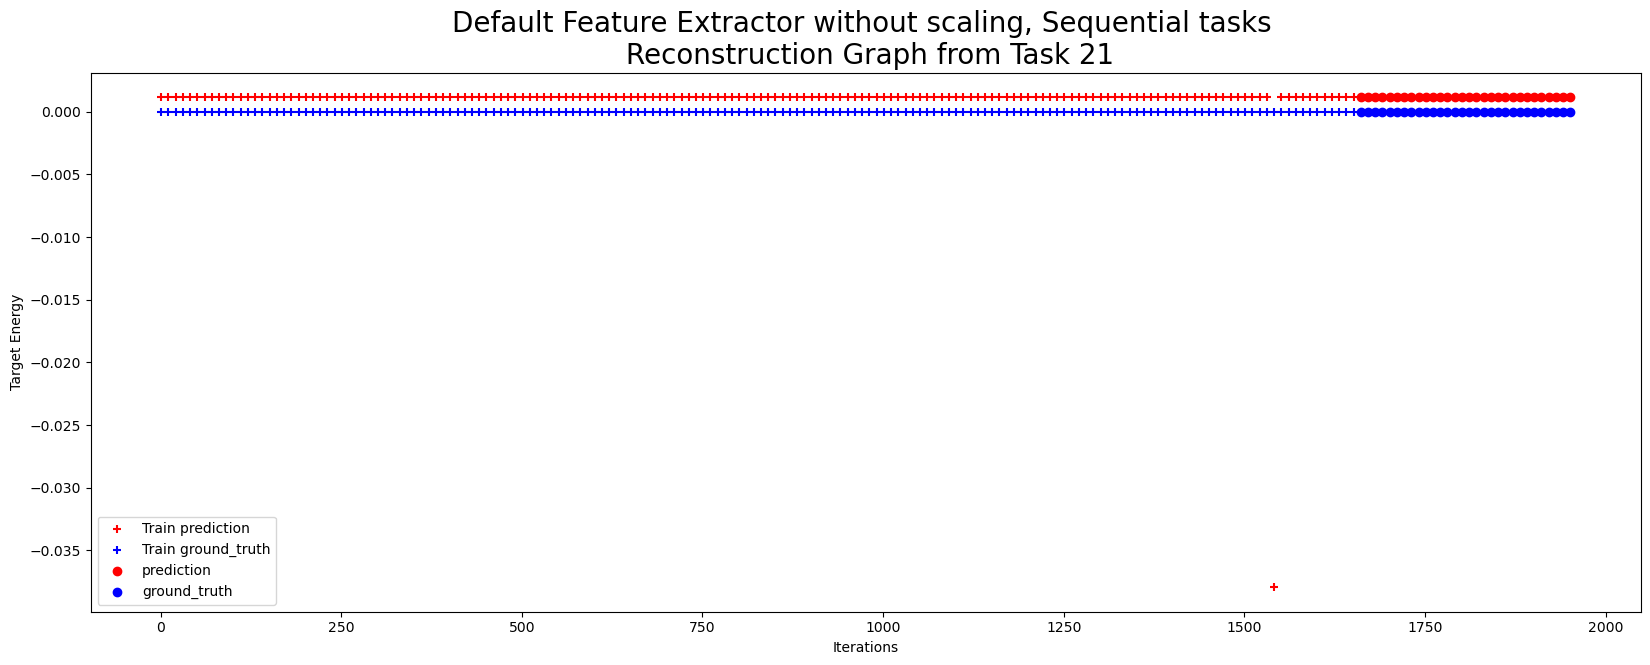

Training Task 2
(171, 1, 208, 208)


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: Using a target size (torch.Size([1, 171])) that is different to the input size (torch.Size([171, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return func(*args, **kwargs)


Epoch [1/50], Loss: 224.6934
Epoch [2/50], Loss: 330951983104.0000
Epoch [3/50], Loss: 2521531.5000
Epoch [4/50], Loss: 7070686.0000
Epoch [5/50], Loss: 597460.3750
Epoch [6/50], Loss: 26279.8340
Epoch [7/50], Loss: 44.3865
Epoch [8/50], Loss: 7.8140
Epoch [9/50], Loss: 24.1862
Epoch [10/50], Loss: 7.9998
Epoch [11/50], Loss: 6.4704
Epoch [12/50], Loss: 48.8086
Epoch [13/50], Loss: 67.7136
Epoch [14/50], Loss: 54.8479
Epoch [15/50], Loss: 24.8410
Epoch [16/50], Loss: 5.4568
Epoch [17/50], Loss: 0.1771
Epoch [18/50], Loss: 3.8545
Epoch [19/50], Loss: 10.3892
Epoch [20/50], Loss: 10.7550
Epoch [21/50], Loss: 4.7074
Epoch [22/50], Loss: 0.0903
Epoch [23/50], Loss: 4.1264
Epoch [24/50], Loss: 8.4109
Epoch [25/50], Loss: 4.7705
Epoch [26/50], Loss: 0.5120
Epoch [27/50], Loss: 1.0639
Epoch [28/50], Loss: 4.1677
Epoch [29/50], Loss: 5.3470
Epoch [30/50], Loss: 3.5839
Epoch [31/50], Loss: 0.9659
Epoch [32/50], Loss: 0.0512
Epoch [33/50], Loss: 1.3361
Epoch [34/50], Loss: 2.8238
Epoch [35/50], 

<Figure size 640x480 with 0 Axes>

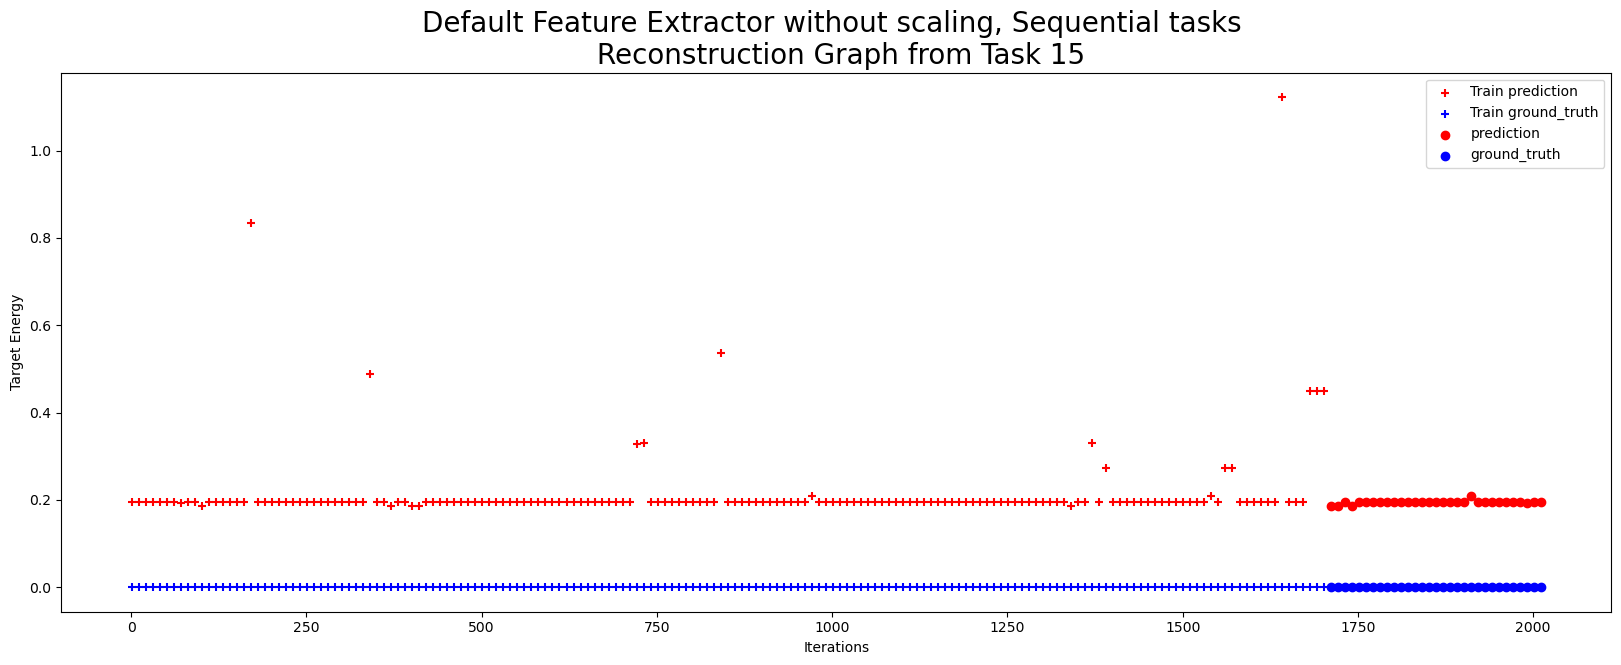

Training Task 3
(173, 1, 208, 208)


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: Using a target size (torch.Size([1, 173])) that is different to the input size (torch.Size([173, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return func(*args, **kwargs)


Epoch [1/50], Loss: 32.3372
Epoch [2/50], Loss: 776961982464.0000
Epoch [3/50], Loss: 14987593.0000
Epoch [4/50], Loss: 3820861.2500
Epoch [5/50], Loss: 252148.0469
Epoch [6/50], Loss: 33903.5156
Epoch [7/50], Loss: 369218.5000


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [23]:
clear_gpu_cache()

datadim = 43264
embedim = 2 
training_cycles = 50
n_tasks = 25
lr = 1e-2
torch.set_default_device("cpu")
augmentation = True
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)

scaler = False
'''

train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation_mask(train_tasks,ind_to_val,cropped_image_list,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,augmentation=augmentation)
# np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_noScaling.npy",results)

In [22]:
clear_gpu_cache()